### Loan Status Prediction Using Machine Learning Algorithm

<u>**Introduction**</u>

1. This is a Machine Learning project for my Master's degree in Data Science and Business Analytics at Asia Pacific University of Technology and Innovation (APU).

2. This project marks my first foray into Machine Learning, and I am still in the midst of exploring and learning.

3. The objective of this Machine Learning project is to predict the loan approval status for an applicant, based on data obtained from Kaggle ([Loan Status Prediction Dataset](https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction)).

4. Supervised learning techniques are employed since loan status prediction is a binary classification task, where the prediction is either loan approval or rejection.

5. Three machine learning algorithms have been selected for this project, namely Naive Bayes, Logistic Regression, and Random Forest. The performance of each algorithm will be studied and compared.

6. The Machine Learning workflow/pipeline for this project is as follows:
   - **Section 1: Data Preparation**
   - **Section 2: Model Implementation**
   - **Section 3: Model Performance Comparison**


### Section 1: Data Preparation

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import math

# Set color theme
sns.set_theme(style="darkgrid")
sns.set_palette("deep")
color_tone = "#4c72b0"

In [85]:
# Read csv
filepath = r"loan_data.csv"

df = pd.read_csv(filepath)

#### Initial Exploratory Data Analysis (EDA)

In [86]:
# Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


From the output above, it is shown that:
1. There are a total of 13 features: 8 of them are categorical variables, and 5 of them are numerical variables.
2. Missing values are present as some features have less than 381 non-null counts; data cleaning is required.
3. Further exploration is needed to validate the data types for each feature.

In [87]:
# Overview of the dataset
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,381,376,381,373,381,360,381.000000,381.000000,381.000000,370.000000,351.000000,381,381
unique,381,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001003,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,291,228,234,278,325,NaN,NaN,NaN,NaN,NaN,149,271
mean,NaN,NaN,NaN,NaN,NaN,NaN,3579.845144,1277.275381,104.986877,340.864865,0.837607,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1419.813818,2340.818114,28.358464,68.549257,0.369338,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2600.000000,0.000000,90.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3333.000000,983.000000,110.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4288.000000,2016.000000,127.000000,360.000000,1.000000,NaN,NaN


From the output above, it is shown that:
1. Missing values are found as some of the features are having less than 381 instances, data cleaning is required.
2. The distribution of `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, and `Loan_Amount_Term` exhibits high variability, as indicated by the standard deviation, which comprises a significant fraction of the mean. Therefore, further data exploration is necessary to identify potential outliers in these features.

**Unique Value Analysis**

In [88]:
# Check the unique values for each column
dict_unique = {}

for col in df.columns:
  dict_unique[col] = [df[col].unique().tolist()]

unique_val_df = pd.DataFrame(dict_unique, index=["Unique_Value"]).transpose()
unique_val_df['No of Unique Value'] = unique_val_df['Unique_Value'].apply(len)
unique_val_df['Data Types'] = df.dtypes
unique_val_df = unique_val_df[['Data Types', 'No of Unique Value', 'Unique_Value']]
unique_val_df

,Data Types,No of Unique Value,Unique_Value
Loan_ID,object,381,"[LP001003, LP001005, LP001006, LP001008, LP001..."
Gender,object,3,"[Male, Female, nan]"
Married,object,2,"[Yes, No]"
Dependents,object,5,"[1, 0, 2, 3+, nan]"
Education,object,2,"[Graduate, Not Graduate]"
Self_Employed,object,3,"[No, Yes, nan]"
ApplicantIncome,int64,322,"[4583, 3000, 2583, 6000, 2333, 3200, 2500, 185..."
CoapplicantIncome,float64,182,"[1508.0, 0.0, 2358.0, 1516.0, 700.0, 1840.0, 2..."
LoanAmount,float64,101,"[128.0, 66.0, 120.0, 141.0, 95.0, 70.0, 109.0,..."
Loan_Amount_Term,float64,11,"[360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0,..."


From the output above, it is shown that:
1. There are missing values found in `Gender`, `Dependents`, `Self_Employed`, and `Credit_History`. Handling of missing values is required.
2. `Loan_Amount_Term` and `Credit_History` each have only a few unique values, indicating that these two features are categorical variables. Therefore, both features should be updated to the correct data type.
3. However, a high number of unique values have been observed for `Loan_Amount_Term`. Therefore, further exploration will be conducted to determine whether binning is necessary for this feature.
4. Since all the categorical variables in the dataset are string data types, label encoding or one-hot encoding will be used. Hence, data types for these features can be remained unchanged.

In [89]:
# Create a function that plot histogram by taking a list of column
def plot_hist(df, col_list, figsize=(12, 10), no_col=3):
  num_cols = len(col_list)

  fig, ax  = plt.subplots(nrows=int(round(num_cols/3, 0)), ncols=no_col, figsize=figsize, sharex=False, sharey=False)
  fig.suptitle("Histogram for Numerical Variables", fontsize=16)

  n  = int(round(num_cols/3, 0)) * 3 - 1

  for i, ax in enumerate(ax.flat):
    # Hide axis and exit for loop
    if (i == n) and (n%3 == 0):
      ax.set_visible(False)
      break

    if i < num_cols:
      sns.histplot(data=df, x=col_list[i], ax=ax, kde=True)
      ax.set_title(col_list[i], fontsize=12)

  plt.tight_layout()
  plt.show()

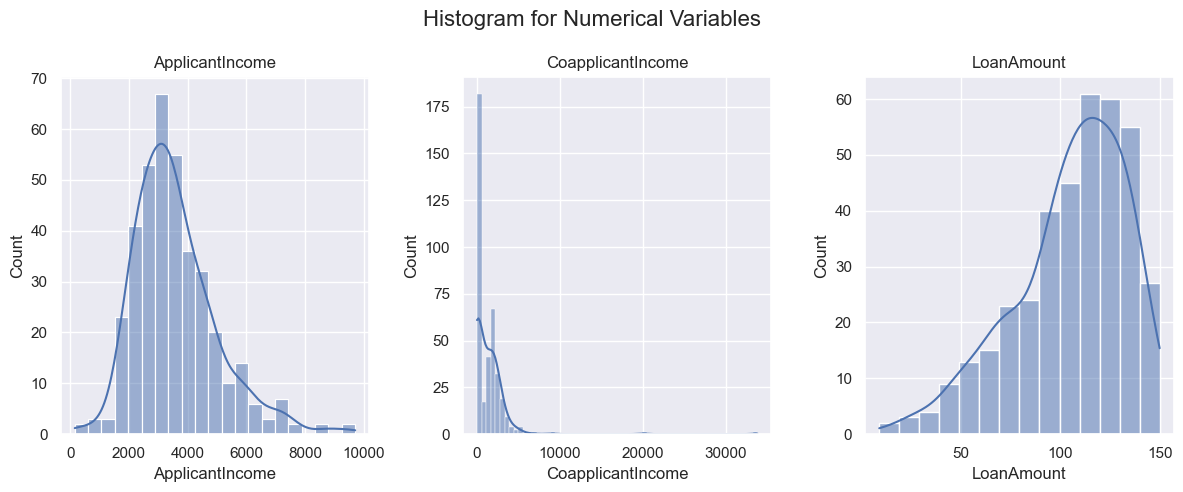

In [90]:
# Check the distribution of the numerical variables
plot_hist(df, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], (12, 5))

From the output above, it is shown that:
1. `ApplicantIncome` is positively skewed and `LoanAmount` is negatively skewed, indicating that there could be outliers in both features.
2. There is an extremely high frequency of 0 incomes found in `CoapplicantIncome`, which is a reasonable value since not every loan has a coapplicant. Therefore, instead of treating `CoapplicantIncome` as numerical variable, converting it into a categorical variable through binning would be more appropriate. This approach would introduce better robustness to the model in the later stage.

#### Duplicate Data Detection & Treatment

In [91]:
# Create a dataframe without Loan ID
df_dup = df.drop(['Loan_ID'], axis=1)

# Check for duplicates
if df.duplicated().sum() > 0:
  print("Duplicates are found in the dataset.")
else:
  print("There are no duplicates found in the dataset.")

There are no duplicates found in the dataset.


#### Missing Value Detection & Treatment
---
As the dataset consists of a modest number of instances (381 instances), handling missing values is crucial to avoid the loss of valuable information. Various methods for imputing missing values should be considered based on a comprehensive analysis of the missing data patterns and characteristics of the dataset.

In [92]:
def mv_tabulation(df):
  """
  This function will tabulate the missing values and missing values percentages for each columns in the input dataset.
  df = Dataset that need to be tabulated
  """

  # Get the total number of missing values
  mv = df.isnull().sum()

  # Percentage of missing values
  mv_percent =  (df.isnull().sum() / len(df)) * 100

  # Create table
  mv_df = pd.concat([mv, mv_percent], axis=1)

  # Rename the column
  mv_df.columns = ["Missing Counts", "Missing Percentage"]

  # Sort the table by percentage of missing value (Descending)
  mv_df = mv_df.sort_values("Missing Percentage", ascending=False).round(1)

  # # Print the number of variables with missing values
  feat_miss_lst = mv_df[mv_df['Missing Counts'] > 0].index.tolist()
  print(f"There are a total of {len(feat_miss_lst)} features with missing values")
  print(f"Features with missing values are: {feat_miss_lst}")

  display(mv_df)

In [93]:
# Check the missing values in the dataset
mv_tabulation(df)

There are a total of 5 features with missing values
Features with missing values are: ['Credit_History', 'Self_Employed', 'Loan_Amount_Term', 'Dependents', 'Gender']


,Missing Counts,Missing Percentage
Credit_History,30,7.9
Self_Employed,21,5.5
Loan_Amount_Term,11,2.9
Dependents,8,2.1
Gender,5,1.3
Loan_ID,0,0.0
Married,0,0.0
Education,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0


From the output above, it is shown that:
1. There are 5 features with missing values, and all of them are categorical variable.  
[Categorical: `Credit_History`, `Self_Employed`, `Loan_Amount_Term`, `Dependents`, `Gender`]
2. Given the low percentage of missing values, imputation has been chosen as the method for handling missing values.

In [94]:
# List of features with missing values by data types
lst_miss_cat = ['Credit_History', 'Self_Employed', 'Loan_Amount_Term', 'Dependents', 'Gender']

##### Missing Value Imputation (Categorical Variable)
---
In this section, mode imputation with sklearn is used to handle the missing values found in the categorical data.

In [95]:
# Mode Imputation
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df[lst_miss_cat] = mode_imputer.fit_transform(df[lst_miss_cat])

##### Missing Value Validation

In [96]:
# Check whether there are still any missing value found
mv_tabulation(df)

There are a total of 0 features with missing values
Features with missing values are: []


,Missing Counts,Missing Percentage
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0


#### Binning

##### `CoapplicantIncome`

Let's further inspect the distribution of `CoapplicantIncome` in detail

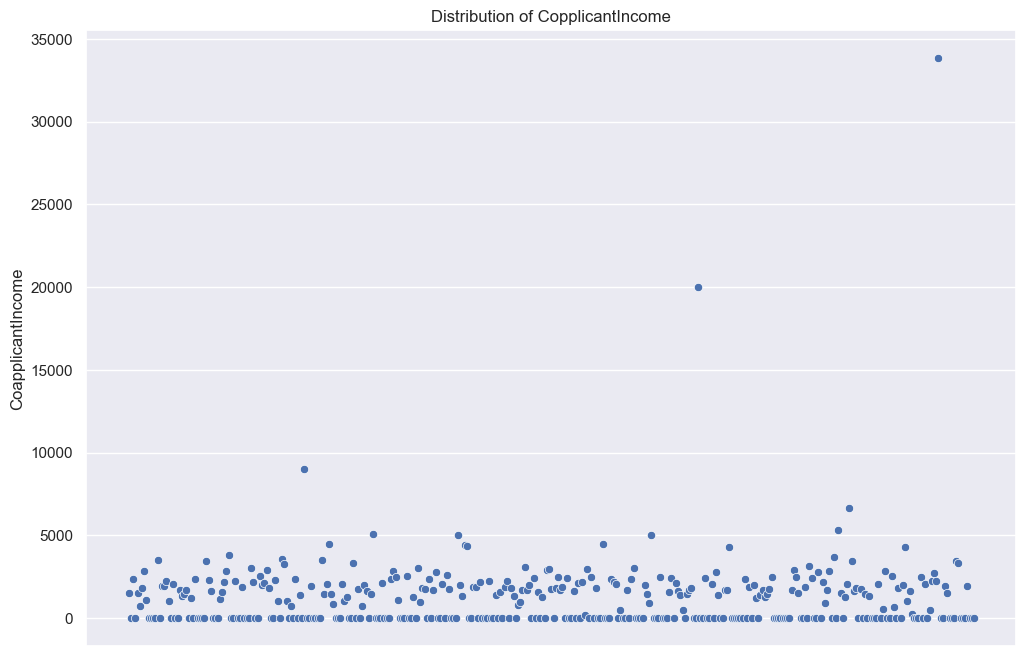

In [97]:
# Review on the histogram for `CoapplicantIncome`
fig = plt.figure(1, figsize=(12,8))
sns.scatterplot(df['CoapplicantIncome'])
plt.title("Distribution of CopplicantIncome")
plt.xticks([])
plt.show()

From the output above, it is shown that:
1. There are a high frequency of 0 values found in `CoapplicantIncome`.
2. Some instances show incomes exceeding 5000.
3. Detailed exploration of the income distribution between 0 and 5000 is necessary to determine the binning range accurately.

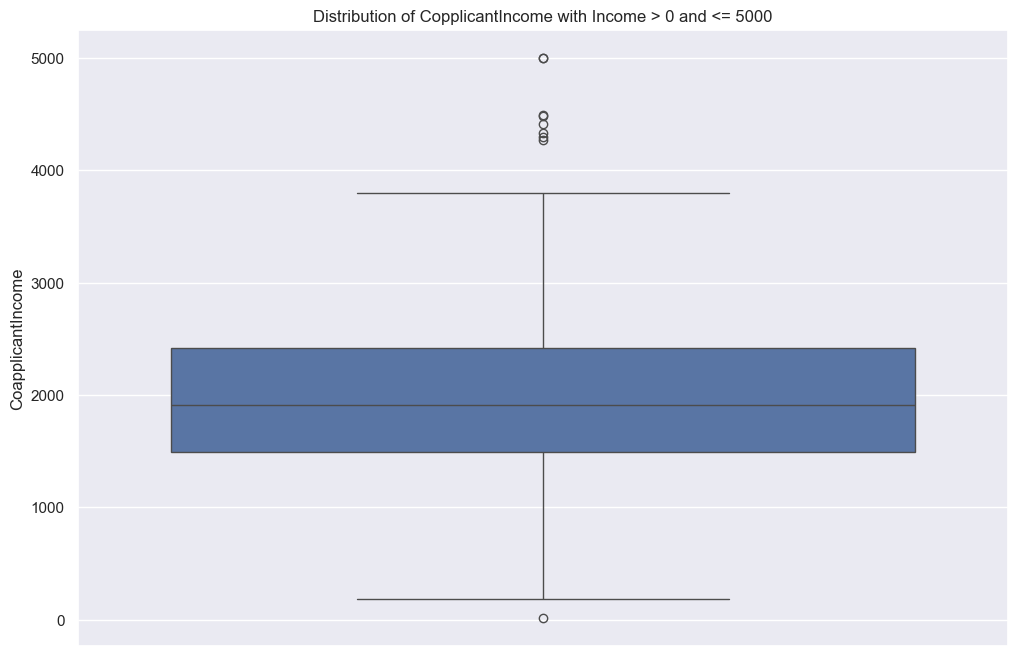

In [98]:
# Get only income less than 5000 and exclude 0
income_5000 = df[(df['CoapplicantIncome'] > 0) & (df['CoapplicantIncome'] <= 5000)]['CoapplicantIncome']

# Visualize the income distribution < 5000x
fig = plt.figure(1, figsize=(12,8))
sns.boxplot(income_5000)
plt.title("Distribution of CopplicantIncome with Income > 0 and <= 5000")
plt.show()

From the output above, it is shown that:
1. The median income for `CoapplicantIncome` is close to 2000. Therefore, a bin for incomes lower than 2000 can be considered.
2. Based on the exploration, we can bin `CoapplicantIncome` as follows:
    - "No Coapplicant"
    - "LT 2000"
    - "BTW 2000 And 5000"
    - "GT 5000"

In [99]:
# Binning
income_bins = [-1, 0, 2000, 5000, float('inf')]
income_labels = ['No Coapplicant', 'LT 2000', 'BTW 2000 To 5000', 'MT 5000']

# Bin `CoapplicantIncome`
df['CoapplicantIncome_bin'] = pd.cut(df['CoapplicantIncome'], bins=income_bins, labels=income_labels)

# Inspect Results
print(df[['CoapplicantIncome', 'CoapplicantIncome_bin']])

# Drop the `CoapplicantIncome` feature
df.drop(columns='CoapplicantIncome', axis=1, inplace=True)

# Inspect Results
print(f"\n No of Columns After Binning: {df.shape[1]} \n List of Columns: \n {df.columns.tolist()}")

     CoapplicantIncome CoapplicantIncome_bin
0               1508.0               LT 2000
1                  0.0        No Coapplicant
2               2358.0      BTW 2000 To 5000
3                  0.0        No Coapplicant
4               1516.0               LT 2000
..                 ...                   ...
376                0.0        No Coapplicant
377             1950.0               LT 2000
378                0.0        No Coapplicant
379                0.0        No Coapplicant
380                0.0        No Coapplicant

[381 rows x 2 columns]

 No of Columns After Binning: 13 
 List of Columns: 
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'CoapplicantIncome_bin']


##### `Loan_Amount_Term`

Let's further inspect the distribution of `Loan_Amount_Term` in detail

In [100]:
# Get the list of unique values from `Loan_Amount_Term`
term_lst = df['Loan_Amount_Term'].unique().tolist()
term_lst.sort()
term_lst

[12.0, 36.0, 60.0, 84.0, 120.0, 180.0, 240.0, 300.0, 360.0, 480.0]

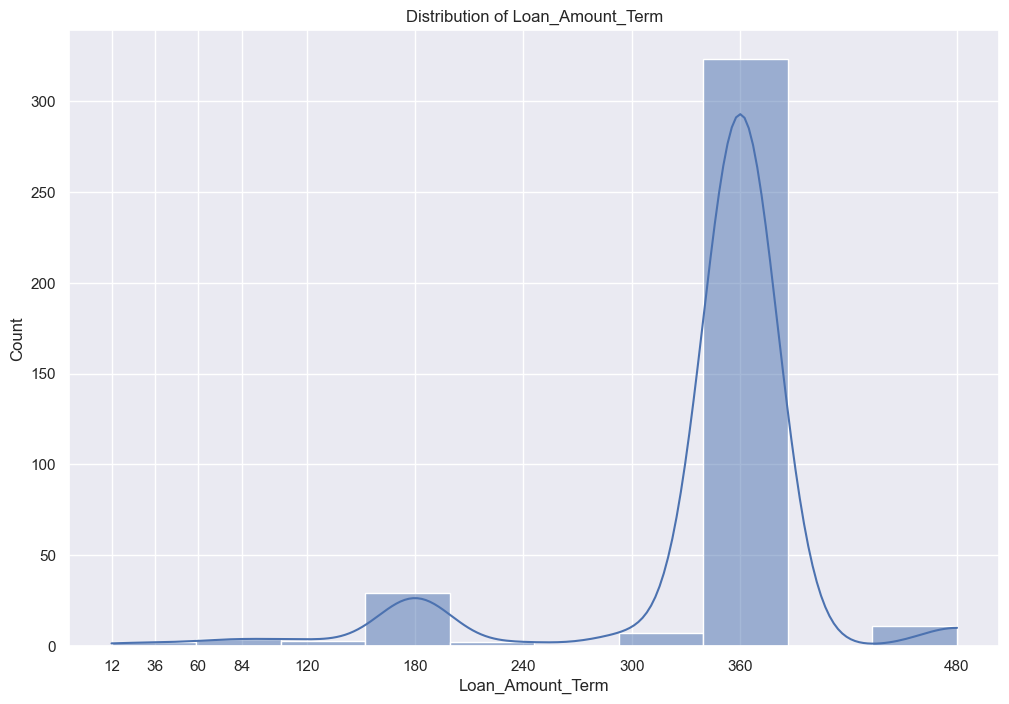

In [101]:
# Review on the histogram for `Loan_Amount_Term`
fig = plt.figure(1, figsize=(12,8))
sns.histplot(df['Loan_Amount_Term'], kde=True)
plt.title("Distribution of Loan_Amount_Term")
plt.xticks(term_lst)
plt.show()

In [102]:
# Get the unique counts of each values in `Loan_Amount_Term`
df['Loan_Amount_Term'].value_counts()

360.0    323
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64

From the output above, it is shown that:
1. The majority of loan terms are 360, 180, and 300 months.
2. Therefore, binning is applied according to the following criteria:
    - If `Loan_Amount_Term` is less than 180 months, label it as "LT 120"
    - Otherwise, retain the term as the label

In [103]:
# Binning
df['Loan_Amount_Term_bin'] = df['Loan_Amount_Term'].apply(lambda term: "LT 120" if term < 180 else str(int(term)))

# Inspect the changes
print(df[['Loan_Amount_Term_bin', 'Loan_Amount_Term']].value_counts())

# Drop the original column
df.drop(columns='Loan_Amount_Term', axis=1, inplace=True)

# Inspect Results
print(f"\n No of Columns After Binning: {df.shape[1]} \n List of Columns: \n {df.columns.tolist()}")

Loan_Amount_Term_bin  Loan_Amount_Term
360                   360.0               323
180                   180.0                29
480                   480.0                11
300                   300.0                 7
LT 120                84.0                  3
                      120.0                 3
240                   240.0                 2
LT 120                12.0                  1
                      36.0                  1
                      60.0                  1
dtype: int64

 No of Columns After Binning: 13 
 List of Columns: 
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area', 'Loan_Status', 'CoapplicantIncome_bin', 'Loan_Amount_Term_bin']


#### Data Type Standardization

In [104]:
# Update the datatype for Loan Amount Term and Credit History from float64 to object
df = df.astype({'Loan_Amount_Term_bin': "object", 'Credit_History': "object", "CoapplicantIncome_bin": "object"})

# Remove decimal place
df['Credit_History'] = df['Credit_History'].apply(lambda x: '{:.0f}'.format(x))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                381 non-null    object 
 1   Gender                 381 non-null    object 
 2   Married                381 non-null    object 
 3   Dependents             381 non-null    object 
 4   Education              381 non-null    object 
 5   Self_Employed          381 non-null    object 
 6   ApplicantIncome        381 non-null    int64  
 7   LoanAmount             381 non-null    float64
 8   Credit_History         381 non-null    object 
 9   Property_Area          381 non-null    object 
 10  Loan_Status            381 non-null    object 
 11  CoapplicantIncome_bin  381 non-null    object 
 12  Loan_Amount_Term_bin   381 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 38.8+ KB


In [105]:
# Define the list of numerical and categorical variables
col_num = ['ApplicantIncome', 'LoanAmount']
col_cat = [cat for cat in df.columns.tolist() if cat not in col_num]

print(f"List of Numerical Variables ({len(col_num)}): {col_num}")
print(f"\nList of Categorical Variables ({len(col_cat)}): {col_cat}" )

List of Numerical Variables (2): ['ApplicantIncome', 'LoanAmount']

List of Categorical Variables (11): ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status', 'CoapplicantIncome_bin', 'Loan_Amount_Term_bin']


#### Outliers Detection & Treatment
---
In this section, statistical and visual methods will be used to identify the outliers for the numerical variables in the dataset.

##### Outliers Detection Using Statistical Method

In [106]:
# Create a function that get the lower bound, upper bound, and outliers
def detect_outliers(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5*iqr)
  upper_bound = q3 + (1.5*iqr)
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()
  no_outliers = len(outliers)

  has_outliers = False
  if len(outliers) != 0:
    has_outliers = True

  return lower_bound, upper_bound, has_outliers, no_outliers, outliers

# Create a function that tabulate the lower_bound, upper_bound, has_outliers, outliers for the list of given numerical columns
def outlier_table(df, num_col):
  outlier_lst = []
  col_names = ["Lower_Bound", "Upper_Bound", "Has_Outliers", "No_of_Outliers", "Outliers"]

  for col in num_col:
    outlier_lst.append(detect_outliers(df, col))

  outlier_dict = [dict(zip(col_names, outlier)) for outlier in outlier_lst]

  outlier_df = pd.DataFrame(outlier_dict, index=num_col)

  display(outlier_df)


In [107]:
outlier_table(df, col_num)

,Lower_Bound,Upper_Bound,Has_Outliers,No_of_Outliers,Outliers
ApplicantIncome,68.0,6820.0,True,14,"[7660, 7100, 7333, 9323, 9703, 7200, 6822, 875..."
LoanAmount,34.5,182.5,True,7,"[17.0, 25.0, 25.0, 30.0, 30.0, 26.0, 9.0]"


From the output above, it is shown that:
1. All the numerical variables contain outliers. Hence, handling of outliers is required.

##### Outliers Detection Using Visual Method

In [108]:
# Create a function that plot boxplot by taking a list of numerical column
def plot_boxplot(df, num_col, figsize=(12, 10), no_col=2):
  num_cols = len(num_col)

  fig, ax  = plt.subplots(nrows=int(round(num_cols/3, 0)), ncols=no_col, figsize=figsize, sharex=False, sharey=False)
  fig.suptitle("Box Plots for Numerical Variables", fontsize=16)

  n  = int(round(num_cols/3, 0)) * 3 - 1

  for i, ax in enumerate(ax.flat):
    # Hide axis and exit for loop
    if (i == n) and (n%3 == 0):
      ax.set_visible(False)
      break

    if i < num_cols:
      sns.boxplot(data=df, x=num_col[i], ax=ax, color=color_tone)
      ax.set_title(num_col[i], fontsize=12)

  plt.tight_layout()
  plt.show()

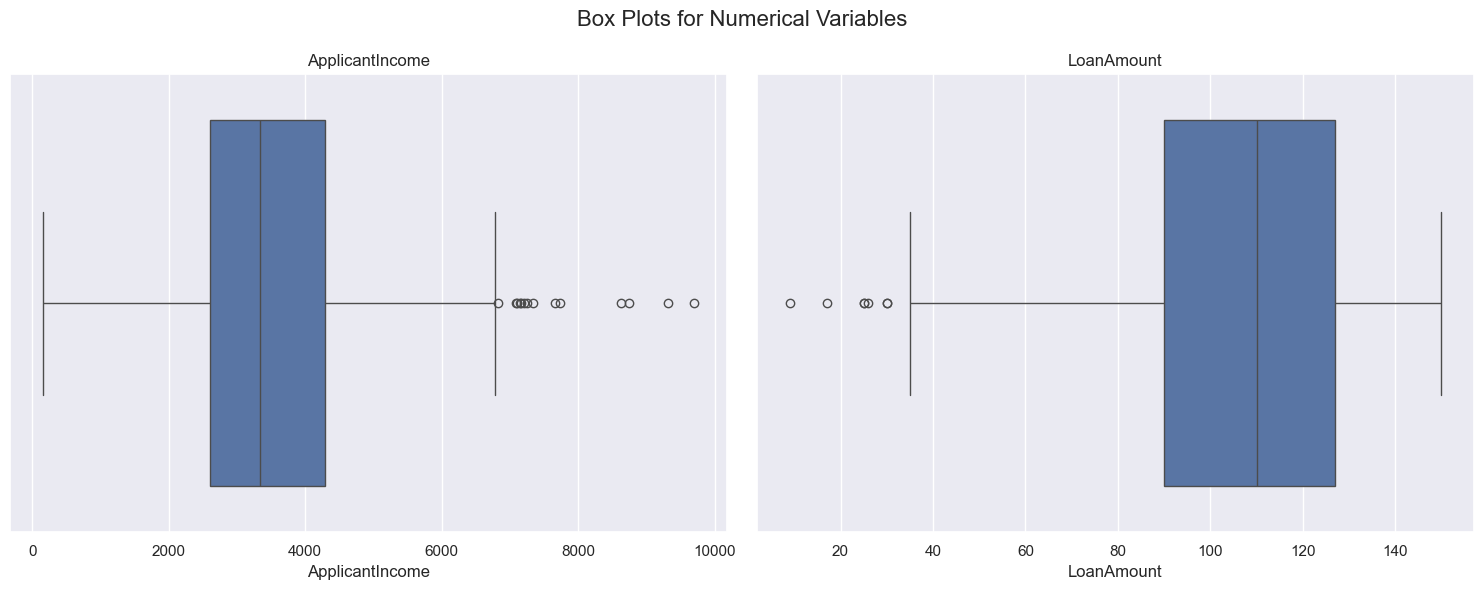

In [109]:
plot_boxplot(df, col_num, (15, 6))

From the output above, it is shown that:
1. Outliers have been identified in all numerical variables within the dataset.

##### Method 1 - Outliers Treatment Using Log Transformation

In [110]:
# Apply log transformation on the numerical column
for col in col_num:
  df[col + "_log"] = df[col].apply(lambda x: np.log1p(x))

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_bin,Loan_Amount_Term_bin,ApplicantIncome_log,LoanAmount_log
0,LP001003,Male,Yes,1,Graduate,No,4583,128.0,1,Rural,N,LT 2000,360,8.430327,4.859812
1,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,1,Urban,Y,No Coapplicant,360,8.006701,4.204693
2,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,1,Urban,Y,BTW 2000 To 5000,360,7.857094,4.795791
3,LP001008,Male,No,0,Graduate,No,6000,141.0,1,Urban,Y,No Coapplicant,360,8.699681,4.955827
4,LP001013,Male,Yes,0,Not Graduate,No,2333,95.0,1,Urban,Y,LT 2000,360,7.755339,4.564348


In [111]:
# List of numerical variables with "_log"
col_num_log = [col + "_log" for col in col_num]

In [112]:
# Statistical Check for Outliers After Log Transformation
outlier_table(df, col_num_log)

,Lower_Bound,Upper_Bound,Has_Outliers,No_of_Outliers,Outliers
ApplicantIncome_log,7.113415,9.114045,True,7,"[6.90875477931522, 9.140347000155648, 5.017279..."
LoanAmount_log,3.999103,5.363786,True,23,"[2.8903717578961645, 3.58351893845611, 3.87120..."


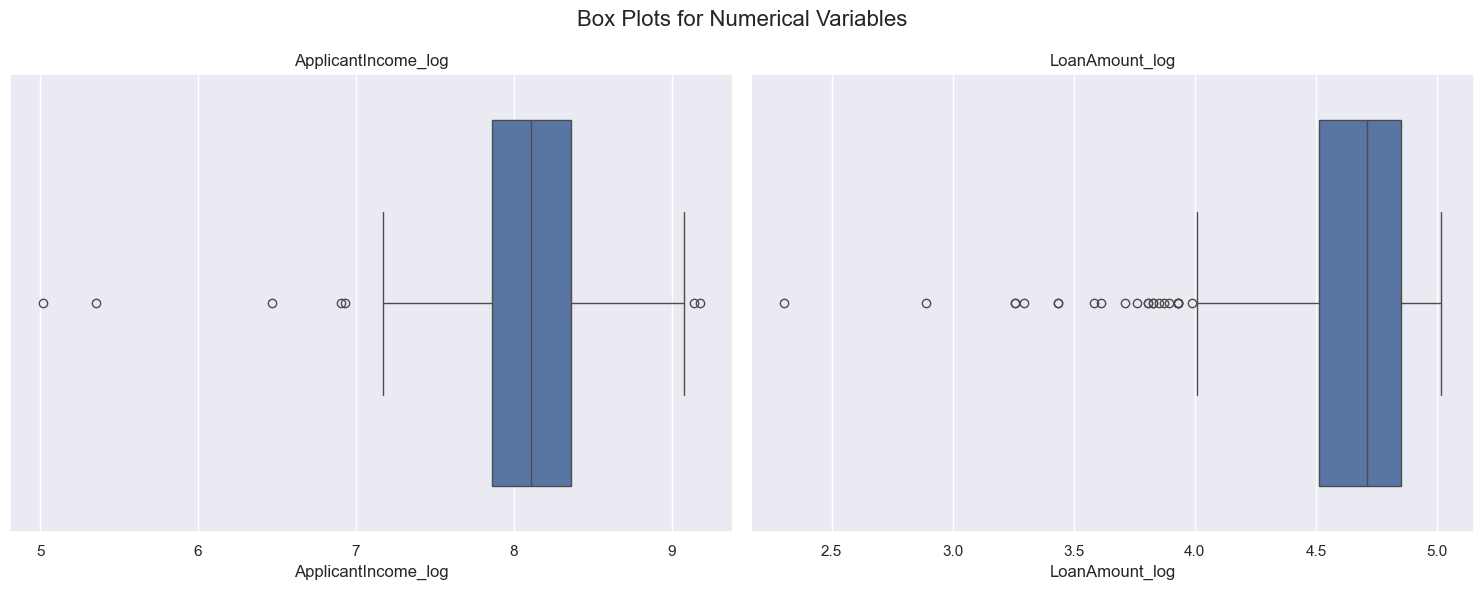

In [113]:
# Visual Check for Outliers After Log Transformation
plot_boxplot(df, col_num_log, (15, 6))

From the statistical and visual output above, it is shown that:
1. There are still outliers present in the numerical variables of the dataset. Therefore, an additional outlier handling method is being employed.

In [114]:
# Remove log_transformation_col
df.drop(columns=col_num_log, axis=1, inplace=True)
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area', 'Loan_Status', 'CoapplicantIncome_bin',
       'Loan_Amount_Term_bin'],
      dtype='object')

##### Method 2 - Outliers Treatment Using RobustScaler

In [115]:
from sklearn.preprocessing import RobustScaler

# Create a copy of df and take only the numerical variables
df_rs = df.copy()
df_rs = df_rs[col_num]

trans = RobustScaler()
df_rs = trans.fit_transform(df_rs)

# Create a list of column name with "_rs"
col_num_rs = [col + "_rs" for col in col_num]

# Create a df_rs dataframe for statistical and visual check
df_rs = pd.DataFrame(df_rs, columns=col_num_rs)

df_rs.head()

,ApplicantIncome_rs,LoanAmount_rs
0,0.740521,0.486486
1,-0.197275,-1.189189
2,-0.444313,0.270270
3,1.579976,0.837838
4,-0.592417,-0.405405


In [116]:
# Statistical Check
outlier_table(df_rs, col_num_rs)

,Lower_Bound,Upper_Bound,Has_Outliers,No_of_Outliers,Outliers
ApplicantIncome_rs,-1.934242,2.065758,True,14,"[2.563388625592417, 2.2316350710900474, 2.3696..."
LoanAmount_rs,-2.040541,1.959459,True,7,"[-2.5135135135135136, -2.2972972972972974, -2...."


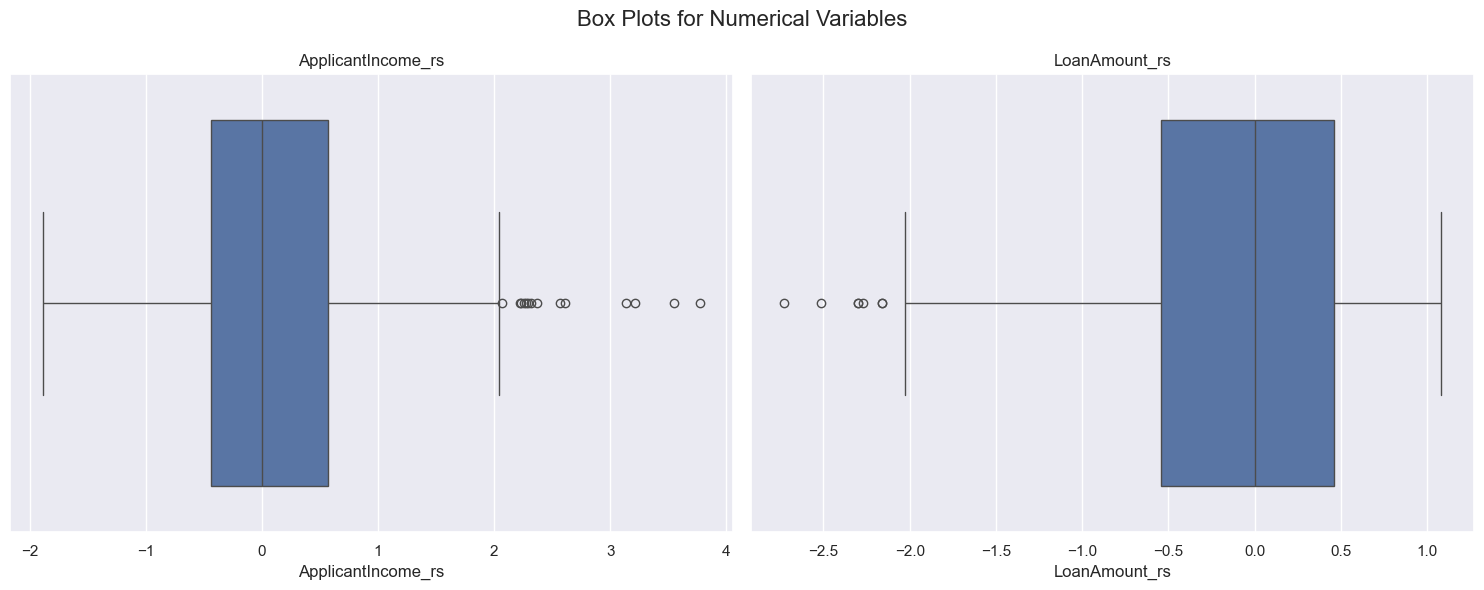

In [117]:
# Visual Check
plot_boxplot(df_rs, col_num_rs, (15, 6))

From the statistical and visual output, it is shown that:
1. After performing the `RobustScaler` from the scikit-learn library, outliers are still present in the dataset. Therefore, this method is deemed ineffective for handling the outliers.

##### Method 3 - Outliers Treatment Using Log Transformation + RobustScaler

In [118]:
# Apply log transformation on the numerical column
for col in col_num:
  df[col + "_log"] = df[col].apply(lambda x: np.log1p(x))

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_bin,Loan_Amount_Term_bin,ApplicantIncome_log,LoanAmount_log
0,LP001003,Male,Yes,1,Graduate,No,4583,128.0,1,Rural,N,LT 2000,360,8.430327,4.859812
1,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,1,Urban,Y,No Coapplicant,360,8.006701,4.204693
2,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,1,Urban,Y,BTW 2000 To 5000,360,7.857094,4.795791
3,LP001008,Male,No,0,Graduate,No,6000,141.0,1,Urban,Y,No Coapplicant,360,8.699681,4.955827
4,LP001013,Male,Yes,0,Not Graduate,No,2333,95.0,1,Urban,Y,LT 2000,360,7.755339,4.564348


In [119]:
# Generate a list of numerical column with "_log_rs"
col_num_log_rs = [col + "_rs" for col in col_num_log]
col_num_log_rs

['ApplicantIncome_log_rs', 'LoanAmount_log_rs']

In [120]:
# Apply RobustScaler

from sklearn.preprocessing import RobustScaler

# Create a copy of df and take only the numerical variables
df_log_rs = df.copy()
df_log_rs = df_log_rs[col_num_log]

trans = RobustScaler()
df_log_rs = trans.fit_transform(df_log_rs)

# Create a df_rs dataframe for statistical and visual check
df_log_rs = pd.DataFrame(df_log_rs, columns=col_num_log_rs)

df_log_rs.head()

,ApplicantIncome_log_rs,LoanAmount_log_rs
0,0.636598,0.440490
1,-0.210388,-1.479721
2,-0.509508,0.252836
3,1.175136,0.721917
4,-0.712954,-0.425541


In [121]:
# Statistical Check
outlier_table(df_log_rs, col_num_log_rs)

,Lower_Bound,Upper_Bound,Has_Outliers,No_of_Outliers,Outliers
ApplicantIncome_log_rs,-1.996397,2.003603,True,7,"[-2.4055882348388034, 2.056189684285543, -6.18..."
LoanAmount_log_rs,-2.082320,1.917680,True,23,"[-5.33210541625809, -3.3004331069527097, -2.45..."


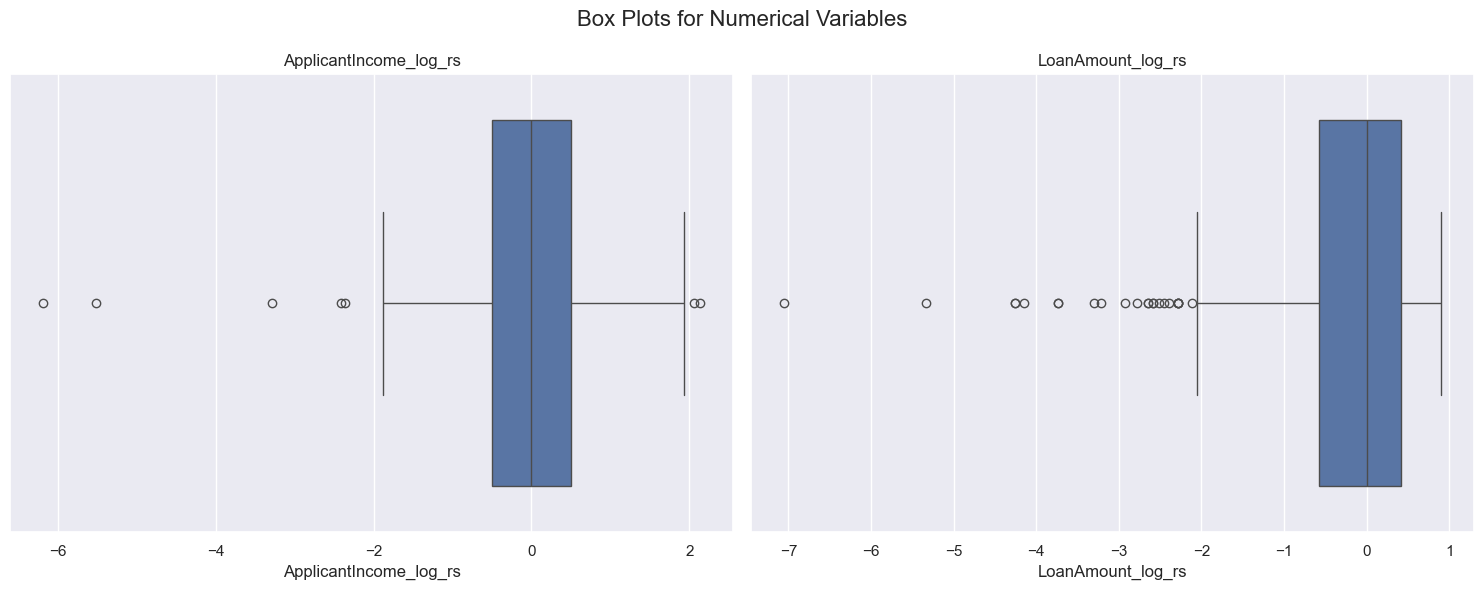

In [122]:
# Visual Check
plot_boxplot(df_log_rs, col_num_log_rs, (15, 6))

From the statistical and visual output, it is shown that:
1. There are still outliers present in each numerical variable. Therefore, it is suggested to employ another method to handle outliers.

In [123]:
# Drop the log transformed columns
df.drop(columns=col_num_log, axis=1, inplace=True)
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area', 'Loan_Status', 'CoapplicantIncome_bin',
       'Loan_Amount_Term_bin'],
      dtype='object')

##### Method 4 - Outliers Treatment Using Winsorization
---
Source: [GeeksforGeeks](https://www.geeksforgeeks.org/winsorization/)

Winsorization is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data. The mean value calculated after such replacement of the extreme values is called winsorized mean.  

For example, 90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value of the data at the 5th percentile.

In [124]:
from scipy.stats.mstats import winsorize

# Apply winsorize on the numerical column
for col in col_num:
  df[col + "_win"] = winsorize(df[col], limits=[0.02, 0.04])

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_bin,Loan_Amount_Term_bin,ApplicantIncome_win,LoanAmount_win
0,LP001003,Male,Yes,1,Graduate,No,4583,128.0,1,Rural,N,LT 2000,360,4583,128.0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,1,Urban,Y,No Coapplicant,360,3000,66.0
2,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,1,Urban,Y,BTW 2000 To 5000,360,2583,120.0
3,LP001008,Male,No,0,Graduate,No,6000,141.0,1,Urban,Y,No Coapplicant,360,6000,141.0
4,LP001013,Male,Yes,0,Not Graduate,No,2333,95.0,1,Urban,Y,LT 2000,360,2333,95.0


In [125]:
# Create a list of winsorize column
col_num_win = [col + "_win" for col in col_num]

In [126]:
# Create a function to compare the original mean against Winsorized mean

def ori_win_table(df, col_num, col_num_win):
  # Check the difference of mean after winsorization
  ori_mean = []
  win_mean = []

  # Get a list of mean value of the original features
  for col in col_num:
    ori_mean.append(df[col].mean())

  # Get a list of mean value of the winsorized features
  for col in col_num_win:
    win_mean.append(df[col].mean())

  win_effect_dict = {"Original Mean": ori_mean,
                    "Winsorized Mean": win_mean}

  win_effect_df = pd.DataFrame(win_effect_dict, index=col_num)
  win_effect_df['Percent Diff (%)'] = (win_effect_df['Winsorized Mean'] - win_effect_df['Original Mean'])/win_effect_df['Original Mean']*100

  display(win_effect_df)


In [127]:
# Compare the original mean against the Winsorized Mean
ori_win_table(df, col_num, col_num_win)

,Original Mean,Winsorized Mean,Percent Diff (%)
ApplicantIncome,3579.845144,3548.787402,-0.867572
LoanAmount,104.986877,105.068241,0.077500


In [128]:
# Statistical Check 
outlier_table(df, col_num_win)

c:\Users\WeiZhenLim\anaconda3\lib\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\WeiZhenLim\anaconda3\lib\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\WeiZhenLim\anaconda3\lib\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\WeiZhenLim\anaconda3\lib\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,Lower_Bound,Upper_Bound,Has_Outliers,No_of_Outliers,Outliers
ApplicantIncome_win,68.0,6820.0,False,0,[]
LoanAmount_win,34.5,182.5,False,0,[]


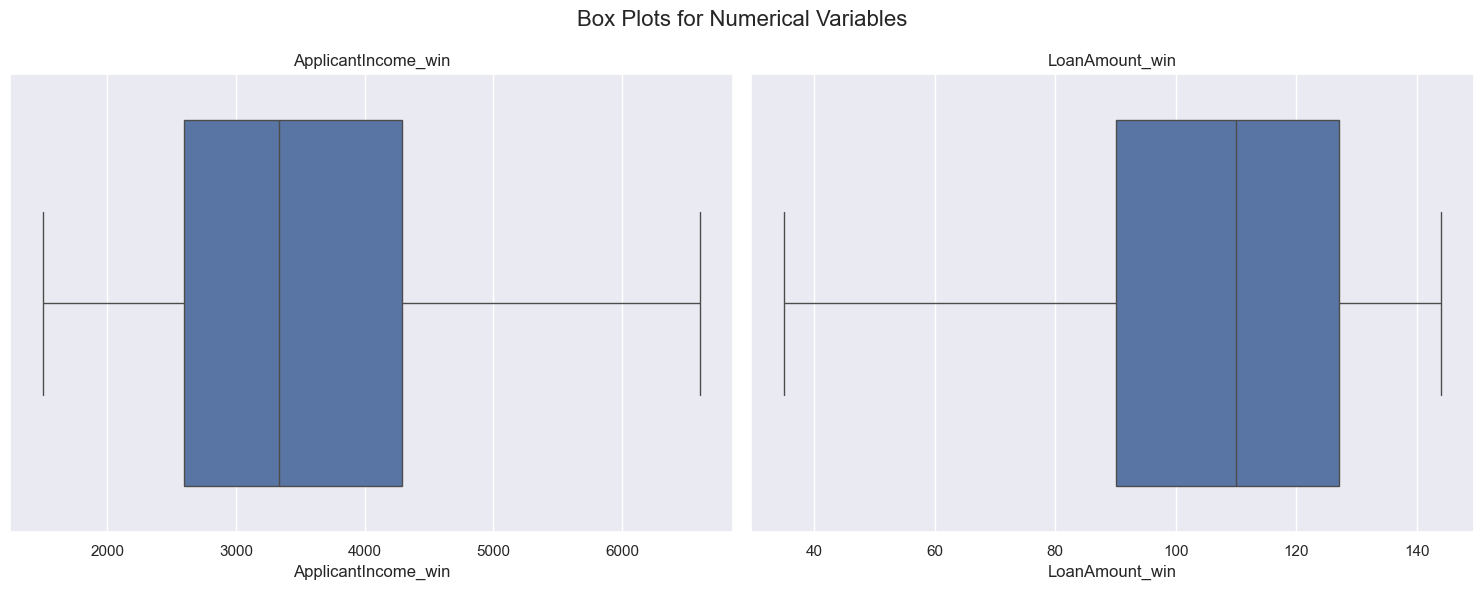

In [129]:
# Visual Check
plot_boxplot(df, col_num_win, (15, 6))

From the statistical and visual output, it is shown that:
1. After applying Winsorization, no outliers were found in `Applicant Income` and `Loan Amount`. Therefore, Winsorization appears to be an effective method for handling outliers in these two features.

In [130]:
# Drop the winsorized columns
df.drop(columns=col_num_win, axis=1, inplace=True)
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area', 'Loan_Status', 'CoapplicantIncome_bin',
       'Loan_Amount_Term_bin'],
      dtype='object')

##### Finalized - Outliers Treatment Using Winsorization
---
From Method 4, we conclude that the outliers in `Applicant Income` and `Loan Amount` can be handled using Winsorization.

In [131]:
# Perform Winsorization on Applicant Income and Loan Amount
col_num_win = ['ApplicantIncome', 'LoanAmount']

for col in col_num_win:
  df[col + "_win"] = winsorize(df[col], limits=[0.02, 0.04])

# Drop the original Applicant Income and Loan Amount column
df.drop(columns=col_num_win, axis=1, inplace=True)

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_bin,Loan_Amount_Term_bin,ApplicantIncome_win,LoanAmount_win
0,LP001003,Male,Yes,1,Graduate,No,1,Rural,N,LT 2000,360,4583,128.0
1,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,Y,No Coapplicant,360,3000,66.0
2,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,Y,BTW 2000 To 5000,360,2583,120.0
3,LP001008,Male,No,0,Graduate,No,1,Urban,Y,No Coapplicant,360,6000,141.0
4,LP001013,Male,Yes,0,Not Graduate,No,1,Urban,Y,LT 2000,360,2333,95.0


In [132]:
# Sort the col again
sort_col = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome_win', 'CoapplicantIncome_bin',
            'LoanAmount_win', 'Loan_Amount_Term_bin', 'Credit_History', 'Property_Area', 'Loan_Status']

df = df[sort_col]

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome_win,CoapplicantIncome_bin,LoanAmount_win,Loan_Amount_Term_bin,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,LT 2000,128.0,360,1,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,No Coapplicant,66.0,360,1,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,BTW 2000 To 5000,120.0,360,1,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,No Coapplicant,141.0,360,1,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,LT 2000,95.0,360,1,Urban,Y


In [133]:
# Define the list of numerical and categorical variables
col_num = ['ApplicantIncome_win', 'LoanAmount_win']
col_cat = [cat for cat in df.columns.tolist() if cat not in col_num]

#### Exploratory Data Analysis (EDA)

In [134]:
# Check for the categorical and numerical variables in the dataset
print(f"There are a total of {len(col_cat)} categorical variables:")
print(col_cat)
print(f"\nThere are a total of {len(col_num)} categorical variables:")
print(col_num)
print(f"\nThere are a total of {df.shape[1]} variables:")
print(df.columns.tolist())

There are a total of 11 categorical variables:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'CoapplicantIncome_bin', 'Loan_Amount_Term_bin', 'Credit_History', 'Property_Area', 'Loan_Status']

There are a total of 2 categorical variables:
['ApplicantIncome_win', 'LoanAmount_win']

There are a total of 13 variables:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome_win', 'CoapplicantIncome_bin', 'LoanAmount_win', 'Loan_Amount_Term_bin', 'Credit_History', 'Property_Area', 'Loan_Status']


In [135]:
# Remove Loan ID from col_cat
col_cat.remove("Loan_ID")

##### Data Distribution (Categorical Variable)

In [136]:
# Create a function that adds labels to the end of each bar in a bar chart
def add_value_labels(ax, spacing=5, decimal=0):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
      # Get X and Y placement of label from rect.
      y_value = rect.get_height()
      x_value = rect.get_x() + rect.get_width() / 2

      # Number of points between bar and label. Change to your liking.
      space = spacing
      # Vertical alignment for positive values
      va = 'bottom'

      # If value of bar is negative: Place label below bar
      if y_value < 0:
          # Invert space to place label below
          space *= -1
          # Vertically align label at top
          va = 'top'

      # Use Y value as label and format number with one decimal place
      if decimal == 0:
        label = int(y_value)            
      else:
        label = round(y_value, decimal)

      # Create annotation
      ax.annotate(label,                      # Use `label` as label
                  (x_value, y_value),         # Place label at end of the bar
                  xytext=(0, space),          # Vertically shift label by `space`
                  textcoords="offset points", # Interpret `xytext` as offset in points
                  ha='center',                # Horizontally center label
                  va=va)                      # Vertically align label differently for
                                              # positive and negative values.

In [138]:
# Create a function that plot boxplot by taking a list of column
def plot_barplot(df, col_list, figsize=(12, 10)):

  num_cols = len(col_list)

  fig, ax  = plt.subplots(nrows=int(math.ceil(num_cols/3)), ncols=3, figsize=figsize, sharex=False, sharey=False)
  fig.suptitle("Bar Plots for Categorical Variables", fontsize=16)

  order_dict = {"Dependents": ["0", "1", "2", "3+"],
                "Loan_Amount_Term_bin": ["LT 120", "180", "240", "300", "360", "480"],
                "Property_Area": ["Rural", "Semiurban", "Urban"], 
                "CoapplicantIncome_bin": ["No Coapplicant", "LT 2000", "BTW 2000 To 5000", "MT 5000"]}

  for i, ax in enumerate(ax.flat):
    # Hide axis and exit for loop
    if i >= num_cols:
      ax.set_visible(False)
      plt.tight_layout()

    if (i < num_cols) and (col_list[i] in order_dict.keys()): # For Dependents, Loan_Amount_Term_bin, Property_Area, and Coapplicant_Income_bin
      sns.countplot(data=df, x=col_list[i], ax=ax, order=order_dict[col_list[i]], color=color_tone)
      ax.set_title(col_list[i], fontsize=12)
      ax.set_ylim([0, df[col_list[i]].value_counts().max() * 1.25])

      if col_list[i] == "CoapplicantIncome_bin":
        ax.tick_params(axis='x', labelsize=10, rotation=15, labelleft=True)
      
      add_value_labels(ax)
      plt.tight_layout()
      continue

    if i < num_cols:
      sns.countplot(data=df, x=col_list[i], ax=ax, color=color_tone)
      ax.set_title(col_list[i], fontsize=12)
      ax.set_ylim([0, df[col_list[i]].value_counts().max() * 1.25])
      add_value_labels(ax)
      plt.tight_layout()
    
  plt.show()

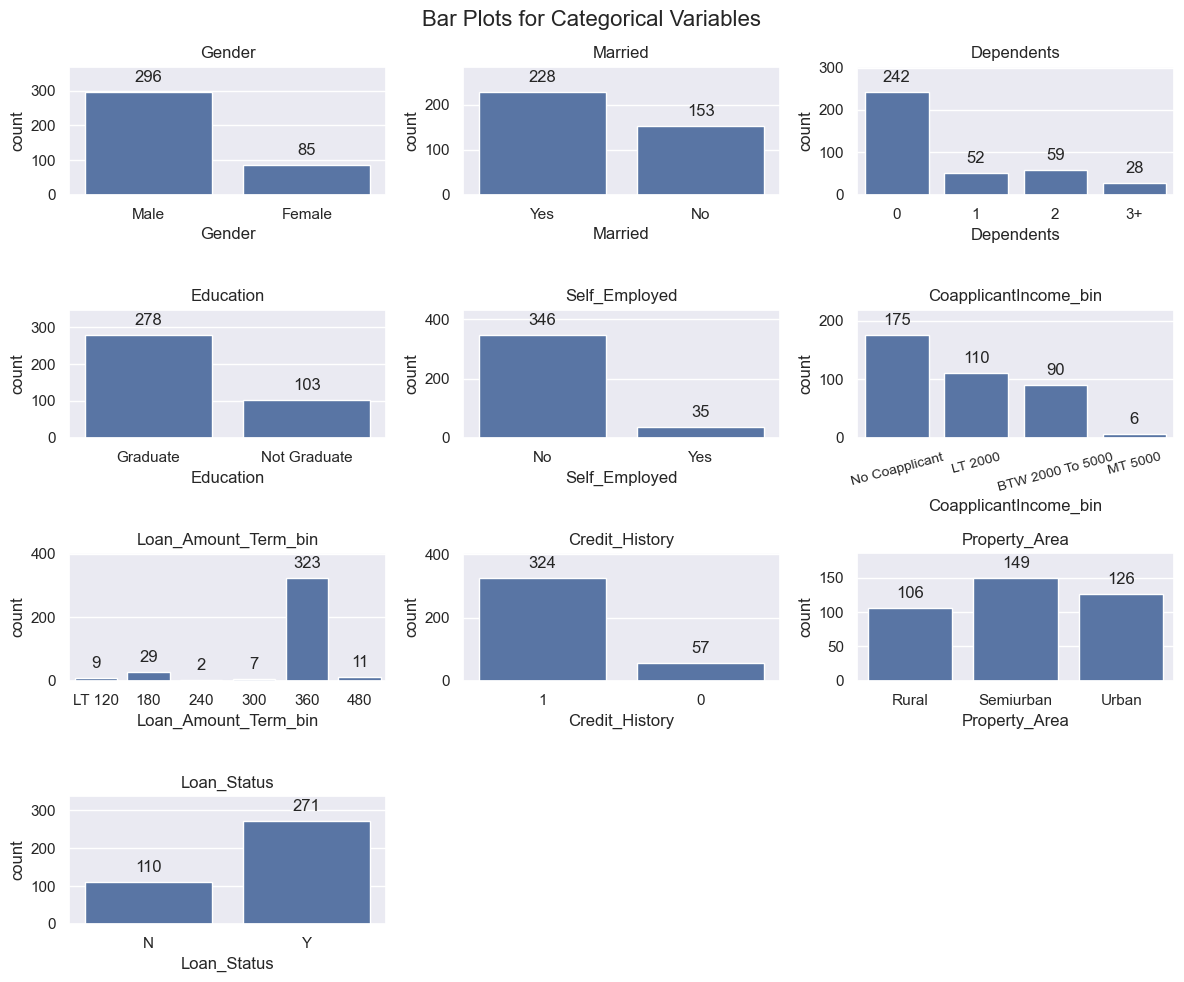

In [139]:
# Check using Bar Plot
plot_barplot(df, col_cat)

From the output above, it is shown that:
1. Class imbalances are observed across the variables. However, to assess their impact on the model, we will compare results obtained from the original data with those from balanced data for each model.

##### Data Distribution (Numerical Variable)

In [140]:
col_num

['ApplicantIncome_win', 'LoanAmount_win']

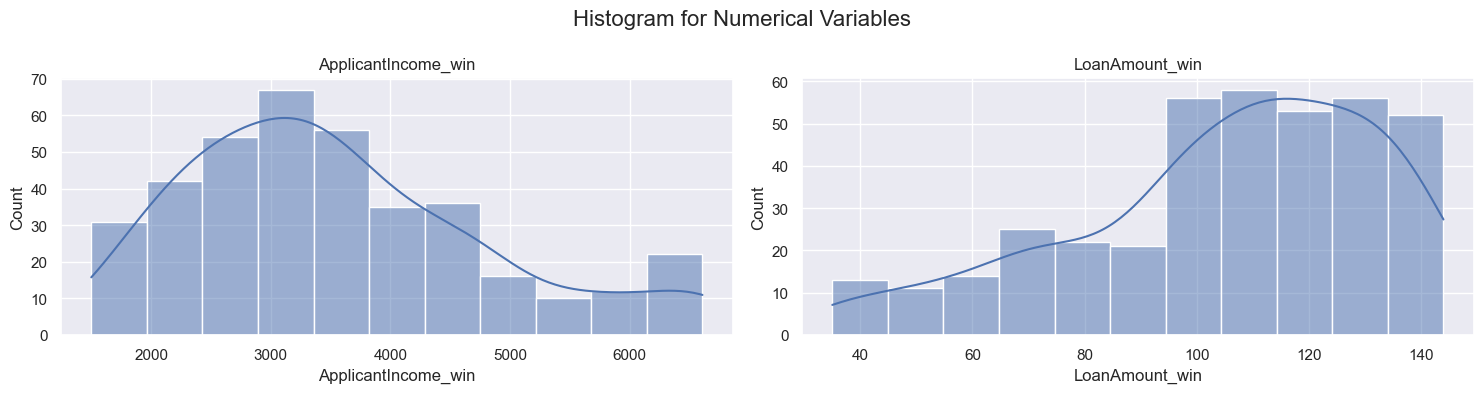

In [141]:
# Check using histogram
plot_hist(df, col_num, (15, 4), 2)

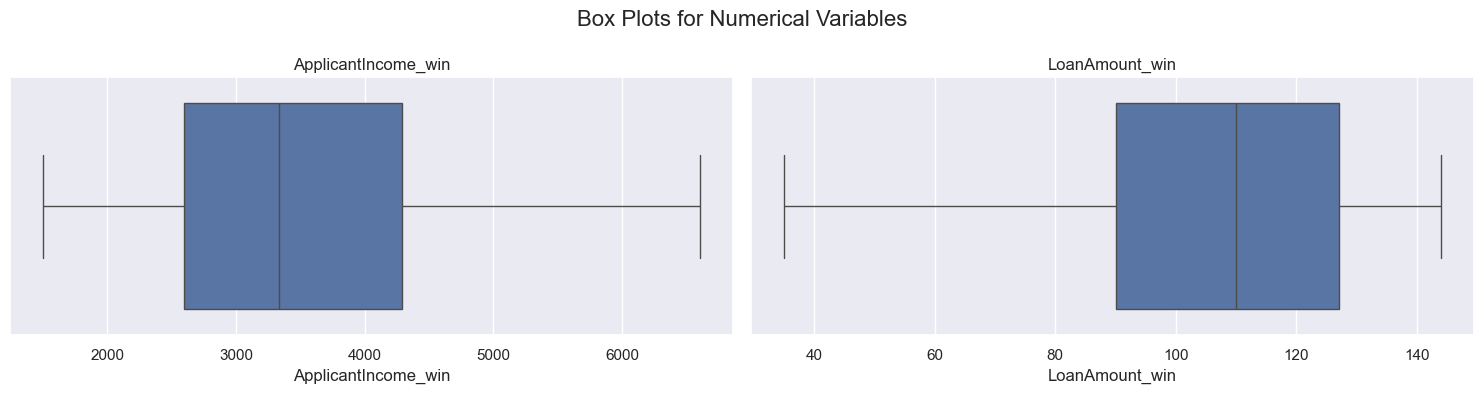

In [142]:
# Check for outliers
plot_boxplot(df, col_num, (15, 4))

From the output above, it is shown that:
1. From the histogram, the numerical variables are not normally distributed. Hence, normalization shall be used for feature scaling.
2. From the box plot, no outliers were found in the numerical variables. Hence, the numerical variables are suitable for the next step of data preprocessing.

#### Assigning Input Variables (X) and Target Variable (y)

In [143]:
# Assigning Input Variables
X = df.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)

# Assigning Target Variable
y = df['Loan_Status']

In [144]:
display(X.head(3))
display(y.head(3))

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome_win,CoapplicantIncome_bin,LoanAmount_win,Loan_Amount_Term_bin,Credit_History,Property_Area
0,Male,Yes,1,Graduate,No,4583,LT 2000,128.0,360,1,Rural
1,Male,Yes,0,Graduate,Yes,3000,No Coapplicant,66.0,360,1,Urban
2,Male,Yes,0,Not Graduate,No,2583,BTW 2000 To 5000,120.0,360,1,Urban


0    N
1    Y
2    Y
Name: Loan_Status, dtype: object

#### Encoding Categorical Variables

##### Label Encoding
---
Label Encoding should be used only on the target variable because it transforms categorical labels into numerical values, which is necessary for machine learning algorithms to interpret the target variable correctly.

In [145]:
from sklearn.preprocessing import LabelEncoder

label_instance = LabelEncoder()

y = label_instance.fit_transform(y)

print(set(y))

{0, 1}


##### One-Hot Encoding

In [146]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(df, col_list):
	"""
	This function is use to one hot encoding the input dataset, based on the given list of column names.
	df = Dataset to be one hot encoded
	col_list = List of column names to be one hot encoded
	"""

	enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

	if not isinstance(col_list, list):
		raise TypeError("List of columns that you wish to encode.")

	for col in col_list:
		# fit_transform for each column
		enc_data = enc.fit_transform(df[[col]])
		# Merge encoded dataframe with the original dataframe
		df = pd.concat([df, enc_data], axis=1)
		# Drop the column that is used for the encoding
		df.drop([col], axis=1, inplace=True)

	return df


In [147]:
# Remove Loan_Status from the col_cat list
col_cat.remove("Loan_Status")

# Perform One-Hot Encoding on all the categorical variables
X = one_hot_encoding(X, col_cat)

In [148]:
# Inspect the OHE
display(X.head())
print(X.columns)

,ApplicantIncome_win,LoanAmount_win,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Loan_Amount_Term_bin_240,Loan_Amount_Term_bin_300,Loan_Amount_Term_bin_360,Loan_Amount_Term_bin_480,Loan_Amount_Term_bin_LT 120,Credit_History_0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4583,128.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,3000,66.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2583,120.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,6000,141.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2333,95.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Index(['ApplicantIncome_win', 'LoanAmount_win', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'CoapplicantIncome_bin_BTW 2000 To 5000',
       'CoapplicantIncome_bin_LT 2000', 'CoapplicantIncome_bin_MT 5000',
       'CoapplicantIncome_bin_No Coapplicant', 'Loan_Amount_Term_bin_180',
       'Loan_Amount_Term_bin_240', 'Loan_Amount_Term_bin_300',
       'Loan_Amount_Term_bin_360', 'Loan_Amount_Term_bin_480',
       'Loan_Amount_Term_bin_LT 120', 'Credit_History_0', 'Credit_History_1',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


#### Feature Scaling (Normalization)
---
Since the numerical variables in the dataset are not normally distributed, normalization is used.

In [149]:
# Apply normalization on the numerical variables
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()

X_num_norm = norm.fit_transform(X[col_num])
X_num_norm = pd.DataFrame(X_num_norm, columns=[col+"_norm" for col in col_num])


In [150]:
# Drop the original columns and append new ones
X = pd.concat([X, X_num_norm], axis=1).drop(columns=col_num, axis=1)

In [151]:
# Inspect the final output
display(X.head())
print(X.columns)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Loan_Amount_Term_bin_360,Loan_Amount_Term_bin_480,Loan_Amount_Term_bin_LT 120,Credit_History_0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome_win_norm,LoanAmount_win_norm
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.603563,0.853211
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.293657,0.284404
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.212020,0.779817
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.880971,0.972477
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.163078,0.550459


Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'CoapplicantIncome_bin_BTW 2000 To 5000',
       'CoapplicantIncome_bin_LT 2000', 'CoapplicantIncome_bin_MT 5000',
       'CoapplicantIncome_bin_No Coapplicant', 'Loan_Amount_Term_bin_180',
       'Loan_Amount_Term_bin_240', 'Loan_Amount_Term_bin_300',
       'Loan_Amount_Term_bin_360', 'Loan_Amount_Term_bin_480',
       'Loan_Amount_Term_bin_LT 120', 'Credit_History_0', 'Credit_History_1',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'ApplicantIncome_win_norm', 'LoanAmount_win_norm'],
      dtype='object')


#### Class Balancing
---
Since the dataset contains a relatively small number of instances, oversampling using SMOTE is deployed.

##### Oversampling Using SMOTE

Counter({0: 271, 1: 271})


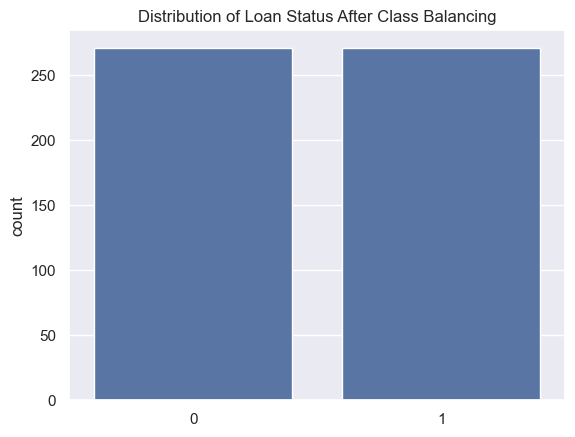

In [152]:
from collections import Counter
from imblearn.over_sampling import SMOTE

X_sm, y_sm = SMOTE().fit_resample(X, y)

print(Counter(y_sm))
sns.countplot(x=y_sm, color=color_tone)
plt.title("Distribution of Loan Status After Class Balancing")
plt.show()

In [153]:
print(X_sm.shape)
print(y_sm.shape)

(542, 29)
(542,)


#### Data Split

##### Original Data

In [154]:
# Perform Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [155]:
# Inspect the split
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

266
115
266
115


##### Balanced Data (Oversampling with SMOTE)

In [156]:
# Perform Data Split
from sklearn.model_selection import train_test_split

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

In [157]:
# Inspect the split
print(len(X_train_sm))
print(len(X_test_sm))
print(len(y_train_sm))
print(len(y_test_sm))

379
163
379
163


### Section 2: Model Implementation & Validation
---
For this project, three machine learning algorithms have been selected:
1. Naïve Bayes
2. Logistic Regression
3. Random Forest

As for the performance evaluation, the following metrics will be used:
1. Accuracy
2. Precision
3. Recall
4. F1 Score
5. Confusion Matrix
6. ROC Curve

In [158]:
# Import the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Create function to print all the performance evaluation metrics
def evaluation_metrics(y_test, y_pred, avg_type):

  acc = accuracy_score(y_test, y_pred)
  pre = precision_score(y_test, y_pred, average=avg_type)
  recall = recall_score(y_test, y_pred, average=avg_type)
  f1 = f1_score(y_test, y_pred, average=avg_type)

  print('Accuracy: {:.3f}'.format(acc))
  print('Precision: {:.3f}'.format(pre))
  print('Recall: {:.3f}'.format(recall))
  print('F1 Score: {:.3f}'.format(f1))

  print('\n-------------------------------------------------------------------')

  print('\n Clasification Report:\n', classification_report(y_test,y_pred))

  print('\n-------------------------------------------------------------------\n')

  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, linewidth=.5, square=True, cmap='Blues_r')
  plt.xlabel('Predicted Label')
  plt.ylabel('Actual Label')
  plt.title('Confusion Matrix', size=15)

  performance = [acc, pre, recall, f1]

  return performance

In [159]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC Curve
def plot_roc(y_test, y_pred, title, figsize=(10,8)):

    # Create roc_curve & roc_auc_score
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    plt.figure(1, figsize)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

    return auc

#### Naïve Bayes

Functions for Naïve Bayes Modeling

In [160]:
from sklearn.naive_bayes import MultinomialNB

def build_nb_model(X_train, X_test, y_train):
  mnb = MultinomialNB()
  mnb.fit(X_train, y_train)

  y_pred = mnb.predict(X_test)

  return y_pred

Function for StratifiedKFold Cross Validation

In [161]:
# Import the required modules and functions
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Create a function that calculate the value for StratifiedKFold
def skfolds_results(X_train, y_train):
  skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  acc_skfolds = np.mean(cross_val_score(MultinomialNB(), X_train, y_train, cv=skfolds, scoring='accuracy'))
  pre_skfolds =  np.mean(cross_val_score(MultinomialNB(), X_train, y_train, cv=skfolds, scoring='precision'))
  recall_skfolds = np.mean(cross_val_score(MultinomialNB(), X_train, y_train, cv=skfolds, scoring='recall'))
  f1_skfolds = np.mean(cross_val_score(MultinomialNB(), X_train, y_train, cv=skfolds, scoring='f1'))

  print(f"Average Accuracy after K-Fold CV: {acc_skfolds:.3f}")
  print(f"Average Precision after K-Fold CV: {pre_skfolds:.3f}")
  print(f"Average Recall after K-Fold CV: {recall_skfolds:.3f}")
  print(f"Average F1 Score after K-Fold CV: {f1_skfolds:.3f}")

  performance = [acc_skfolds, pre_skfolds, recall_skfolds, f1_skfolds]

  return performance


##### Model NB-1: Naïve Bayes Base Model (Original Data)

Initial Model Building & Performance Evaluation

Accuracy: 0.817
Precision: 0.840
Recall: 0.817
F1 Score: 0.793

-------------------------------------------------------------------

 Clasification Report:
               precision    recall  f1-score   support

           0       0.94      0.43      0.59        35
           1       0.80      0.99      0.88        80

    accuracy                           0.82       115
   macro avg       0.87      0.71      0.74       115
weighted avg       0.84      0.82      0.79       115


-------------------------------------------------------------------



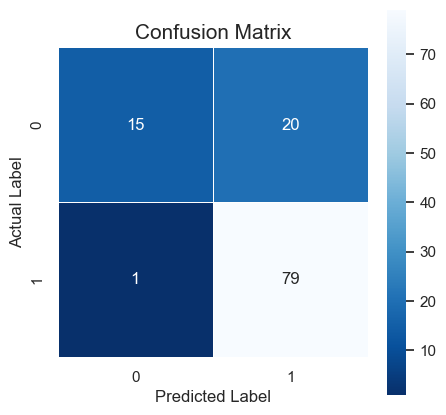

In [162]:
from sklearn.naive_bayes import MultinomialNB

y_pred_nb = build_nb_model(X_train, X_test, y_train)

performance_nb = evaluation_metrics(y_test, y_pred_nb, 'weighted')

ROC Curve

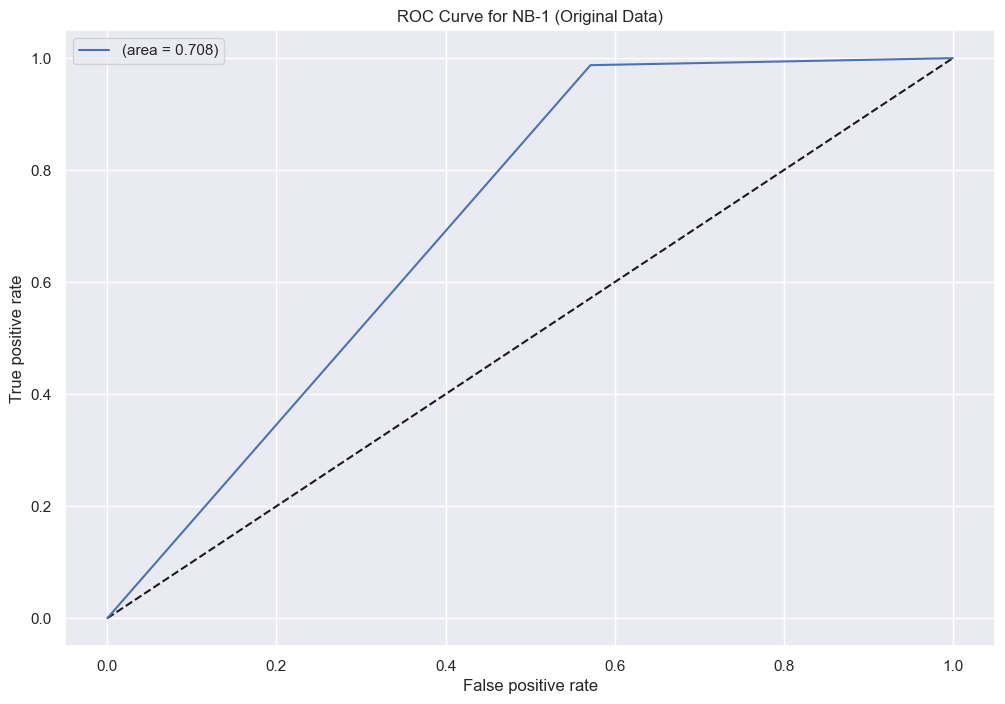

In [246]:
roc_nb = plot_roc(y_test, y_pred_nb, "ROC Curve for NB-1 (Original Data)",(12, 8))

Cross Validation Using StratifiedKFold with 5 Folds

In [164]:
# Since Naïve Bayes does not have hyper-parameter to tune, cross validation is used
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv_results_nb = skfolds_results(X_train, y_train)

Average Accuracy after K-Fold CV: 0.861
Average Precision after K-Fold CV: 0.845
Average Recall after K-Fold CV: 0.989
Average F1 Score after K-Fold CV: 0.911


##### Summary of Model NB-1: Naïve Bayes Model (Original Data)


<u>**Interpretation of Naïve Bayes Model NB-1**</u>
1. **Overall Performance Metrics**
    - Accuracy: The model achieves an accuracy of **81.7%**, indicating that it correctly predicts the class for the majority of instances.
    - Precision: With a precision of **84%**, the model has a strong ability to correctly identify positive cases out of all predicted positive instances.
    - Recall: The model demonstrates a recall of **81.7%**, indicating its effectiveness in capturing actual positive instances out of all true positive cases.
    - F1 Score: The F1 score of **79.3%** signifies a balanced measure of precision and recall, reflecting the model's overall effectiveness.
2. **Classification Report**
    - The classification report indicates a disparity in precision, with class 0 (loan rejected) demonstrating a higher precision of **94%** in contrast to class 1 (loan approved).
    - The recall for class 1 is notably higher (**99%**), suggesting that the model excels in identifying positive instances.
    - The F1 score for class 1 is substantially higher (**88%**) compared to class 0 (**59%**), indicating better performance in correctly classifying positive instances.
3. **Confusion Matrix**
    - The confusion matrix depicts a relatively higher number of false positives (**20 instances**) compared to false negatives (**1 instance**), indicating a tendency of the model to misclassify negative instances as positive.
    - The true positives (**79 instances**) significantly outnumber the true negatives (**15 instances**), reflecting the class imbalance in the dataset.
4. **ROC Curve**
    - The ROC curve illustrates the model's discrimination ability, with an AUC of **0.708**. While this indicates a moderate level of discrimination, there is still room for improvement.
5. **Performance After Stratified K-Fold Cross-Validation**
    - After applying Stratified K-Fold cross-validation with 5 folds, the model's performance improves across all metrics:
        - The average accuracy increases to **86.1%**, indicating enhanced overall predictive capability.
        - The average precision remains high at **84.5%**, indicating consistent performance in correctly identifying positive cases.
        - The average recall substantially increases to **98.9%**, indicating improved sensitivity in capturing positive instances.
        - The average F1 score improves to **91.1%**, reflecting a better balance between precision and recall after cross-validation.

Overall, the Naive Bayes model NB-1 demonstrates promising performance in predicting loan status, with notable improvements observed after applying cross-validation techniques to enhance generalization and robustness. However, there is scope for further optimization, particularly in reducing false positive predictions and enhancing discrimination ability.

##### Model NB-2: Naïve Bayes Base Model (Oversampling Using SMOTE)

Initial Model Building & Performance Evaluation

Accuracy: 0.767
Precision: 0.796
Recall: 0.767
F1 Score: 0.764

-------------------------------------------------------------------

 Clasification Report:
               precision    recall  f1-score   support

           0       0.89      0.64      0.75        87
           1       0.69      0.91      0.78        76

    accuracy                           0.77       163
   macro avg       0.79      0.78      0.77       163
weighted avg       0.80      0.77      0.76       163


-------------------------------------------------------------------



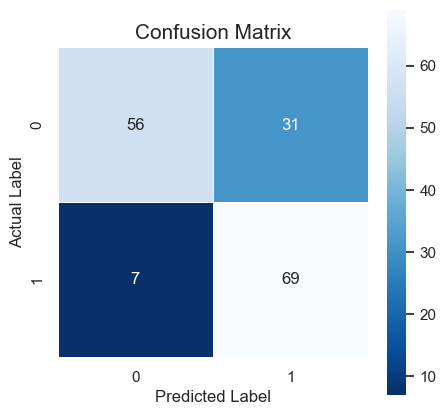

In [165]:
from sklearn.naive_bayes import MultinomialNB

y_pred_nb_sm = build_nb_model(X_train_sm, X_test_sm, y_train_sm)

performance_nb_sm = evaluation_metrics(y_test_sm, y_pred_nb_sm, 'weighted')

ROC Curve

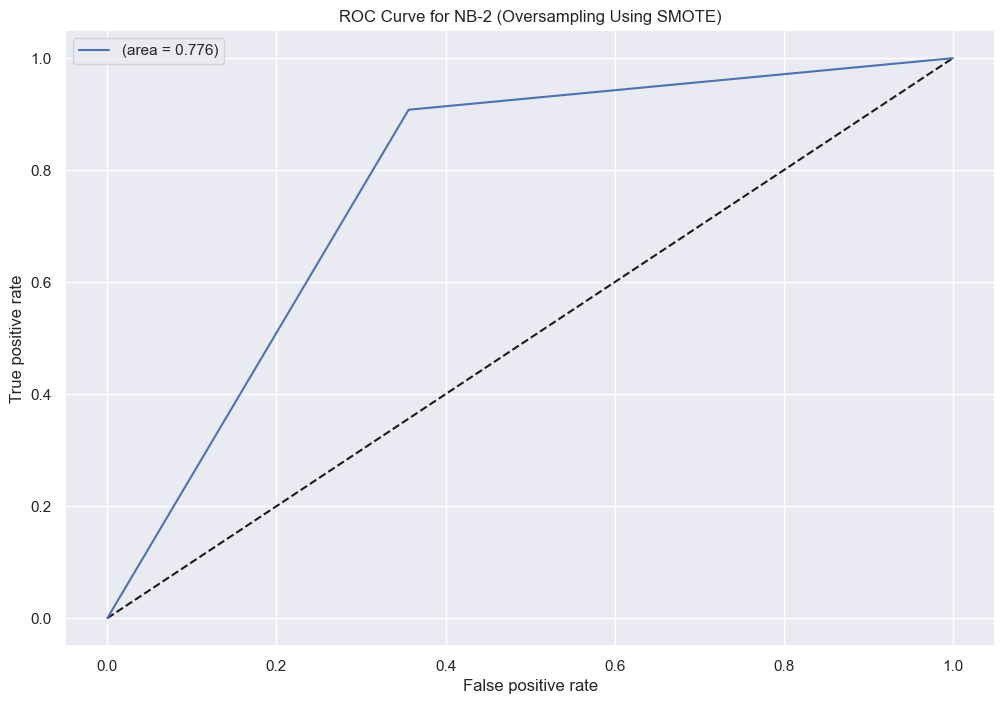

In [245]:
roc_nb_sm = plot_roc(y_test_sm, y_pred_nb_sm, "ROC Curve for NB-2 (Oversampling Using SMOTE)",(12, 8))

Hyper-parameter Tuning / Cross Validation

In [167]:
# Cross Validation
cv_results_nb_sm = skfolds_results(X_train_sm, y_train_sm)

Average Accuracy after K-Fold CV: 0.731
Average Precision after K-Fold CV: 0.688
Average Recall after K-Fold CV: 0.877
Average F1 Score after K-Fold CV: 0.771


##### Summary of Model NB-2: Naïve Bayes Model (Oversampling Using SMOTE)

<u>**Interpretation of Naïve Bayes Model NB-2**</u>
1. **Overall Performance Metrics**
    - Accuracy: The model achieves an accuracy of **76.7%**, indicating that it correctly predicts the class for the majority of instances.
    - Precision: With a precision of **79.6%**, the model has a strong ability to correctly identify positive cases out of all predicted positive instances.
    - Recall: The model demonstrates a recall of **76.7%**, indicating its effectiveness in capturing actual positive instances out of all true positive cases.
    - F1 Score: The F1 score of **76.4%** signifies a balanced measure of precision and recall, reflecting the model's overall effectiveness.
2. **Classification Report**
    - The classification report reveals a lower precision (**69%**) for class 1 (loan approved) compared to class 0 (loan rejected), indicating that the model struggles to accurately identify positive instances.
    - The recall for class 1 is notably higher (**91%**) compared to class 0 (**64%**), suggesting that the model excels in identifying positive instances.
    - The F1 score for class 1 is slightly higher (**78%**) compared to class 0 (**75%**), indicating better performance in correctly classifying positive instances.
3. **Confusion Matrix**
    - The confusion matrix depicts a relatively higher number of false positives (**31 instances**) compared to false negatives (**7 instances**), indicating a tendency of the model to misclassify negative instances as positive.
    - The true positives (**69 instances**) outnumber the true negatives (**56 instances**), reflecting the class imbalance in the dataset.
4. **ROC Curve**
    - The ROC curve illustrates the model's discrimination ability, with an AUC of **0.776**. While this indicates a moderate level of discrimination, there is still room for improvement.
5. **Performance After Stratified K-Fold Cross-Validation**
    - After applying Stratified K-Fold cross-validation with 5 folds, the model's performance improves across all metrics:
        - The average accuracy decreases slightly to **73.1%** after cross-validation.
        - The average precision decreases to **68.8%**, indicating slightly lower performance in correctly identifying positive cases.
        - The average recall substantially increases to **87.7%**, indicating improved sensitivity in capturing positive instances.
        - The average F1 score remains relatively stable at **77.1%**, reflecting a balanced measure of precision and recall after cross-validation.

Overall, the Naive Bayes model NB-2 demonstrates promising performance in predicting loan status after oversampling with SMOTE, with notable improvements observed after applying cross-validation techniques to enhance generalization and robustness. However, there is still room for further optimization, particularly in reducing false positive predictions and enhancing discrimination ability.

#### Conclusion for Naïve Bayes 

<u>**Comparative Analysis of Naïve Bayes Models (NB-1 vs NB-2):**</u>
1. **Overall Performance Metrics**
    - Accuracy: NB-1 achieves a slightly higher accuracy (**81.7%**) compared to NB-2 (**76.7%**).
    - Precision: NB-1 exhibits higher precision (**84%%**) compared to NB-2 (**79.6%**).
    - Recall: NB-2 demonstrates higher recall (**76.7%**) compared to NB-1 (**76.7%**).
    - F1 Score: NB-1 has marginally higher F1 score (**79.3%**) compared to NB-2 (**76.4%**).
2. **Classification Report**
    - NB-1 generally exhibits better precision and F1 score across both classes compared to NB-2.
    - NB-2, however, demonstrates higher recall for positive cases compared to NB-1.
3. **Confusion Matrix**
    - NB-1 and NB-2 both exhibits a similar pattern in misclassification, with a higher number of false positive compared to false negative.
4. **ROC Curve**
    - Both models have comparable AUC scores, indicating similar discrimination abilities.
5. **Performance After Stratified K-Fold Cross Validation**
    - NB-1 demonstrates a higher average accuracy and precision after cross-validation compared to NB-2.
    - NB-2, however, shows a substantial increase in average recall after cross-validation.

<u>**Conclusion**</u>

Based on the comparative analysis, NB-1 performs slightly better overall in terms of accuracy, precision, and F1 score. However, NB-2 exhibits higher recall, particularly for positive cases. Therefore, the choice between NB-1 and NB-2 can be depending in the specific requirements and priorities of the loan status prediction task.

#### Logistic Regression

Function for `LogisticRegression` Coefficient Analysis

In [168]:
from sklearn.linear_model import LogisticRegression

def lr_feature_imp(X_train, y_train, title):
    model_lr = LogisticRegression()
    model_lr.fit(X_train, y_train)

    coef = model_lr.coef_[0]

    feat_imp_df = pd.DataFrame({'Features': X_train.columns, 'Importance': np.abs(coef)})
    feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False)
    
    # Get the list of Importance Score for Credit_History_1, Credit_History_0, ApplicantIncome_win_norm, and LoanAmount_win_norm
    prior_lst = ['Credit_History_1', 'Credit_History_0', 'ApplicantIncome_win_norm', 'LoanAmount_win_norm']
    imp_score = feat_imp_df[feat_imp_df['Features'].isin(prior_lst)]
    imp_score_dict = imp_score.set_index('Features')['Importance'].to_dict()

    min_imp = min(imp_score_dict.values())
    
    for key, value in imp_score_dict.items():
        if value == min_imp:
            min_feat = key

    selected_feat = feat_imp_df[feat_imp_df['Importance'] >= min_imp]['Features'].tolist()

    print(f"Among all the top priority features, {min_feat} has the lowest importance score, with only {round(min_imp,2)}.")
    print(f"\nList of Selected Features ({len(selected_feat)}):\n{selected_feat}\n")

    # Visualize the feature importance
    fig = plt.figure(1, figsize=(12,8))
    sns.barplot(y=feat_imp_df['Features'], x= feat_imp_df['Importance'])

    plt.title(title)
    plt.ylabel("")

    plt.tight_layout()
    plt.show()

    return selected_feat

Function for Feature Ranking with Recursive Feature Elimination (RFE)

In [169]:
from sklearn.feature_selection import RFE

def lr_rfe_feature_rank(X_train, y_train, no_of_features):
  rfe = RFE(LogisticRegression(), n_features_to_select=no_of_features, step=1)
  rfe = rfe.fit(X_train, y_train.ravel())
  selected_col = X_train.columns[rfe.support_].tolist()
  print(rfe.support_, end="\n\n")
  print(rfe.ranking_, end="\n\n")
  print(selected_col)

  rfe_df = pd.DataFrame({"Features": X_train.columns, "Rank": rfe.ranking_}).sort_values(by="Rank")

  return selected_col

Function for Logistic Regression Modeling

In [170]:
def build_lr_model(X_train, X_test, y_train):
  lr = LogisticRegression()
  lr.fit(X_train, y_train)

  y_pred = lr.predict(X_test)

  # Print the hyper-parameter for LR model
  print(lr.get_params())

  return y_pred

##### Feature Importance Analysis (Original Data)

Feature Importance Analysis shall be conducted on the original dataset prior to the model construction. The primary objectives are: to optimize computational efficiency and to mitigate the risk of overfitting by identifying and eliminating the least influential features.

<u>**Methodology**</u>

Two distinct methodologies are employed for feature importance analysis: LogisticRegression() Coefficient Analysis and recursive feature elimination (RFE). The process of conducting feature importance analysis is as follows:
1. **LogisticRegression() Coefficient Analysis**: Initially, the significant of each feature is studied using the coefficient derived from LogisticRegression(). This step enables us to gauge the importance of individual features based on their contribution to the model.
2. **Recursive Feature Elimination (RFE)**: Subsequently, the determined number of important features obtained from LogisticRegression() serves as input for the RFE class in sklearn. Through RFE, we iteratively rank and select the most influential features, further refining the feature subset.
3. **Feature Subset Selection**: Features identified as crucial through both LogisticRegression() and RFE are consolidated. This subset, representing the overlapping features, is then extracted from the original dataset. The resultant reduction in feature dimensionality optimizes the dataset for subsequent logistic regression modeling stages.

`LogisticRegression()` Coefficient Analysis

The feature selection should be based on the following criteria:
1. `Credit_History`, `ApplicantIncome_win_norm`, and `LoanAmount_win_norm` shall be included in the list of selected features.
2. Any features that has coefficient in between these three features shall be included in the list of selected features.

Among all the top priority features, ApplicantIncome_win_norm has the lowest importance score, with only 0.1.

List of Selected Features (22):
['Credit_History_1', 'Credit_History_0', 'CoapplicantIncome_bin_MT 5000', 'Loan_Amount_Term_bin_480', 'CoapplicantIncome_bin_BTW 2000 To 5000', 'Loan_Amount_Term_bin_300', 'Loan_Amount_Term_bin_LT 120', 'Loan_Amount_Term_bin_180', 'Loan_Amount_Term_bin_240', 'CoapplicantIncome_bin_LT 2000', 'Property_Area_Semiurban', 'CoapplicantIncome_bin_No Coapplicant', 'Dependents_1', 'LoanAmount_win_norm', 'Dependents_2', 'Property_Area_Rural', 'Married_No', 'Married_Yes', 'Property_Area_Urban', 'Education_Graduate', 'Education_Not Graduate', 'ApplicantIncome_win_norm']



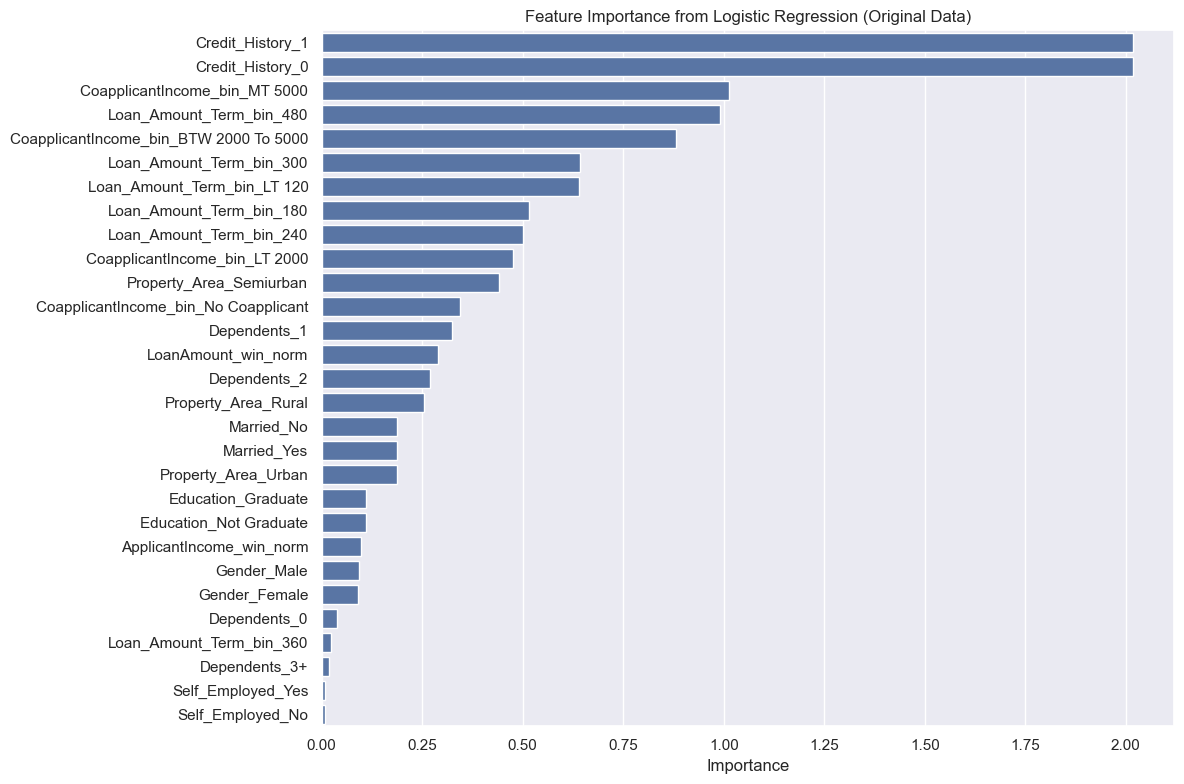

In [171]:
feat_imp_lr = lr_feature_imp(X_train, y_train, "Feature Importance from Logistic Regression (Original Data)")

**Recursive Feature Elimination (RFE)**

In [172]:
rfe_list_lr = lr_rfe_feature_rank(X_train, y_train, len(feat_imp_lr))

[False False False False False  True  True False  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True]

[3 8 4 7 5 1 1 6 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]

['Dependents_1', 'Dependents_2', 'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes', 'CoapplicantIncome_bin_BTW 2000 To 5000', 'CoapplicantIncome_bin_LT 2000', 'CoapplicantIncome_bin_MT 5000', 'CoapplicantIncome_bin_No Coapplicant', 'Loan_Amount_Term_bin_180', 'Loan_Amount_Term_bin_240', 'Loan_Amount_Term_bin_300', 'Loan_Amount_Term_bin_480', 'Loan_Amount_Term_bin_LT 120', 'Credit_History_0', 'Credit_History_1', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome_win_norm', 'LoanAmount_win_norm']


**Feature Subset Selection**

Combine Both Results from Feature Importance and RFE

In [173]:
feat_rank_lr = list(set(feat_imp_lr + rfe_list_lr))
feat_rank_lr

['Dependents_1',
 'Self_Employed_No',
 'CoapplicantIncome_bin_LT 2000',
 'Property_Area_Semiurban',
 'ApplicantIncome_win_norm',
 'Loan_Amount_Term_bin_180',
 'Loan_Amount_Term_bin_300',
 'Loan_Amount_Term_bin_LT 120',
 'Property_Area_Rural',
 'Loan_Amount_Term_bin_240',
 'Dependents_2',
 'Married_No',
 'Credit_History_1',
 'Married_Yes',
 'Property_Area_Urban',
 'LoanAmount_win_norm',
 'Loan_Amount_Term_bin_480',
 'CoapplicantIncome_bin_MT 5000',
 'Self_Employed_Yes',
 'Education_Graduate',
 'CoapplicantIncome_bin_BTW 2000 To 5000',
 'Credit_History_0',
 'Education_Not Graduate',
 'CoapplicantIncome_bin_No Coapplicant']

Subset X_train and X_test Based on Feature Importance Ranking (`feat_rank_lr`)

In [174]:
X_ranked_lr = X[feat_rank_lr]
X_train_ranked_lr = X_train[feat_rank_lr]
X_test_ranked_lr = X_test[feat_rank_lr]

# Inspect
print(X_ranked_lr.shape)
print(X_train_ranked_lr.shape)
print(X_test_ranked_lr.shape)

(381, 24)
(266, 24)
(115, 24)


##### Model LR-1: Logistic Regression Base Model (Original Data)

Initial Model Building & Performance Evaluation

In [175]:
y_pred_lr = build_lr_model(X_train_ranked_lr, X_test_ranked_lr, y_train)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Accuracy: 0.809
Precision: 0.834
Recall: 0.809
F1 Score: 0.781

-------------------------------------------------------------------

 Clasification Report:
               precision    recall  f1-score   support

           0       0.93      0.40      0.56        35
           1       0.79      0.99      0.88        80

    accuracy                           0.81       115
   macro avg       0.86      0.69      0.72       115
weighted avg       0.83      0.81      0.78       115


-------------------------------------------------------------------



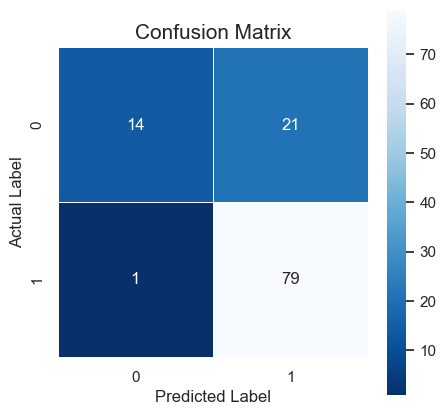

In [176]:
performance_lr = evaluation_metrics(y_test, y_pred_lr, "weighted")

ROC Curve

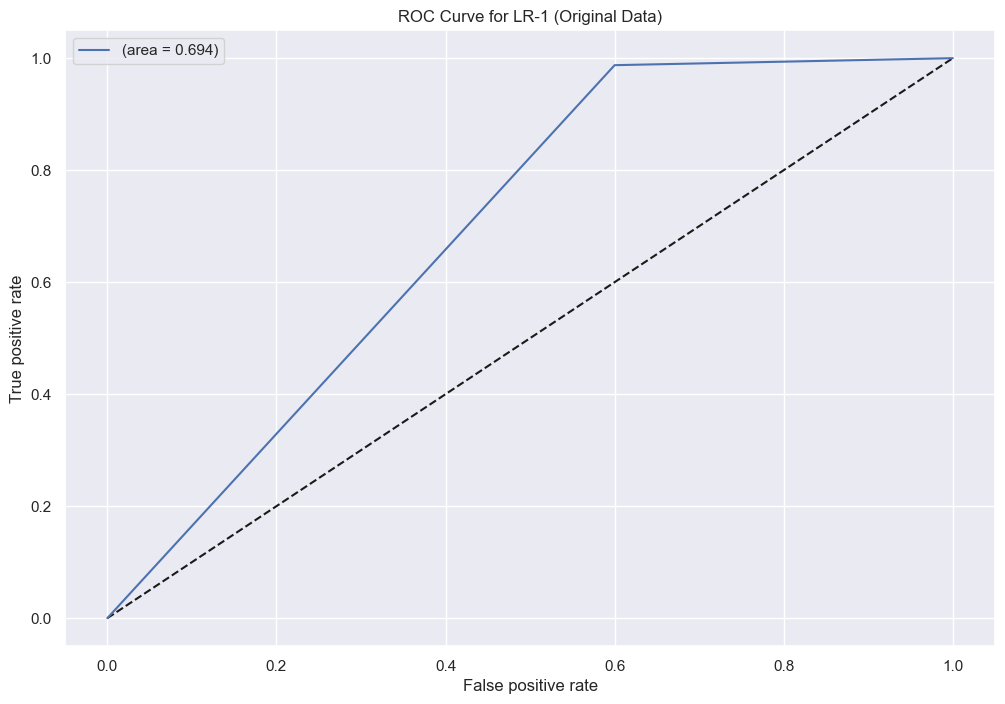

In [247]:
roc_lr = plot_roc(y_test, y_pred_lr, "ROC Curve for LR-1 (Original Data)",(12, 8))

##### Summary of Model LR-1: Logistic Regression Base Model (Original Data)

<u>**Interpretation of Logistic Regression Model LR-1**</u>
1. **Overall Performance Metrics**
    - Accuracy: LR-1 achieves an accuracy of **80.9%**, indicating that it correctly predicts the class for the majority of instances.
    - Precision: With a precision of **83.4%**, the model has a strong ability to correctly identify positive cases out of all predicted positive instances.
    - Recall: LR-1 demonstrates a recall of **80.9%**, indicating its effectiveness in capturing actual positive instances out of all true positive cases.
    - F1 Score: The F1 score of **78.1%** signifies a balanced measure of precision and recall, reflecting the model's overall effectiveness.
2. **Classification Report**
    - The classification report reveals a lower precision (**79%**) for class 1 (loan approved) compared to the class 0 (loan rejected).
    - The recall for class 1 is notably higher (**99%**) compared to class 0 (**40%**), suggesting that the model excels in identifying positive instances.
    - The F1 score for class 1 is substantially higher (**88%**) compared to class 0 (**56%**), indicating better performance in correctly classifying positive instances.
3. **Confusion Matrix**
    - The confusion matrix shows a relatively higher number of false positive (**21 instances**) compared to the false negative (**1 instance**), indicating a tendency of the model to misclassify negative instances as positive.
    - The true positive (**79 instances**) outnumber the true negatives (**17 instances**), reflecting the class imbalance in the dataset.
4. **ROC Curve**
    - The ROC curve illustrates the model's discrimination ability, with an AUC of 0.694. While this indicates a moderate level of discrimination, there is still room for improvement.

In summary, while LR-1 provides a reasonable baseline for loan status prediction, there is room for improvement in handling class imbalance, refining feature selection, and optimizing model parameters to enhance overall performance (Hyper-parameter Tuning).

##### Model LR-2: Logistic Regression Tuned Model (Hyperparameter Tuning of LR-1)

Initial Model Building & Performance Evaluation

In [178]:
from sklearn.model_selection import GridSearchCV

# Define estimator
model_lr = LogisticRegression(multi_class="ovr", max_iter=1000)

# Define dictionary containing the hyperparameters for tuning
parameters = {"C": np.arange(0.01, 100, 10), 
              "random_state": np.arange(0, 100, 10),
              "penalty": ["l1", "l2"],
              "solver": ["lbfgs", "liblinear", "newton-cholesky", "sag"],
              "class_weight": [None, "balanced"]}

# Build Grid Search with Cross-Validation and Accuracy Score
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=parameters, scoring="accuracy", cv=5, n_jobs=-1)
grid_search_lr.fit(X_train_ranked_lr, y_train)

# Get the best parameters
lr_best_parameters = grid_search_lr.best_params_
lr_best_score = grid_search_lr.best_score_
lr_best_estimator = grid_search_lr.best_estimator_

c:\Users\WeiZhenLim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\WeiZhenLim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\WeiZhenLim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\WeiZhenLim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
 

In [179]:
# Check Best Parameters
print(lr_best_parameters)
print(lr_best_score)
print(lr_best_estimator)

{'C': 10.01, 'class_weight': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs'}
0.8608665269042628
LogisticRegression(C=10.01, max_iter=1000, multi_class='ovr', random_state=0)


Final Model with Best Estimator

{'C': 10.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy: 0.826
Precision: 0.838
Recall: 0.826
F1 Score: 0.808

-------------------------------------------------------------------

 Clasification Report:
               precision    recall  f1-score   support

           0       0.89      0.49      0.63        35
           1       0.81      0.97      0.89        80

    accuracy                           0.83       115
   macro avg       0.85      0.73      0.76       115
weighted avg       0.84      0.83      0.81       115


-------------------------------------------------------------------



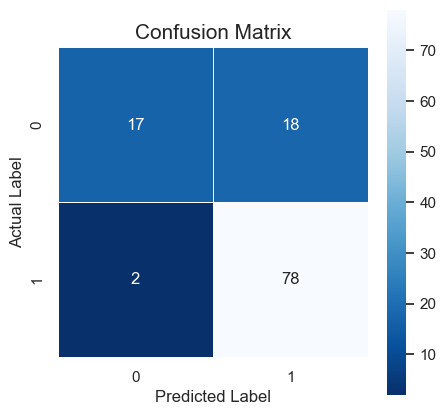

In [180]:
# Build the final model
final_model_lr = lr_best_estimator
print(final_model_lr.get_params())

# Predict
y_pred_lr_final = final_model_lr.predict(X_test_ranked_lr)

# Evaluate the model
performance_lr_final = evaluation_metrics(y_test, y_pred_lr_final, "weighted")

ROC Curve

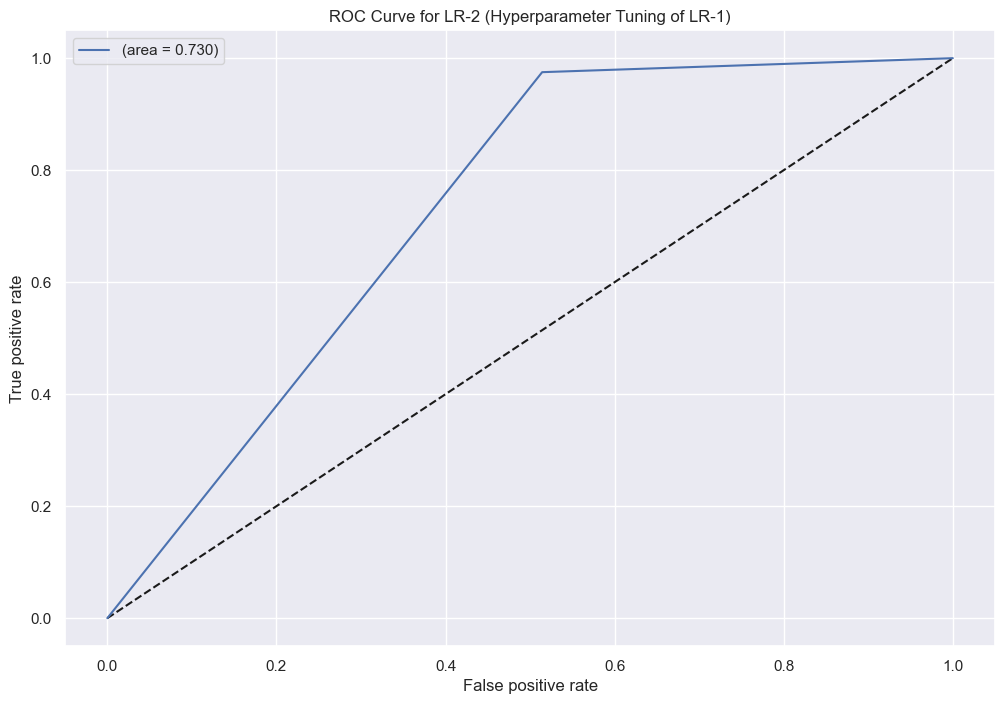

In [260]:
roc_lr_final = plot_roc(y_test, y_pred_lr_final, "ROC Curve for LR-2 (Hyperparameter Tuning of LR-1)", (12,8))

##### Summary of Model LR-2: Logistic Regression Tuned Model (Hyperparameter Tuning of LR-1)

<u>**Interpretation of Logistic Regression Model LR-2**</u>
1. **Overall Performance Metrics**
    - Accuracy: LR-2 achieves an accuracy of **82.6%**, indicating improved performance compared to LR-1.
    - Precision: With a precision of **83.8%**, the model maintains a strong ability to correctly identify positive cases out of all predicted positive instances.
    - Recall: LR-2 demonstrates a recall of **82.6%**, indicating its effectiveness in capturing actual positive instances out of all true positive cases.
    - F1 Score: The F1 score of **80.8%** signifies a balanced measure of precision and recall, reflecting the model's improved overall effectiveness compared to LR-1.
2. **Classification Report**
    - The classification report reveals an improvement in precision for both classes compared to LR-1.
    - The recall for class 1 remains high (**97%**), suggesting that the model continues to excel in identifying positive instances.
    - However, the recall for class 0 sees a slight decrease compared to LR-1.
3. **Confusion Matrix**
    - The confusion matrix depicts a decreased number of false positives (**18 instances**) compared to LR-1, indicating an improvement in classifying negative instances.
    - The true positives (**78 instances**) outnumber the true negatives (**17 instances**), reflecting the class imbalance in the dataset.
4. **ROC Curve**
    - The ROC curve illustrates a moderate improvement in the model's discrimination ability, with an AUC of 0.730 compared to LR-1.

<u>**Comparison to LR-1:**</u>
- LR-2 exhibits overall improved performance metrics compared to LR-1, including higher accuracy, precision, recall, and F1 score.
- LR-2 demonstrates enhanced precision and recall for both classes, indicating better predictive capability across the board.
- The confusion matrix shows a reduction in false positives, suggesting improved classification of negative instances by LR-2.
- However, LR-2's recall for class 0 experiences a slight decrease compared to LR-1, indicating potential trade-offs in performance metrics.

In conclusion, Logistic Regression Model LR-2, with hyper-parameter tuning conducted on LR-1, demonstrates notable improvements in performance metrics, including accuracy, precision, recall, and F1 score. While achieving enhanced discriminative ability and better classification of negative instances, LR-2 maintains high precision and recall for positive cases. Overall, LR-2 outperforms LR-1, reflecting the efficacy of hyper-parameter tuning in optimizing model performance for loan status prediction.

##### Feature Importance Analysis (Oversampling Using SMOTE)

The methodology used in this section is similar to the `Feature Importance Analysis (Original Data)` section.

`LogisticRegression()` Coefficient Analysis

The feature selection should be based on the following criteria:
1. `Credit_History`, `ApplicantIncome_win_norm`, and `LoanAmount_win_norm` shall be included in the list of selected features.
2. Any features that has coefficient in between these three features shall be included in the list of selected features.

Among all the top priority features, LoanAmount_win_norm has the lowest importance score, with only 0.0.

List of Selected Features (29):
['Credit_History_0', 'Credit_History_1', 'Loan_Amount_Term_bin_480', 'CoapplicantIncome_bin_MT 5000', 'CoapplicantIncome_bin_BTW 2000 To 5000', 'Property_Area_Semiurban', 'Property_Area_Rural', 'Loan_Amount_Term_bin_180', 'Dependents_1', 'Loan_Amount_Term_bin_240', 'CoapplicantIncome_bin_LT 2000', 'CoapplicantIncome_bin_No Coapplicant', 'Dependents_2', 'Education_Not Graduate', 'Education_Graduate', 'Loan_Amount_Term_bin_LT 120', 'Dependents_0', 'Dependents_3+', 'Loan_Amount_Term_bin_300', 'Gender_Male', 'Gender_Female', 'Self_Employed_No', 'Self_Employed_Yes', 'ApplicantIncome_win_norm', 'Loan_Amount_Term_bin_360', 'Married_No', 'Married_Yes', 'Property_Area_Urban', 'LoanAmount_win_norm']



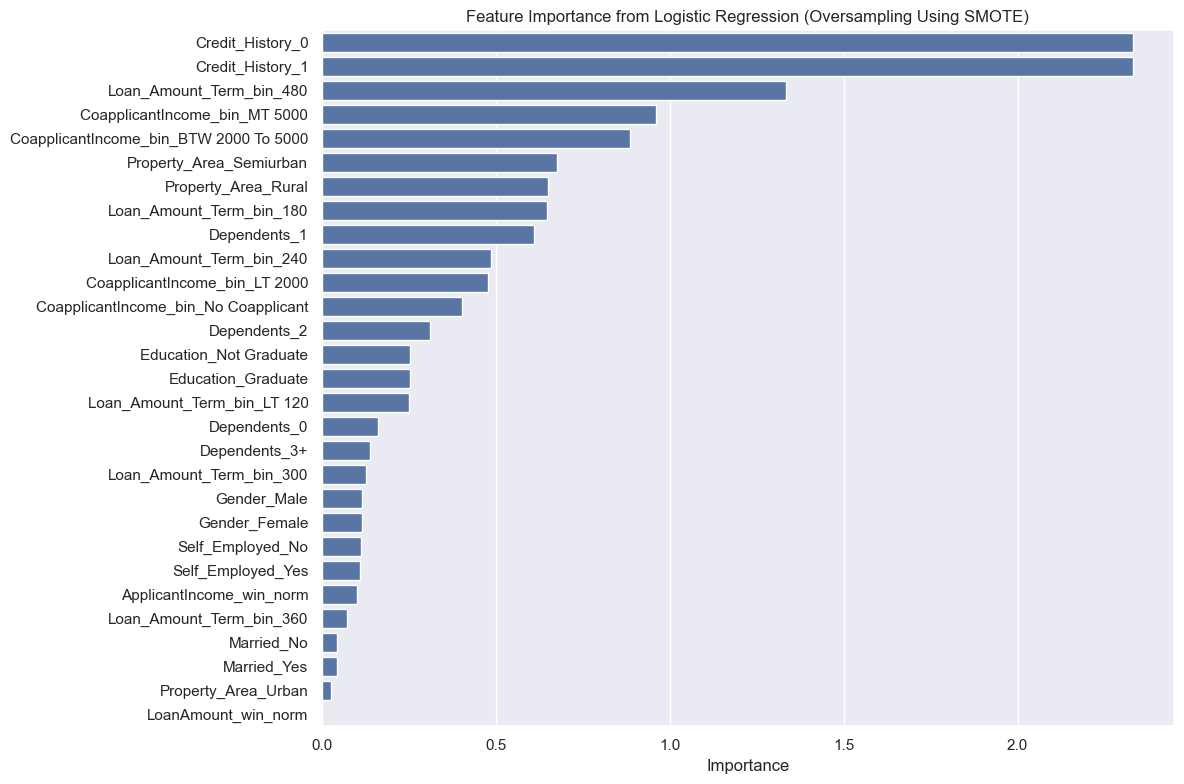

In [182]:
feat_imp_lr_sm = lr_feature_imp(X_train_sm, y_train_sm, "Feature Importance from Logistic Regression (Oversampling Using SMOTE)")

**Recursive Feature Elimination (RFE)**

In [183]:
rfe_list_lr_sm = lr_rfe_feature_rank(X_train_sm, y_train_sm, len(feat_imp_lr_sm))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes', 'CoapplicantIncome_bin_BTW 2000 To 5000', 'CoapplicantIncome_bin_LT 2000', 'CoapplicantIncome_bin_MT 5000', 'CoapplicantIncome_bin_No Coapplicant', 'Loan_Amount_Term_bin_180', 'Loan_Amount_Term_bin_240', 'Loan_Amount_Term_bin_300', 'Loan_Amount_Term_bin_360', 'Loan_Amount_Term_bin_480', 'Loan_Amount_Term_bin_LT 120', 'Credit_History_0', 'Credit_History_1', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome_win_norm', 'LoanAmount_win_norm']


**Feature Subset Selection**

Combine Both Results from Feature Importance and RFE

In [184]:
feat_rank_lr_sm = list(set(feat_imp_lr_sm + rfe_list_lr_sm))
feat_rank_lr_sm

['Dependents_1',
 'Self_Employed_No',
 'Dependents_0',
 'Property_Area_Semiurban',
 'CoapplicantIncome_bin_LT 2000',
 'ApplicantIncome_win_norm',
 'Loan_Amount_Term_bin_180',
 'Loan_Amount_Term_bin_LT 120',
 'Loan_Amount_Term_bin_300',
 'Property_Area_Rural',
 'Gender_Male',
 'Loan_Amount_Term_bin_240',
 'Dependents_2',
 'Married_No',
 'Dependents_3+',
 'Credit_History_1',
 'Gender_Female',
 'Married_Yes',
 'Property_Area_Urban',
 'Self_Employed_Yes',
 'CoapplicantIncome_bin_MT 5000',
 'Loan_Amount_Term_bin_480',
 'Loan_Amount_Term_bin_360',
 'LoanAmount_win_norm',
 'Education_Graduate',
 'CoapplicantIncome_bin_BTW 2000 To 5000',
 'Credit_History_0',
 'Education_Not Graduate',
 'CoapplicantIncome_bin_No Coapplicant']

Subset X_train_sm and X_test_sm Based on Feature Importance Ranking (`feat_rank_lr_sm`)

In [185]:
X_ranked_lr_sm = X_sm[feat_rank_lr_sm]
X_train_ranked_lr_sm = X_train_sm[feat_rank_lr_sm]
X_test_ranked_lr_sm = X_test_sm[feat_rank_lr_sm]

# Inspect
print(X_ranked_lr_sm.shape)
print(X_train_ranked_lr_sm.shape)
print(X_test_ranked_lr_sm.shape)

(542, 29)
(379, 29)
(163, 29)


##### Model LR-3: Logistic Regression Base Model (Oversampling Using SMOTE)

Initial Model Building & Performance Evaluation

In [186]:
y_pred_lr_sm = build_lr_model(X_train_ranked_lr_sm, X_test_ranked_lr_sm, y_train_sm)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Accuracy: 0.785
Precision: 0.798
Recall: 0.785
F1 Score: 0.785

-------------------------------------------------------------------

 Clasification Report:
               precision    recall  f1-score   support

           0       0.86      0.71      0.78        87
           1       0.73      0.87      0.79        76

    accuracy                           0.79       163
   macro avg       0.79      0.79      0.79       163
weighted avg       0.80      0.79      0.78       163


-------------------------------------------------------------------



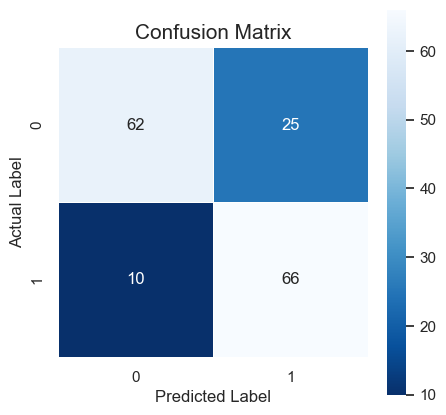

In [187]:
performance_lr_sm = evaluation_metrics(y_test_sm, y_pred_lr_sm, "weighted")

ROC Curve

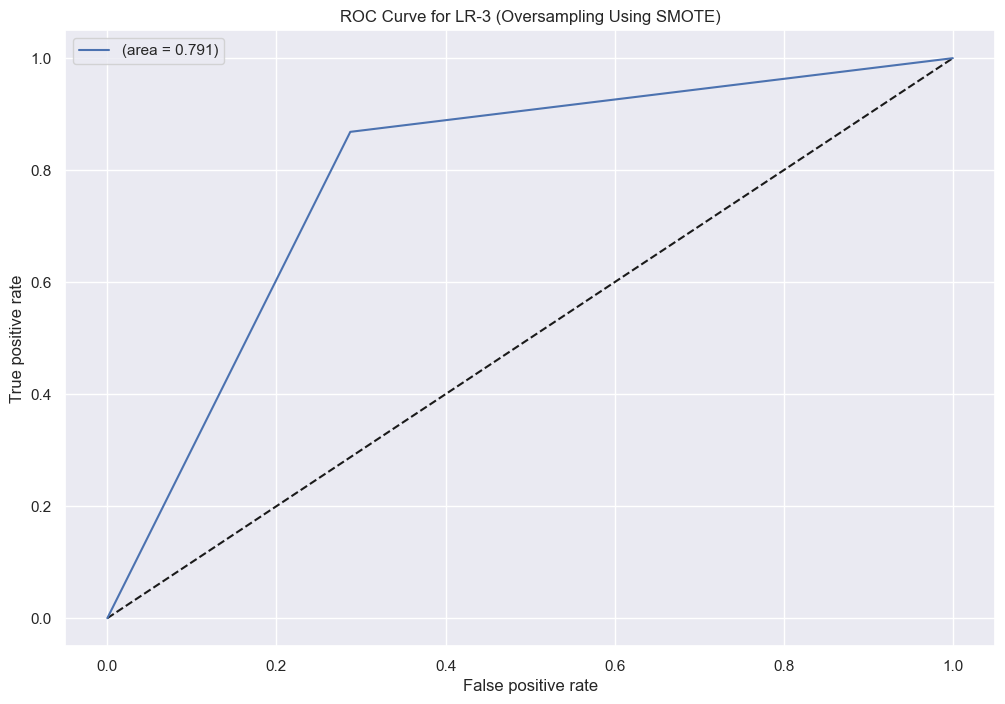

In [249]:
roc_lr_sm = plot_roc(y_test_sm, y_pred_lr_sm, "ROC Curve for LR-3 (Oversampling Using SMOTE)", (12, 8))

##### Summary of Model LR-3: Logistic Regression Base Model (Oversampling Using SMOTE) 

<u>**Interpretation of Logistic Regression Model LR-3**</u>

1. **Overall Performance Metrics**
    - Accuracy: LR-3 achieves an accuracy of 78.5%, indicating its ability to correctly classify instances from both classes.
    - Precision: With a precision of 79.8%, the model demonstrates a strong ability to correctly identify positive cases out of all predicted positive instances.
    - Recall: LR-3 exhibits a recall of 78.5%, indicating its effectiveness in capturing actual positive instances out of all true positive cases.
    - F1 Score: The F1 score of 78.5% signifies a balanced measure of precision and recall, reflecting the model's overall effectiveness.
2. **Classification Report**
    - The classification report reveals that the models exhibits strong precision (**86%**) for class 0 (loan rejected) but slightly lower precision (**73%**) for class 1, while demonstrating robust recall for both classes.
    - Both classes demonstrate comparable F1 scores, suggesting consistent predictive capability across the board.
3. **Confusion Matrix**
    - The confusion matrix depicts a relatively higher number of false positives (**25 instances**) compared to false negatives (**10 instances**), indicating a tendency of the model to misclassify negative instances as positive.
    - The true positives (**66 instances**) outnumber the true negatives (**62 instances**), reflecting the class imbalance in the dataset.
4. **ROC Curve**
    - The ROC curve illustrates the model's discrimination ability, with an AUC of **0.791**, indicating a moderate level of discrimination.

<u>**Comparison to LR-1**</u>
- LR-3 exhibits comparable overall performance metrics to LR-1, including accuracy, precision, recall, and F1 score.
- While LR-3 maintains balanced precision and recall for both classes, LR-1 demonstrates slightly higher precision and recall for positive cases.
- LR-3 shows a similar tendency to LR-1 in misclassifying negative instances as positive, as indicated by a higher number of false positives compared to false negatives.

In conclusion, Logistic Regression Model LR-3, trained using oversampled data with SMOTE, demonstrates balanced performance in predicting loan status. While achieving comparable accuracy, precision, recall, and F1 score to LR-1, LR-3 exhibits consistent predictive capability across both classes. However, LR-3 shows a similar tendency to misclassify negative instances as positive, highlighting potential areas for improvement in handling class imbalance and optimizing model performance. Overall, LR-3 offers a viable alternative approach to LR-1 for loan status prediction.

##### Model LR-4: Logistic Regression Tuned Model (Hyperparameter Tuning of LR-3)

Initial Model Building & Performance Evaluation

In [189]:
from sklearn.model_selection import GridSearchCV

# Define estimator
model_lr_sm = LogisticRegression(multi_class="ovr", max_iter=1000)

# Define dictionary containing the hyperparameters for tuning
parameters = {"C": np.arange(0.01, 100, 10), 
              "random_state": np.arange(0, 100, 10),
              "penalty": ["l1", "l2"],
              "solver": ["lbfgs", "liblinear", "newton-cholesky", "sag"],
              "class_weight": [None, "balanced"]}

# Build Grid Search with Cross-Validation and Accuracy Score
grid_search_lr_sm = GridSearchCV(estimator=model_lr_sm, param_grid=parameters, scoring="accuracy", cv=5, n_jobs=-1)
grid_search_lr_sm.fit(X_train_ranked_lr_sm, y_train_sm)

# Get the best parameters
lr_best_parameters_sm = grid_search_lr_sm.best_params_
lr_best_score_sm = grid_search_lr_sm.best_score_
lr_best_estimator_sm = grid_search_lr_sm.best_estimator_

c:\Users\WeiZhenLim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\WeiZhenLim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\WeiZhenLim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\WeiZhenLim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
 

In [190]:
# Check Best Parameters
print(lr_best_parameters_sm)
print(lr_best_score_sm)
print(lr_best_estimator_sm)

{'C': 10.01, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs'}
0.7545964912280702
LogisticRegression(C=10.01, class_weight='balanced', max_iter=1000,
                   multi_class='ovr', random_state=0)


Final Model with Best Estimator

{'C': 10.01, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy: 0.798
Precision: 0.805
Recall: 0.798
F1 Score: 0.798

-------------------------------------------------------------------

 Clasification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        87
           1       0.75      0.86      0.80        76

    accuracy                           0.80       163
   macro avg       0.80      0.80      0.80       163
weighted avg       0.80      0.80      0.80       163


-------------------------------------------------------------------



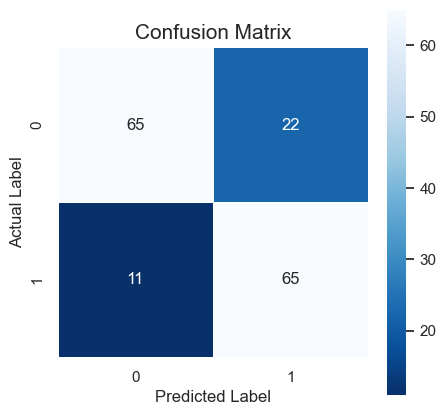

In [191]:
# Build the final model
final_model_lr_sm = lr_best_estimator_sm
print(final_model_lr_sm.get_params())

# Predict
y_pred_lr_final_sm = final_model_lr_sm.predict(X_test_ranked_lr_sm)

# Evaluate the model
performance_lr_final_sm = evaluation_metrics(y_test_sm, y_pred_lr_final_sm, "weighted")

ROC Curve

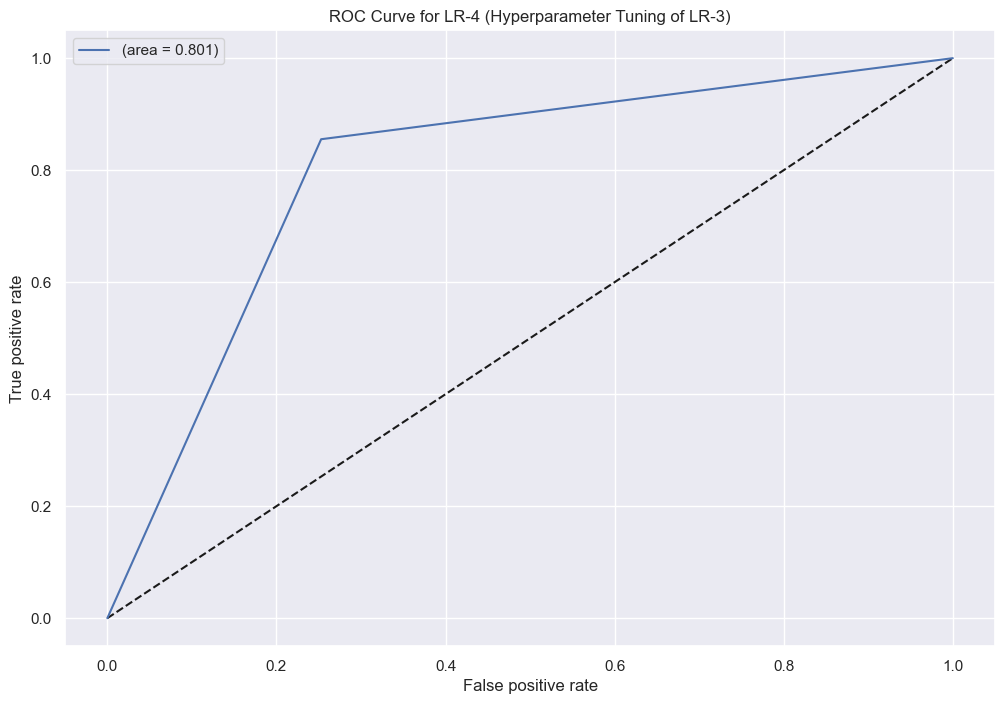

In [261]:
roc_lr_final_sm = plot_roc(y_test_sm, y_pred_lr_final_sm, "ROC Curve for LR-4 (Hyperparameter Tuning of LR-3)", (12, 8))

##### Summary of Model LR-4: Logistic Regression Tuned Model (Hyperparameter Tuning of LR-3)

<u>**Interpretation of Logistic Regression Model LR-4**</u>

1. **Overall Performance Metrics:**
   - Accuracy: LR-4 achieves an accuracy of **79.8%**, indicating its ability to correctly classify instances from both classes.
   - Precision: With a precision of **80.5%**, the model demonstrates a strong ability to correctly identify positive cases out of all predicted positive instances.
   - Recall: LR-4 exhibits a recall of **79.8%**, indicating its effectiveness in capturing actual positive instances out of all true positive cases.
   - F1 Score: The F1 score of **79.8%** signifies a balanced measure of precision and recall, reflecting the model's overall effectiveness.

2. **Classification Report Analysis:**
   - The classification report reveals balanced precision and recall for both classes, indicating consistent performance in predicting positive and negative instances.
   - Both classes demonstrate comparable F1 scores, suggesting consistent predictive capability across the board.

3. **Confusion Matrix Analysis:**
   - The confusion matrix reveals a similar pattern to LR-3, with a relatively higher number of false positives (**22 instances**) compared to false negatives (**11 instances**), indicating a tendency of the model to misclassify negative instances as positive.
   - The true positives (**65 instances**) and true negatives (**65 instances**) demonstrate balanced classification performance.

4. **ROC Curve Analysis:**
   - The ROC curve illustrates the model's discrimination ability, with an AUC of **0.801**, indicating a moderate level of discrimination.

**Comparison to LR-3:**
- LR-4 exhibits similar overall performance metrics to LR-3, including accuracy, precision, recall, and F1 score.
- Both models demonstrate balanced precision and recall for both classes, indicating consistent predictive capability.
- However, LR-4 achieves a slightly higher AUC compared to LR-3, indicating a marginally improved discrimination ability.

In conclusion, Logistic Regression Model LR-4, with hyper-parameter tuning conducted on LR-3, demonstrates consistent performance in predicting loan status. While achieving comparable accuracy, precision, recall, and F1 score to LR-3, LR-4 exhibits a slightly improved discrimination ability. However, both models show a similar tendency to misclassify negative instances as positive, suggesting potential areas for improvement in handling class imbalance and optimizing model performance. Overall, LR-4 offers a refined approach to LR-3, with marginal enhancements in discrimination ability.

#### Conclusion for Logistic Regression

<u>**Comparative Analysis of Logistic Regression Models:**</u>

1. **LR-1: Logistic Regression Base Model (Original Data)**
   - Achieves an accuracy of **80.9%**, with precision, recall, and F1 score of **83.4%**, **80.9%**, and **78.1%** respectively.
   - Demonstrates moderate discrimination ability with an AUC of **0.694**.

2. **LR-2: Logistic Regression Tuned Model (Hyperparameter Tuning of LR-1)**
   - Shows improved performance over LR-1, with an accuracy of **82.6%**, precision, recall, and F1 score of **83.8%**, **82.6%**, and **80.8%** respectively.
   - Slightly enhances discrimination ability with an AUC of **0.730**.

3. **LR-3: Logistic Regression Base Model (Oversampled Data with SMOTE)**
   - Achieves an accuracy of **78.5%**, with precision, recall, and F1 score of **79.8%**, **78.5%**, and **78.5%** respectively.
   - Demonstrates moderate discrimination ability with an AUC of **0.791**.

4. **LR-4: Logistic Regression Tuned Model (Hyperparameter Tuning of LR-3)**
   - Shows similar performance to LR-3, with an accuracy of **79.8%**, precision, recall, and F1 score of **80.5%**, **79.8%**, and **79.8%** respectively.
   - Slightly enhances discrimination ability with an AUC of **0.801**.

<u>**Performance Comparison:**</u>
- LR-2 and LR-4 exhibit slightly higher accuracy and discrimination ability compared to LR-1 and LR-3.
- LR-2 and LR-4 demonstrate improved precision, recall, and F1 score compared to LR-1 and LR-3, indicating better predictive capability.
- LR-1 and LR-3 show similar performance, indicating that hyperparameter tuning (as in LR-2 and LR-4) contributes to performance improvements.

<u>**Conclusion:**</u>
- LR-2 and LR-4 demonstrate the best performance among the models, with slightly higher accuracy, precision, recall, and F1 score compared to LR-1 and LR-3.
- Hyperparameter tuning significantly contributes to performance improvements in LR-2 and LR-4.
- However, all models show potential for further improvement, particularly in handling class imbalance and refining feature selection techniques. Continued experimentation and optimization are recommended to enhance model performance for loan status prediction.

#### Random Forest

Function for `RandomForestClassifier` Importance Score Analysis

In [193]:
from sklearn.ensemble import RandomForestClassifier

def rf_feature_imp(X_train, y_train, title):
    model_rf = RandomForestClassifier()
    model_rf.fit(X_train, y_train)

    imp = model_rf.feature_importances_

    feat_imp_df = pd.DataFrame(imp, index=X_train.columns).reset_index()
    feat_imp_df.columns = ['Features', 'Importance']
    feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False)
    
    # Get the list of Importance Score for Credit_History_1, Credit_History_0, ApplicantIncome_win_norm, and LoanAmount_win_norm
    prior_list = ['Credit_History_1', 'Credit_History_0', 'ApplicantIncome_win_norm', 'LoanAmount_win_norm']
    imp_score = feat_imp_df[feat_imp_df['Features'].isin(prior_list)]
    imp_score_dict = imp_score.set_index('Features')['Importance'].to_dict()

    min_imp = min(imp_score_dict.values())

    for key,value in imp_score_dict.items():
        if value == min_imp:
            min_feat = key

    selected_feat = feat_imp_df[feat_imp_df['Importance'] >= min_imp]['Features'].tolist()

    print(f"Among all the top priority features, {min_feat} has the lowest importance score, with only {round(min_imp,2)}.")
    print(f"\nList of Selected Features Based on Threshold ({len(selected_feat)}):\n{selected_feat}\n")

    # Visualize the feature importance
    fig = plt.figure(1, figsize=(12,8))
    sns.barplot(y=feat_imp_df['Features'], x= feat_imp_df['Importance'])

    plt.title(title)
    plt.ylabel("")

    plt.tight_layout()
    plt.show()

    return selected_feat

Function for Recursive Feature Elimination (RFE) with Random Forest

In [194]:
def rf_rfe_feature_rank(X_train, y_train, no_of_features):
  
  rfe = RFE(RandomForestClassifier(), n_features_to_select=no_of_features, step=1)
  rfe = rfe.fit(X_train, y_train.ravel())
  selected_col = X_train.columns[rfe.support_].tolist()
  print(rfe.support_, end="\n\n")
  print(rfe.ranking_, end="\n\n")
  print(selected_col)

  rfe_df = pd.DataFrame({"Features": X_train.columns, "Rank": rfe.ranking_}).sort_values(by="Rank")

  return selected_col

Functions for Random Forest Modeling

In [195]:
def build_rf_model(X_train, X_test, y_train):

    rf_model = RandomForestClassifier()

    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)

    print(rf_model.get_params())

    return y_pred

##### Feature Importance Analysis (Original Data)

Feature Importance Analysis shall be conducted on the original dataset prior to the model construction. The primary objectives are: to optimize computational efficiency and to mitigate the risk of overfitting by identifying and eliminating the least influential features.

<u>**Methodology**</u>

Two distinct methodologies are employed for feature importance analysis: RandomForestClassifier() Importance Score Analysis and recursive feature elimination (RFE). The process of conducting feature importance analysis is as follows:
1. **RandomForestClassifier() Coefficient Analysis**: Initially, the significant of each feature is studied using the coefficient derived from RandomForestClassifier(). This step enables us to gauge the importance of individual features based on their contribution to the model.
2. **Recursive Feature Elimination (RFE)**: Subsequently, the determined number of important features obtained from RandomForestClassifier() serves as input for the RFE class in sklearn. Through RFE, we iteratively rank and select the most influential features, further refining the feature subset.
3. **Feature Subset Selection**: Features identified as crucial through both RandomForestClassifier() and RFE are consolidated. This subset, representing the overlapping features, is then extracted from the original dataset. The resultant reduction in feature dimensionality optimizes the dataset for subsequent logistic regression modeling stages.

`RandomForestClassifier()` Importance Score Analysis

The feature selection should be based on the following criteria:
1. `Credit_History`, `ApplicantIncome_win_norm`, and `LoanAmount_win_norm` shall be included in the list of selected features.
2. Any features that has coefficient in between these three features shall be included in the list of selected features.

Among all the top priority features, LoanAmount_win_norm has the lowest importance score, with only 0.13.

List of Selected Features Based on Threshold (4):
['Credit_History_1', 'Credit_History_0', 'ApplicantIncome_win_norm', 'LoanAmount_win_norm']



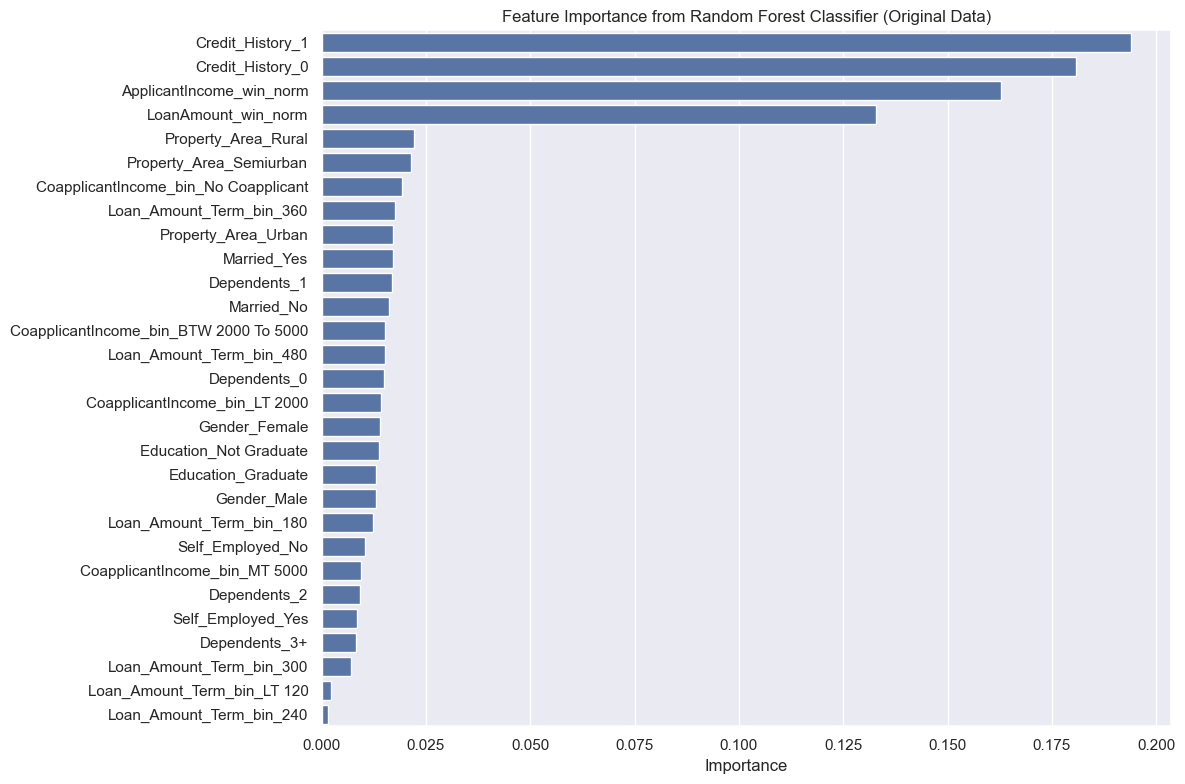

In [196]:
feat_imp_rf = rf_feature_imp(X_train, y_train, "Feature Importance from Random Forest Classifier (Original Data)")

**Recursive Feature Elimination (RFE)**

In [197]:
rfe_list_rf = rf_rfe_feature_rank(X_train, y_train, len(feat_imp_rf))

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
 False False False  True  True]

[19  9 17  5 10 13 20 23  4 18 11 21 15 12  7  3 22 26 24  6 16 25  1  1
  2  8 14  1  1]

['Credit_History_0', 'Credit_History_1', 'ApplicantIncome_win_norm', 'LoanAmount_win_norm']


**Feature Subset Selection**

Combine Both Results from Feature Importance and RFE

In [198]:
feat_rank_rf = list(set(feat_imp_rf + rfe_list_rf))
feat_rank_rf

['Credit_History_0',
 'LoanAmount_win_norm',
 'ApplicantIncome_win_norm',
 'Credit_History_1']

Subset X_train and X_test Based on Feature Important Ranking (`feat_rank_rf`)

In [199]:
X_ranked_rf = X[feat_rank_rf]
X_train_ranked_rf = X_train[feat_rank_rf]
X_test_ranked_rf = X_test[feat_rank_rf]

# Inspect the subset columns
print(X_ranked_rf.shape)
print(X_train_ranked_rf.shape)
print(X_test_ranked_rf.shape)

(381, 4)
(266, 4)
(115, 4)


##### Model RF-1: Random Forest Base Model (Original Data)

Initial Model Building & Performance Evaluation

In [200]:
y_pred_rf = build_rf_model(X_train_ranked_rf, X_test_ranked_rf, y_train)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Accuracy: 0.783
Precision: 0.774
Recall: 0.783
F1 Score: 0.769

-------------------------------------------------------------------

 Clasification Report:
               precision    recall  f1-score   support

           0       0.71      0.49      0.58        35
           1       0.80      0.91      0.85        80

    accuracy                           0.78       115
   macro avg       0.76      0.70      0.72       115
weighted avg       0.77      0.78      0.77       115


-------------------------------------------------------------------



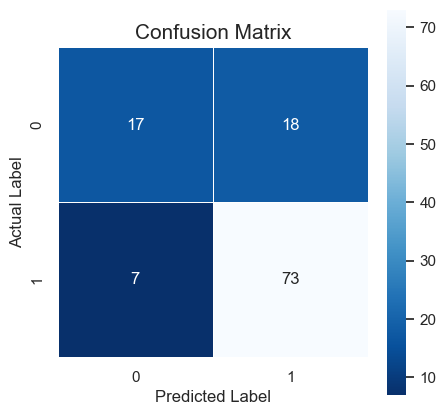

In [201]:
performance_rf = evaluation_metrics(y_test, y_pred_rf, "weighted")

ROC Curve

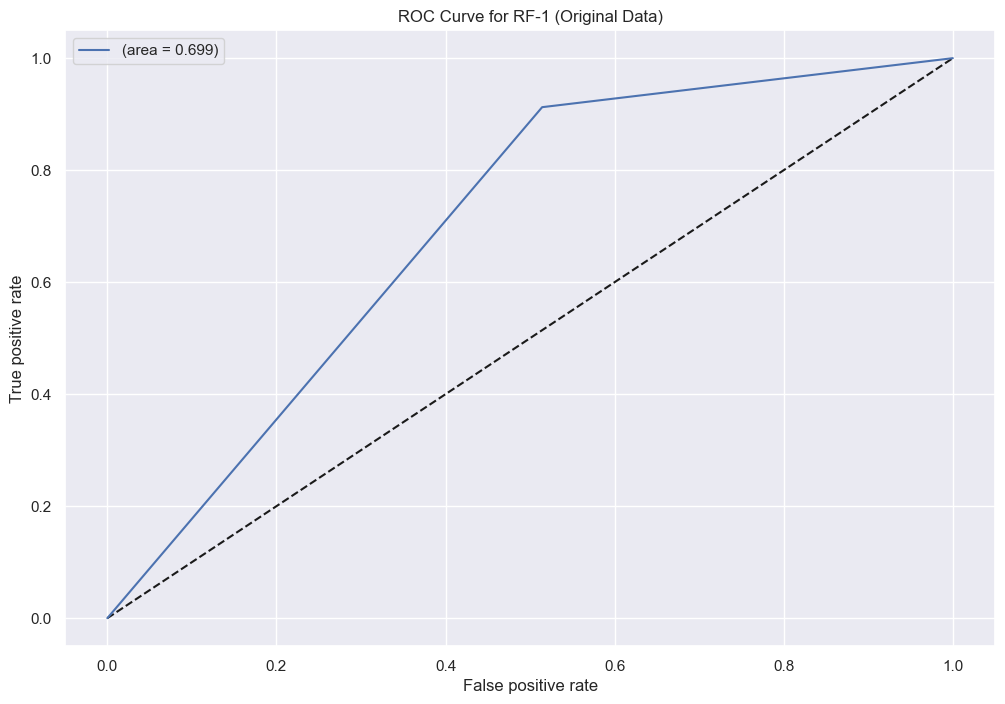

In [251]:
# Visualization of Random Forest Tree
roc_rf = plot_roc(y_test, y_pred_rf, "ROC Curve for RF-1 (Original Data)", (12,8))

##### Summary of Model RF-1: Random Forest Base Model (Original Data)

<u>**Interpretation of Random Forest Model RF-1**</u>

1. **Overall Performance Metrics:**
   - Accuracy: RF-1 achieves an accuracy of **78.3%**, indicating its ability to correctly classify instances from both classes.
   - Precision: With a precision of **77.4%**, the model demonstrates a moderate ability to correctly identify positive cases out of all predicted positive instances.
   - Recall: RF-1 exhibits a recall of **78.3%**, indicating its effectiveness in capturing actual positive instances out of all true positive cases.
   - F1 Score: The F1 score of **76.9%** signifies a balanced measure of precision and recall, reflecting the model's overall effectiveness.

2. **Classification Report**
   - The classification report reveals better precision for class 1 (loan approved) compared to class 0 (loan rejected).
   - The recall for class 1 is notably higher compared to class 0, suggesting that the model excels in identifying positive instances.
   - The F1 score for class 1 is substantially higher compared to class 0, indicating better performance in correctly classifying positive instances.

3. **Confusion Matrix**
   - The confusion matrix depicts a relatively higher number of false positives (**18 instances**) compared to false negatives (**7 instances**), indicating a tendency of the model to misclassify negative instances as positive.
   - The true positives (**73 instances**) outnumber the true negatives (**17 instances**), reflecting the class imbalance in the dataset.

4. **ROC Curve**
   - The ROC curve illustrates the model's discrimination ability, with an AUC of **0.699**. While this indicates a moderate level of discrimination, there is still room for improvement.

Random Forest Model RF-1, trained on the original data with feature selection, demonstrates moderate performance in predicting loan status. While achieving balanced precision and recall, RF-1 shows a tendency to misclassify negative instances as positive, highlighting potential areas for improvement in handling class imbalance and optimizing model performance. Further refinement may enhance the model's discrimination ability and overall effectiveness in loan status prediction.

##### Model RF-2: Random Forest Tuned Model (Hyperparameter Tuning of RF-1)

Initial Model Building & Performance Evaluation

In [203]:
from sklearn.model_selection import GridSearchCV

# Define estimator
model_rf = RandomForestClassifier()

# Define dictionary containing the hyperparameters for tuning
parameters = {"criterion": ["gini", "entropy"],
              "class_weight": ["balanced", "balanced_subsample"],
              "n_estimators": np.arange(100, 500, 100),
              "max_features": ["auto", "sqrt"], 
              "max_depth": np.arange(10, 50, 10), 
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4],
              "bootstrap": [True, False]}

# Build Grid Search with Cross-Validation and Accuracy Score
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=parameters, scoring="accuracy", cv=5, n_jobs=-1, verbose=3)
grid_search_rf.fit(X_train_ranked_rf, y_train)

# Get the best parameters
rf_best_parameters = grid_search_rf.best_params_
rf_best_score = grid_search_rf.best_score_
rf_best_estimator = grid_search_rf.best_estimator_

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


In [204]:
# Check Best Parameters
print(rf_best_parameters)
print(rf_best_score)
print(rf_best_estimator)

{'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.8382250174703005
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=40)


Final Model with Best Estimator

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy: 0.783
Precision: 0.775
Recall: 0.783
F1 Score: 0.766

-------------------------------------------------------------------

 Clasification Report:
               precision    recall  f1-score   support

           0       0.73      0.46      0.56        35
           1       0.80      0.93      0.86        80

    accuracy                           0.78       115
   macro avg       0.76      0.69      0.71       115
weighted avg       0.77      0.78      0.77       115


-------------------------------------------------------------------



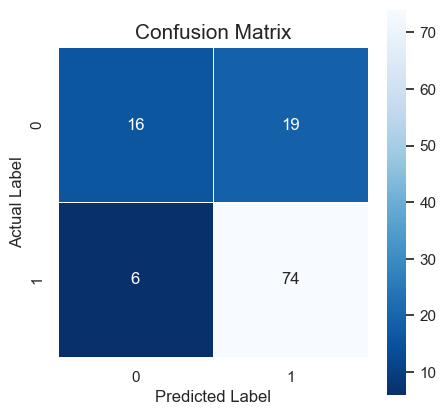

In [205]:
# Build the final model
final_model_rf = rf_best_estimator
print(final_model_rf.get_params())

# Predict
y_pred_rf_final = final_model_rf.predict(X_test_ranked_rf)

# Evaluate the model
performance_rf_final = evaluation_metrics(y_test, y_pred_rf_final, "weighted")

ROC Curve

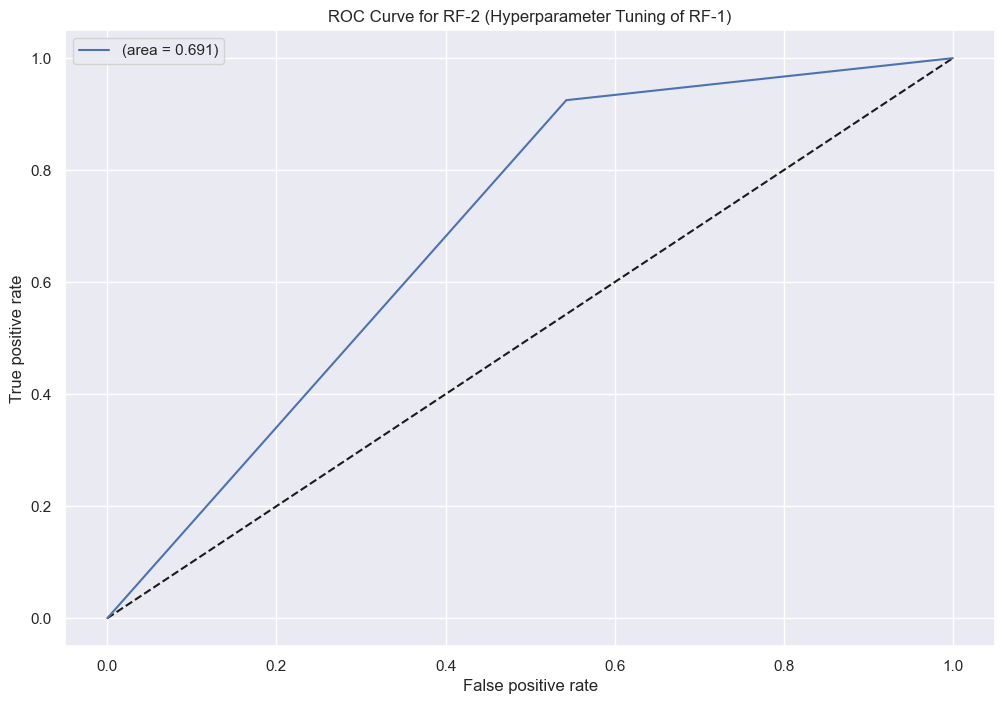

In [262]:
# ROC Curve
roc_rf_final = plot_roc(y_test, y_pred_rf_final, "ROC Curve for RF-2 (Hyperparameter Tuning of RF-1)", (12,8))

##### Summary of Model RF-2: Random Forest Tuned Model (Hyperparameter Tuning of RF-1)

<u>**Interpretation of Random Forest Model RF-2**</u>

1. **Overall Performance Metrics**
   - Accuracy: RF-2 achieves an accuracy of **78.3%**, which is similar with RF-1.
   - Precision: With a precision of **77.5%**, RF-2 demonstrates a moderate ability to correctly identify positive cases out of all predicted positive instances, slightly improved compared to RF-1.
   - Recall: RF-2 exhibits a recall of **78.3%**, which is similar with RF-1.
   - F1 Score: The F1 score of **76.6%** is slightly lower than RF-1, indicating a minor decrease in overall effectiveness.

2. **Classification Report**
   - The classification report reveals similar precision and recall for both classes compared to RF-1.
   - However, there's a slight decrease in F1 score for RF-2 compared to RF-1, particularly for class 1.

3. **Confusion Matrix**
   - The confusion matrix shows a similar pattern of misclassification as RF-1, with a relatively higher number of false positives (**19 instances**) compared to false negatives (**6 instances**).

4. **ROC Curve**
   - The ROC curve illustrates a slight decrease in the model's discrimination ability compared to RF-1, with an AUC of **0.691**.

<u>**Comparison to RF-1**</u>

- RF-2 demonstrates overall similar performance metrics to RF-1, including accuracy, precision, recall, and F1 score.
- However, RF-2 shows a slight decrease in the F1 score and discrimination ability (AUC) compared to RF-1.
- While hyper-parameter tuning in RF-2 did not lead to significant performance improvement, it maintains comparable performance to RF-1.

In conclusion, Random Forest Model RF-2, with hyper-parameter tuning conducted on RF-1, demonstrates similar performance to RF-1 in predicting loan status. While achieving consistent accuracy, precision, and recall, RF-2 shows a minor decrease in F1 score and discrimination ability compared to RF-1. Further optimization may be explored to enhance model performance, particularly in improving the F1 score and discrimination ability.

##### Feature Importance Analysis (Oversampling Using SMOTE)

The methodology used in this section is similar to the `Feature Importance Analysis (Original Data)` section.

`RandomForestClassifier()` Coefficient Analysis

The feature selection should be based on the following criteria:
1. `Credit_History`, `ApplicantIncome_win_norm`, and `LoanAmount_win_norm` shall be included in the list of selected features.
2. Any features that has coefficient in between these three features shall be included in the list of selected features.

Among all the top priority features, ApplicantIncome_win_norm has the lowest importance score, with only 0.12.

List of Selected Features Based on Threshold (4):
['Credit_History_0', 'Credit_History_1', 'LoanAmount_win_norm', 'ApplicantIncome_win_norm']



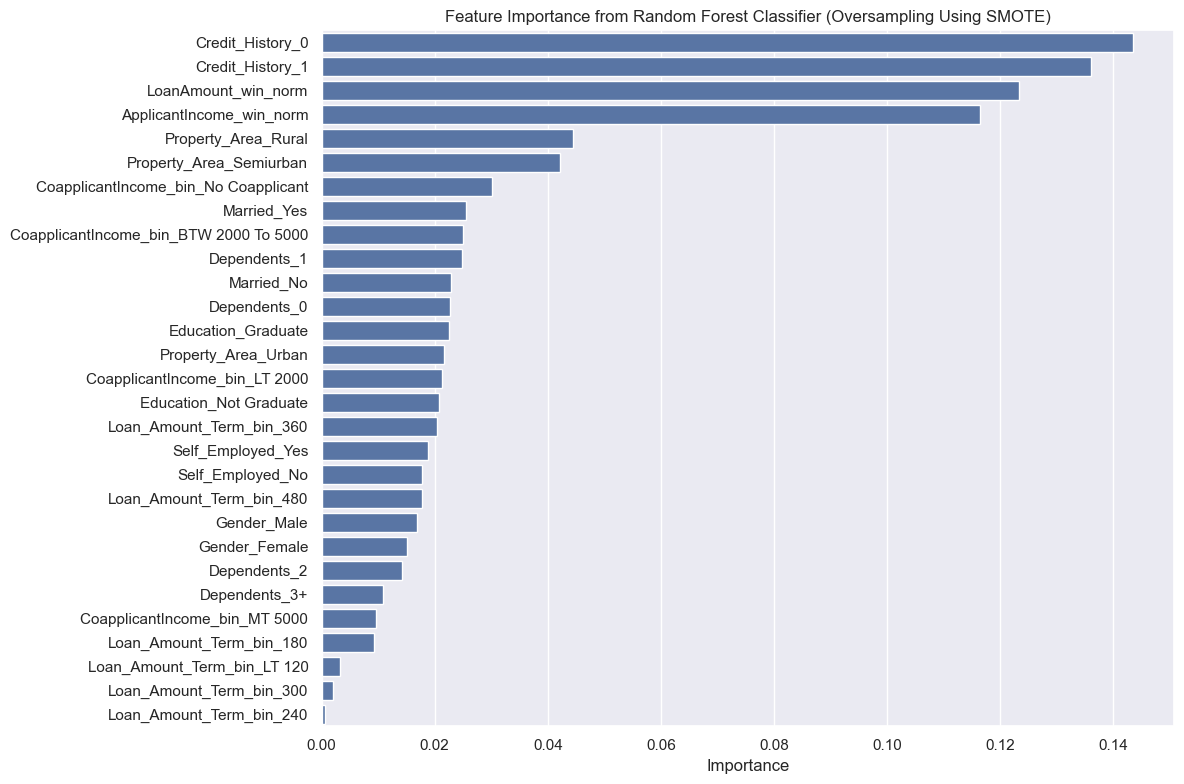

In [207]:
feat_imp_rf_sm = rf_feature_imp(X_train_sm, y_train_sm, "Feature Importance from Random Forest Classifier (Oversampling Using SMOTE)")

**Recursive Feature Elimination (RFE)**

In [208]:
rfe_list_rf_sm = rf_rfe_feature_rank(X_train_sm, y_train_sm, len(feat_imp_rf_sm))

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
 False False False  True  True]

[20 11 13  6  9 12 18 22  5 14 16 19  8 10 23  3 21 26 25  7 17 24  1  1
  2  4 15  1  1]

['Credit_History_0', 'Credit_History_1', 'ApplicantIncome_win_norm', 'LoanAmount_win_norm']


**Feature Subset Selection**

Combine Both Results from Feature Importance and RFE

In [209]:
feat_rank_rf_sm = list(set(feat_imp_rf_sm + rfe_list_rf_sm))
feat_rank_rf_sm

['Credit_History_0',
 'ApplicantIncome_win_norm',
 'LoanAmount_win_norm',
 'Credit_History_1']

Subset X_train_sm and X_test_sm Based on Feature Importance Ranking (`feat_rank_rf`)

In [210]:
X_ranked_rf_sm = X_sm[feat_rank_rf_sm]
X_train_ranked_rf_sm = X_train_sm[feat_rank_rf_sm]
X_test_ranked_rf_sm = X_test_sm[feat_rank_rf_sm]

# Inspect
print(X_ranked_rf_sm.shape)
print(X_train_ranked_rf_sm.shape)
print(X_test_ranked_rf_sm.shape)

(542, 4)
(379, 4)
(163, 4)


##### Model RF-3: Random Forest Base Model (Oversampling Using SMOTE)

Initial Model Building & Performance Evaluation

In [211]:
y_pred_rf_sm = build_rf_model(X_train_ranked_rf_sm, X_test_ranked_rf_sm, y_train_sm)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Accuracy: 0.785
Precision: 0.792
Recall: 0.785
F1 Score: 0.785

-------------------------------------------------------------------

 Clasification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79        87
           1       0.74      0.84      0.79        76

    accuracy                           0.79       163
   macro avg       0.79      0.79      0.79       163
weighted avg       0.79      0.79      0.79       163


-------------------------------------------------------------------



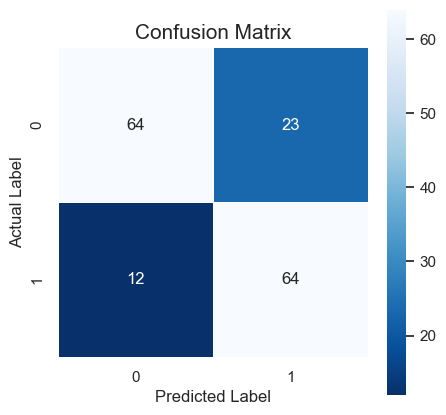

In [212]:
performance_rf_sm = evaluation_metrics(y_test_sm, y_pred_rf_sm, "weighted")

ROC Curve

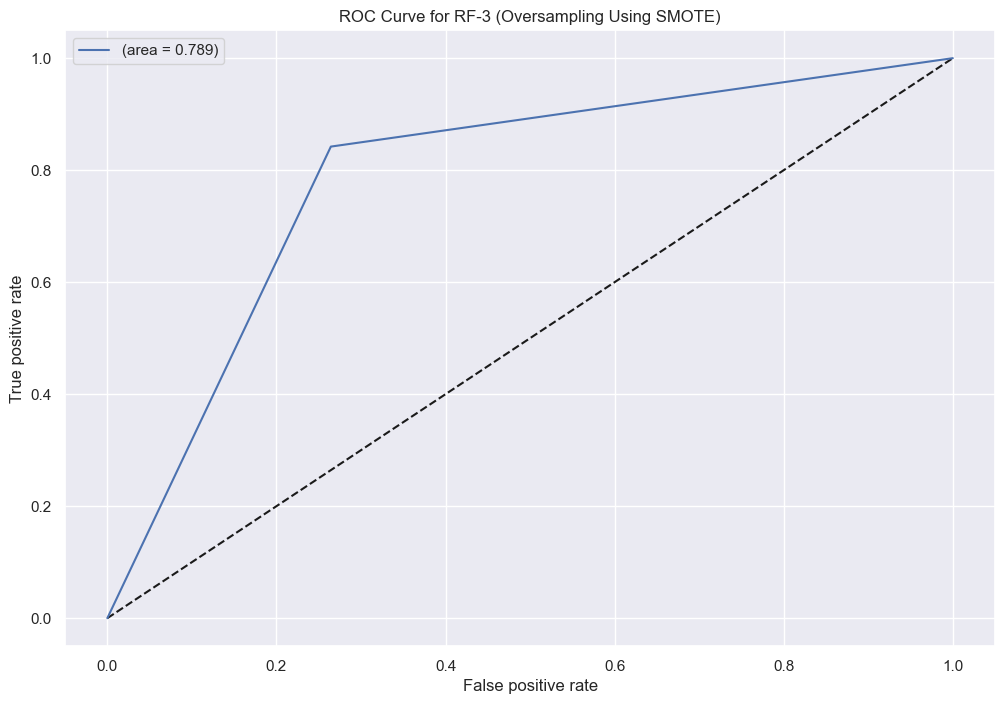

In [259]:
# Visualization of Random Forest Tree
roc_rf_sm = plot_roc(y_test_sm, y_pred_rf_sm, "ROC Curve for RF-3 (Oversampling Using SMOTE)", (12,8))

##### Summary of Model RF-3: Random Forest Base Model (Oversampling Using SMOTE)

**Interpretation of Random Forest Model RF-3:**

1. **Overall Performance Metrics**
   - Accuracy: RF-3 achieves an accuracy of **78.5%**, indicating its ability to correctly classify instances from both classes.
   - Precision: With a precision of **79.2%**, the model demonstrates a moderate ability to correctly identify positive cases out of all predicted positive instances, slightly improved compared to RF-1.
   - Recall: RF-3 exhibits a recall of **78.5%**, indicating its effectiveness in capturing actual positive instances out of all true positive cases, consistent with RF-1.
   - F1 Score: The F1 score of **78.5%** is consistent with precision and recall, reflecting a balanced measure of model effectiveness.

2. **Classification Report**
   - The classification report reveals balanced precision and recall for both classes, indicating consistent performance in predicting positive and negative instances.
   - Both classes demonstrate comparable F1 scores, suggesting consistent predictive capability across the board.

3. **Confusion Matrix**
   - The confusion matrix depicts a relatively higher number of false positives (**23 instances**) compared to false negatives (**12 instances**), indicating a tendency of the model to misclassify negative instances as positive.
   - The true positives (**64 instances**) and true negatives (**64 instances**) demonstrate balanced classification performance.

4. **ROC Curve**
   - The ROC curve illustrates the model's discrimination ability, with an AUC of **0.789**, indicating a moderate level of discrimination, slightly improved compared to RF-1.

<u>**Comparison to RF-1**</u>
- RF-3 demonstrates overall similar performance metrics to RF-1, including accuracy, precision, recall, and F1 score.
- However, RF-3 shows a slightly higher precision and discrimination ability (AUC) compared to RF-1.
- While training on oversampled data with SMOTE did not lead to significant improvements in performance metrics, RF-3 maintains comparable performance to RF-1.

In conclusion, Random Forest Model RF-3, trained using oversampled data with SMOTE, demonstrates consistent performance in predicting loan status. While achieving similar accuracy, precision, recall, and F1 score to RF-1, RF-3 shows a slight improvement in precision and discrimination ability. Further exploration of techniques to address class imbalance and optimize model parameters may enhance overall performance for loan status prediction.

##### Model RF-4: Random Forest Tuned Model (Hyperparameter Tuning of RF-3)

Initial Model Building & Performance Evaluation

In [214]:
from sklearn.model_selection import GridSearchCV

# Define estimator
model_rf_sm = RandomForestClassifier()

# Define dictionary containing the hyperparameters for tuning
parameters = {"criterion": ["gini", "entropy"],
              "class_weight": ["balanced", "balanced_subsample"],
              "n_estimators": np.arange(100, 500, 100),
              "max_features": ["auto", "sqrt"], 
              "max_depth": np.arange(10, 50, 10), 
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4],
              "bootstrap": [True, False]}

# Build Grid Search with Cross-Validation and Accuracy Score
grid_search_rf_sm = GridSearchCV(estimator=model_rf_sm, param_grid=parameters, scoring="accuracy", cv=5, n_jobs=-1, verbose=3)
grid_search_rf_sm.fit(X_train_ranked_rf_sm, y_train_sm)

# Get the best parameters
rf_best_parameters_sm = grid_search_rf_sm.best_params_
rf_best_score_sm = grid_search_rf_sm.best_score_
rf_best_estimator_sm = grid_search_rf_sm.best_estimator_

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


In [215]:
# Check Best Parameters
print(rf_best_parameters_sm)
print(rf_best_score_sm)
print(rf_best_estimator_sm)

{'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
0.773122807017544
RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       min_samples_split=10, n_estimators=200)


Final Model with Best Estimator

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy: 0.822
Precision: 0.835
Recall: 0.822
F1 Score: 0.822

-------------------------------------------------------------------

 Clasification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        87
           1       0.76      0.91      0.83        76

    accuracy                           0.82       163
   macro avg       0.83      0.83      0.82       163
weighted avg       0.84      0.82      0.82       163


-------------------------------------------------------------------



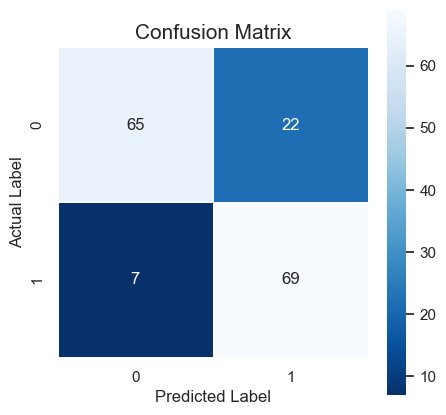

In [216]:
# Build the final model
final_model_rf_sm = rf_best_estimator_sm
print(final_model_rf_sm.get_params())

# Predict
y_pred_rf_final_sm = final_model_rf_sm.predict(X_test_ranked_rf_sm)

# Evaluate the model
performance_rf_final_sm = evaluation_metrics(y_test_sm, y_pred_rf_final_sm, "weighted")

ROC Curve

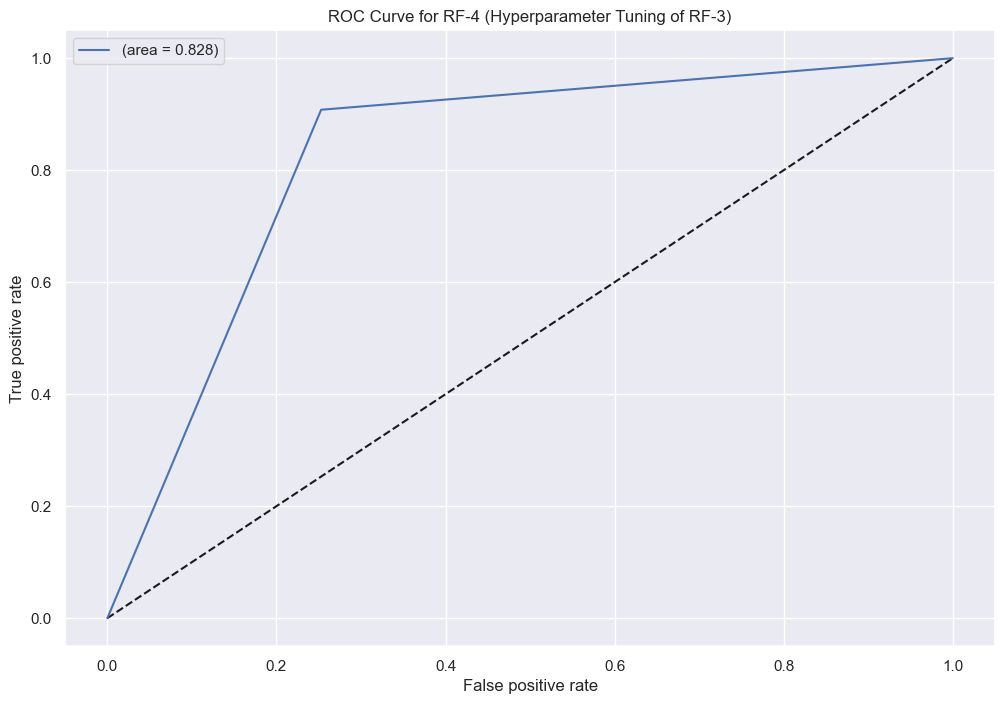

In [263]:
# Visualization of Random Forest Tree
roc_rf_final_sm = plot_roc(y_test_sm, y_pred_rf_final_sm, "ROC Curve for RF-4 (Hyperparameter Tuning of RF-3)", (12,8))

##### Summary of Model RF-4: Random Forest Tuned Model (Hyperparameter Tuning of RF-3)

<u>**Interpretation of Random Forest Model RF-4**</u>

1. **Overall Performance Metrics**
   - Accuracy: RF-4 achieves an accuracy of **82.2%**, indicating its ability to correctly classify instances from both classes, an improvement over RF-3.
   - Precision: With a precision of **83.5%**, the model demonstrates a strong ability to correctly identify positive cases out of all predicted positive instances, slightly improved compared to RF-3.
   - Recall: RF-4 exhibits a recall of **82.2%**, indicating its effectiveness in capturing actual positive instances out of all true positive cases, consistent with RF-3.
   - F1 Score: The F1 score of **82.2%** reflects a balanced measure of precision and recall, indicating overall effectiveness, consistent with precision and recall.

2. **Classification Report**
   - The classification report reveals balanced precision and recall for both classes, indicating consistent performance in predicting positive and negative instances.
   - Both classes demonstrate comparable F1 scores, suggesting consistent predictive capability across the board.

3. **Confusion Matrix**
   - The confusion matrix depicts a similar pattern of misclassification as RF-3, with a relatively higher number of false positives (**22 instances**) compared to false negatives (**7 instances**).
   - The true positives (**69 instances**) and true negatives (**65 instances**) demonstrate balanced classification performance.

4. **ROC Curve**
   - The ROC curve illustrates the model's discrimination ability, with an AUC of **0.828**, indicating a moderate level of discrimination, slightly improved compared to RF-3.

<u>**Comparison to RF-3**</u>
- RF-4 demonstrates improved overall performance metrics compared to RF-3, including accuracy, precision, and F1 score.
- The model also exhibits a slightly higher discrimination ability (AUC) compared to RF-3.
- While hyper-parameter tuning in RF-4 leads to performance enhancements, it maintains comparable performance to RF-3 in terms of recall.

In conclusion, Random Forest Model RF-4, with hyper-parameter tuning conducted on RF-3, demonstrates improved performance in predicting loan status. With enhanced accuracy, precision, and F1 score compared to RF-3, RF-4 maintains consistent recall and demonstrates a slightly higher discrimination ability. Further optimization may continue to enhance model performance for loan status prediction.

#### Conclusion for Random Forest

<u>**Comparative Analysis of Random Forest Model**</u>

1. **RF-1:**
   - RF-1 achieved an accuracy of **78.3%** with a precision, recall, and F1 score of **77.4%**, **78.3%**, and **76.9%** respectively.
   - It utilized original data with feature selection.

2. **RF-2:**
   - RF-2 maintained similar performance to RF-1 with an accuracy of **78.3%**.
   - It underwent hyper-parameter tuning using GridSearchCV but did not result in significant performance improvement.
   - There were minor improvements in precision but a slight decrease in the F1 score and discrimination ability.

3. **RF-3:**
   - RF-3 achieved an accuracy of **78.5%** with balanced precision, recall, and F1 score of **79.2%**, **78.5%**, and **78.5%** respectively.
   - It was trained using oversampled data with SMOTE, aiming to address class imbalance.

4. **RF-4:**
   - RF-4 demonstrated improved performance compared to RF-3 with an accuracy of **82.2%**.
   - Hyper-parameter tuning led to enhanced precision, recall, and F1 score, indicating improved predictive capability.
   - The discrimination ability (AUC) was also slightly higher in RF-4 compared to RF-3.

<u>**Performance Comparison**</u>

- **RF-4 outperforms all other models** with the highest accuracy, precision, recall, and F1 score.
- RF-3 also demonstrated competitive performance, particularly considering its approach of utilizing oversampled data with SMOTE to address class imbalance.
- RF-2 and RF-1 exhibited similar performance, but both showed slightly inferior results compared to RF-3 and RF-4.

In conclusion, RF-4 stands out as the best-performing model due to its superior accuracy and overall performance metrics. However, continuous refinement and experimentation with various techniques are essential for further improving model performance.

### Section 3: Model Performance Comparison & Evaluation

From the analysis above, the best model for each proposed algorithm is as follow:
1. Naïve Bayes -> Model NB-1
2. Logistic Regression -> Model LR-2 and LR-4
3. Random Forest -> Model RF-4

However, to simplify the model selection for the loan status prediction project, the primary performance metrics, Accuracy and AUC, are chosen. Models are ranked based on these metrics, with the highest-ranked model selected as the best-performing one.

Please note that since AUC is unavailable for Naïve Bayes cross-validation, models NB-1-CV and NB-2-CV are excluded from the ranking.

In [218]:
# Create a data frame for all the results
results_index = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

results_col = ['NB-1', 'NB-1-CV', 'NB-2', 'NB-2-CV', 'LR-1', 'LR-2', 'LR-3', 'LR-4', 'RF-1', 'RF-2', 'RF-3', 'RF-4']

# Combine the performance for each model
nb_result = np.concatenate([performance_nb, [roc_nb]]).tolist()
nb_cv_result = cv_results_nb + [0]
nb_sm_result = np.concatenate([performance_nb_sm, [roc_nb_sm]]).tolist()
nb_sm_cv_result = cv_results_nb_sm + [0]

lr_result = np.concatenate([performance_lr, [roc_lr]]).tolist()
lr_final_result = np.concatenate([performance_lr_final, [roc_lr_final]]).tolist()
lr_sm_result = np.concatenate([performance_lr_sm, [roc_lr_sm]]).tolist()
lr_final_sm_result = np.concatenate([performance_lr_final_sm, [roc_lr_final_sm]]).tolist()

rf_result = np.concatenate([performance_rf, [roc_rf]]).tolist()
rf_final_result = np.concatenate([performance_rf_final, [roc_rf_final]]).tolist()
rf_sm_result = np.concatenate([performance_rf_sm, [roc_rf_sm]]).tolist()
rf_final_sm_result = np.concatenate([performance_rf_final_sm, [roc_rf_final_sm]]).tolist()

# Result Dict
results_lst = [nb_result, nb_cv_result, nb_sm_result, nb_sm_cv_result,
               lr_result, lr_final_result, lr_sm_result, lr_final_sm_result,
               rf_result, rf_final_result, rf_sm_result, rf_final_sm_result]

results_dict = dict(zip(results_col, results_lst))

results_df = pd.DataFrame(results_dict, index=results_index).transpose().reset_index()
results_df.columns.values[0] = 'Model'

results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,NB-1,0.817391,0.840442,0.817391,0.793067,0.708036
1,NB-1-CV,0.861006,0.845276,0.989474,0.911225,0.000000
2,NB-2,0.766871,0.796155,0.766871,0.764116,0.775786
3,NB-2-CV,0.730877,0.688492,0.876923,0.770549,0.000000
4,LR-1,0.808696,0.833623,0.808696,0.781063,0.693750
5,LR-2,0.826087,0.837529,0.826087,0.808227,0.730357
6,LR-3,0.785276,0.797776,0.785276,0.784791,0.790532
7,LR-4,0.797546,0.804844,0.797546,0.797546,0.801195
8,RF-1,0.782609,0.773630,0.782609,0.769336,0.699107
9,RF-2,0.782609,0.774874,0.782609,0.765986,0.691071


##### Naïve Bayes (Performance Graphs)

In [219]:
# Get only the NB Result
nb_result_df = results_df[results_df['Model'].isin(['NB-1', 'NB-1-CV', 'NB-2', 'NB-2-CV'])]

nb_result_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,NB-1,0.817391,0.840442,0.817391,0.793067,0.708036
1,NB-1-CV,0.861006,0.845276,0.989474,0.911225,0.000000
2,NB-2,0.766871,0.796155,0.766871,0.764116,0.775786
3,NB-2-CV,0.730877,0.688492,0.876923,0.770549,0.000000


In [220]:
# Function to plot bar plot for each performance metrics
def plot_result(df, metric, model, size=(10,6)):
    fig, ax = plt.subplots(figsize=size)

    sns.barplot(data=df, x='Model', y=metric, hue='Model')
    plt.title(metric + " Comparison of " + model + " Models")
    plt.yticks(np.arange(0, 1.2, 0.2))
    add_value_labels(ax, 5, 3)
    plt.tight_layout()
    plt.show()

Accuracy

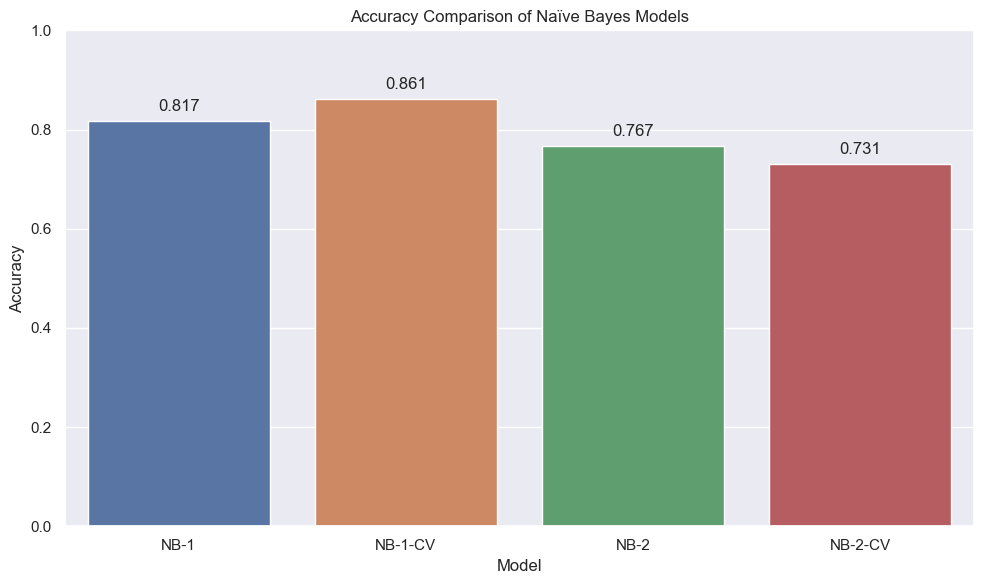

In [221]:
plot_result(nb_result_df, "Accuracy", "Naïve Bayes")

Precision

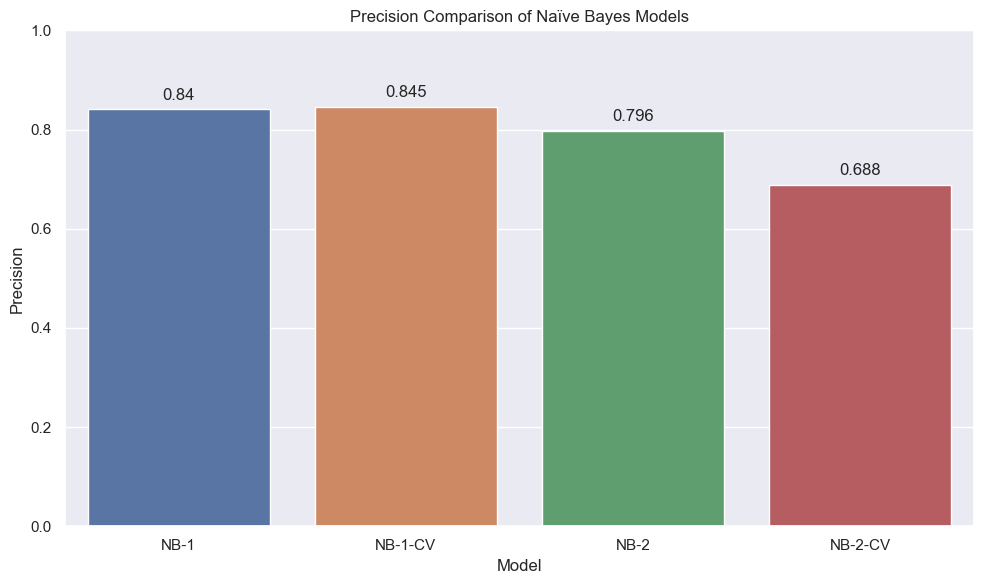

In [222]:
plot_result(nb_result_df, "Precision", "Naïve Bayes")

Recall

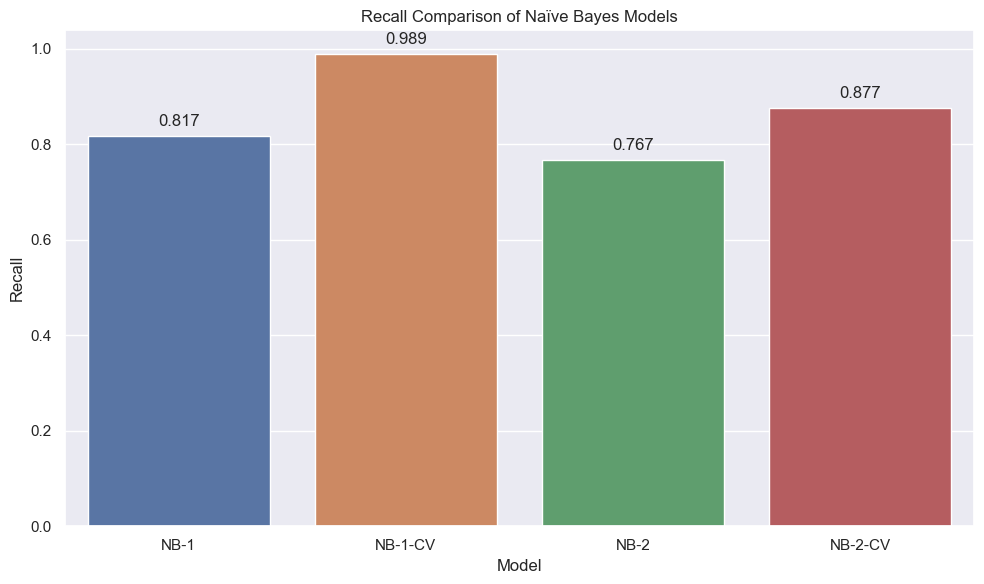

In [223]:
plot_result(nb_result_df, "Recall", "Naïve Bayes")

F1 Score

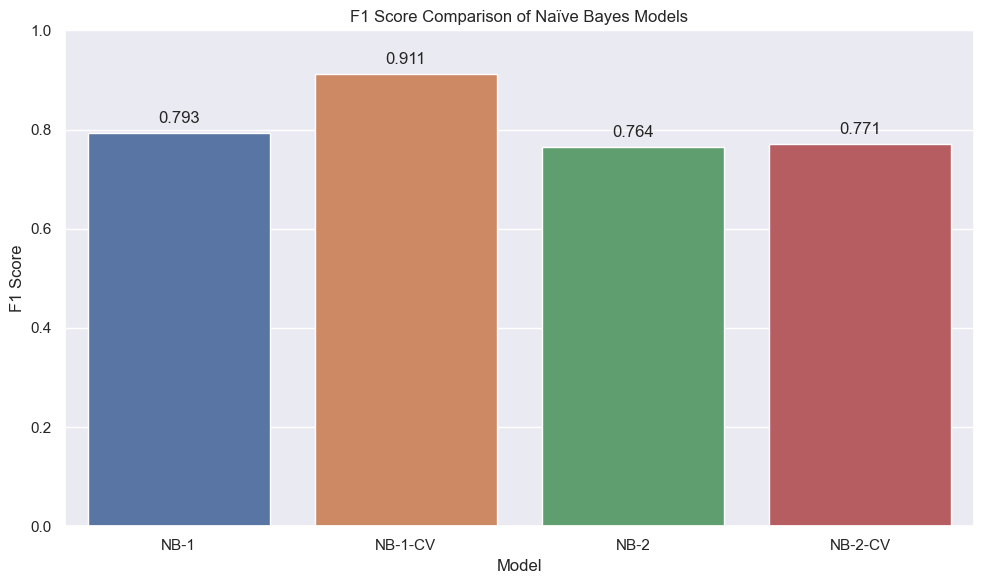

In [224]:
plot_result(nb_result_df, "F1 Score", "Naïve Bayes")

AUC

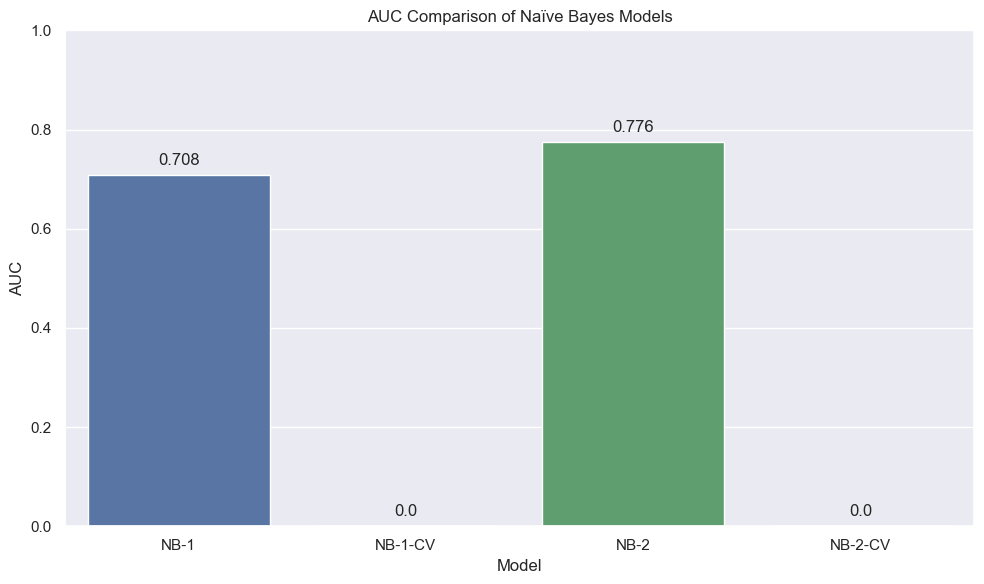

In [225]:
plot_result(nb_result_df, "AUC", "Naïve Bayes")

##### Logistic Regression (Performance Graphs)

In [226]:
# Get only the NB Result
lr_result_df = results_df[results_df['Model'].isin(['LR-1', 'LR-2', 'LR-3', 'LR-4'])]

lr_result_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
4,LR-1,0.808696,0.833623,0.808696,0.781063,0.693750
5,LR-2,0.826087,0.837529,0.826087,0.808227,0.730357
6,LR-3,0.785276,0.797776,0.785276,0.784791,0.790532
7,LR-4,0.797546,0.804844,0.797546,0.797546,0.801195


Accuracy

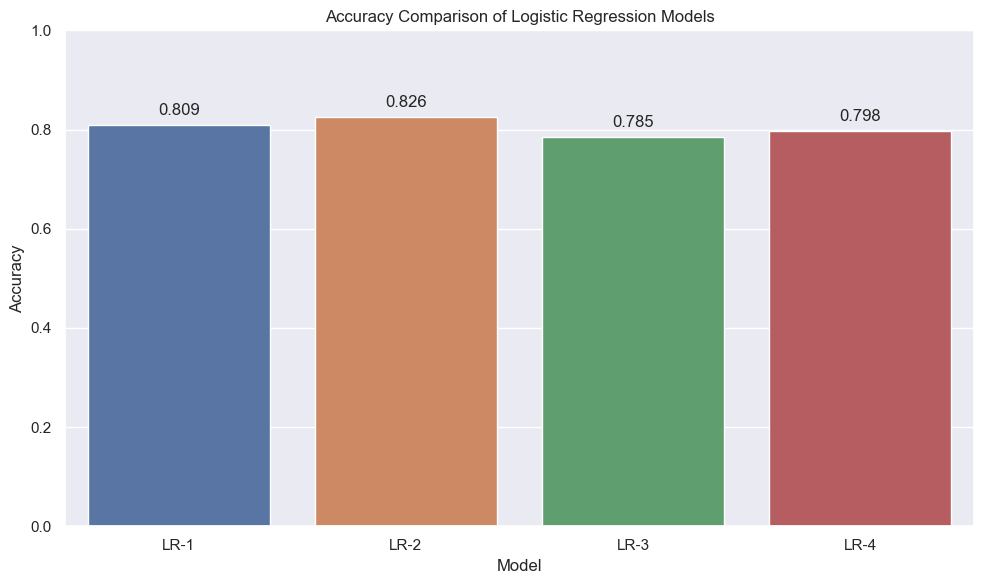

In [227]:
plot_result(lr_result_df, "Accuracy", "Logistic Regression")

Precision

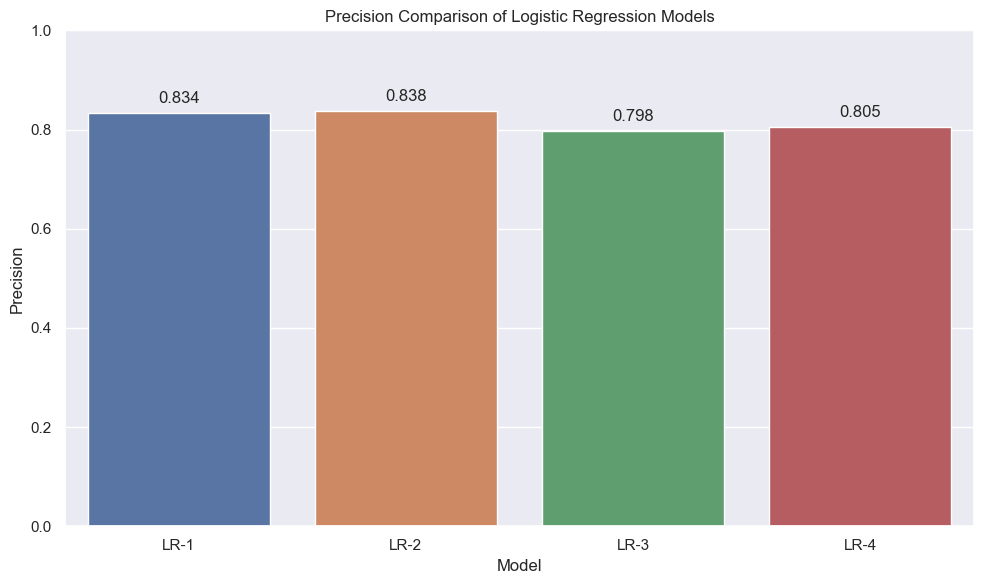

In [228]:
plot_result(lr_result_df, "Precision", "Logistic Regression")

Recall

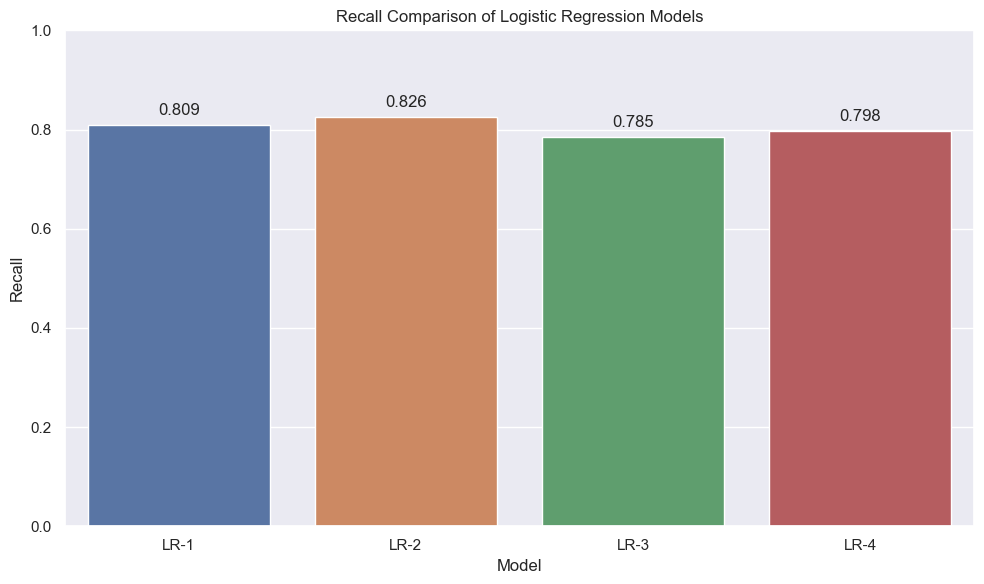

In [229]:
plot_result(lr_result_df, "Recall", "Logistic Regression")

F1 Score

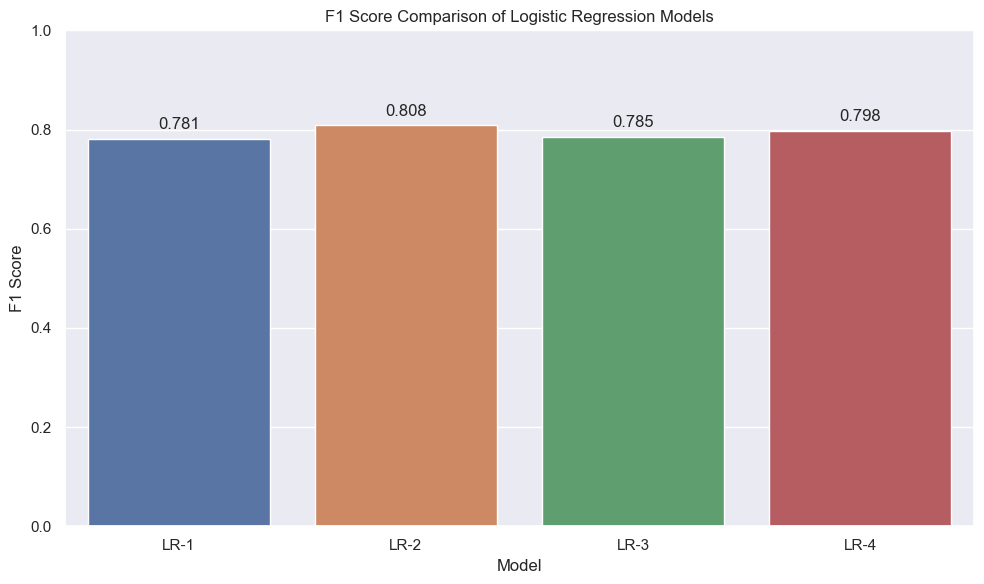

In [230]:
plot_result(lr_result_df, "F1 Score", "Logistic Regression")

AUC

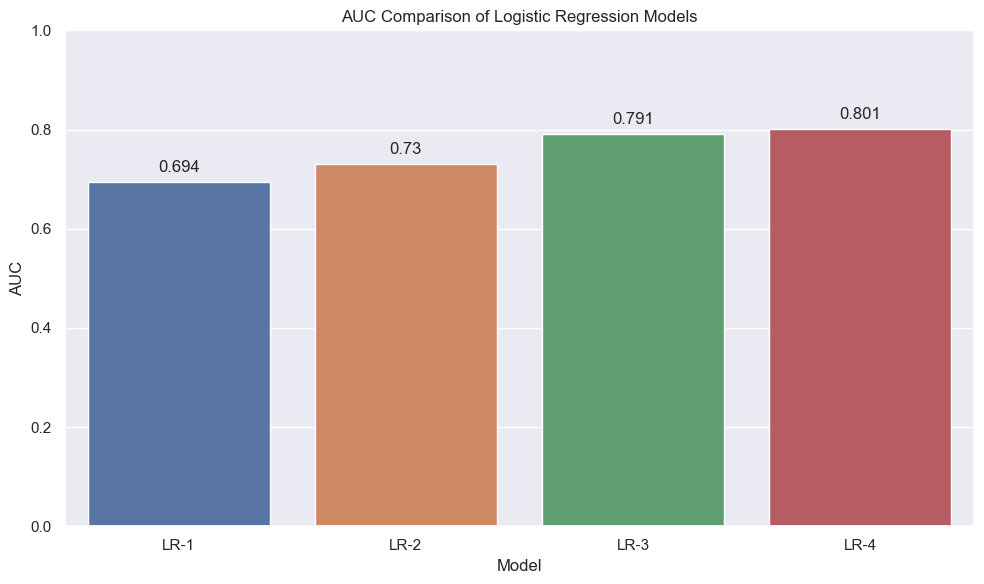

In [231]:
plot_result(lr_result_df, "AUC", "Logistic Regression")

##### Random Forest (Performance Graphs)

In [232]:
# Get only the NB Result
rf_result_df = results_df[results_df['Model'].isin(['RF-1', 'RF-2', 'RF-3', 'RF-4'])]

rf_result_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
8,RF-1,0.782609,0.773630,0.782609,0.769336,0.699107
9,RF-2,0.782609,0.774874,0.782609,0.765986,0.691071
10,RF-3,0.785276,0.792461,0.785276,0.785276,0.788869
11,RF-4,0.822086,0.835387,0.822086,0.821684,0.827511


Accuracy

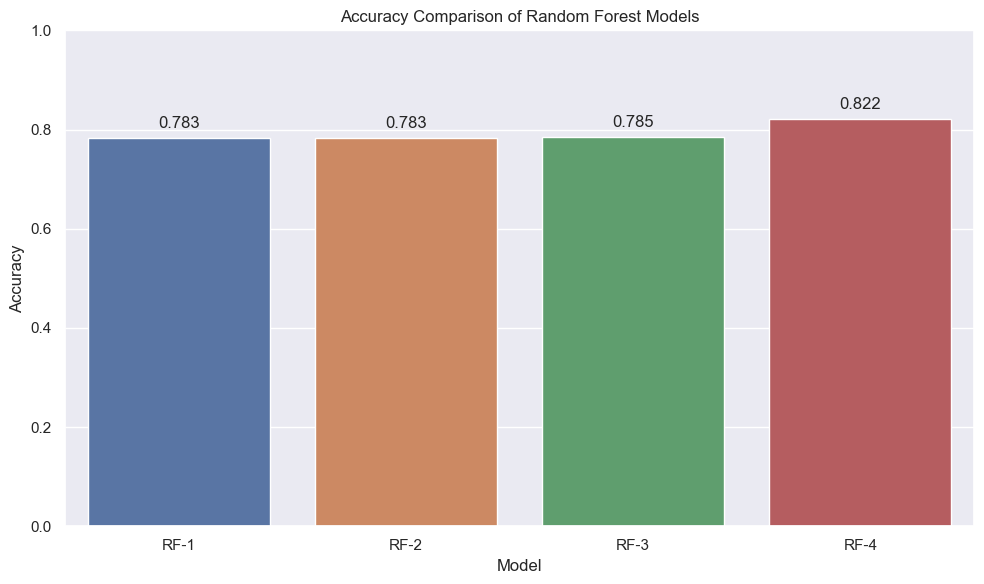

In [233]:
plot_result(rf_result_df, "Accuracy", "Random Forest")

Precision

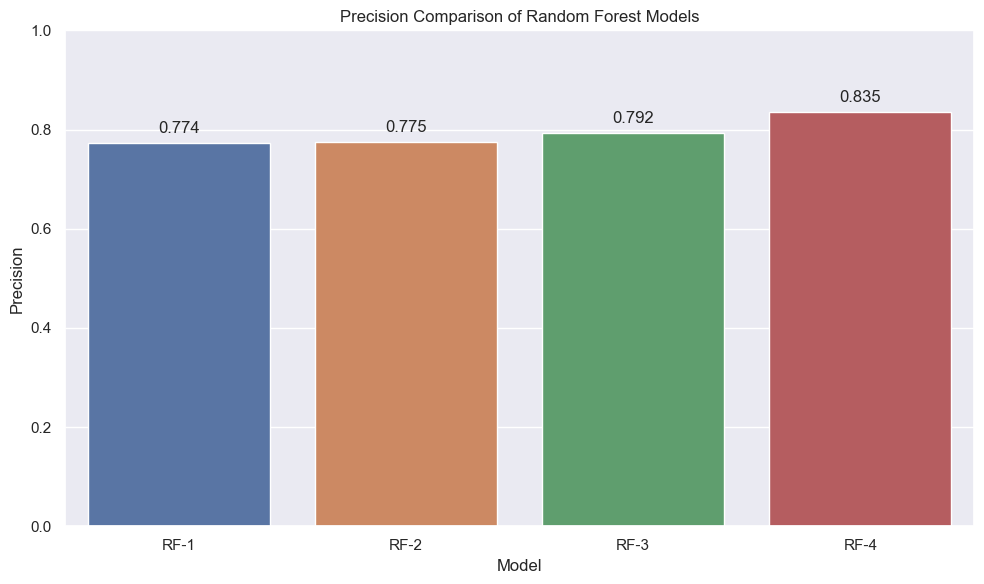

In [234]:
plot_result(rf_result_df, "Precision", "Random Forest")

Recall

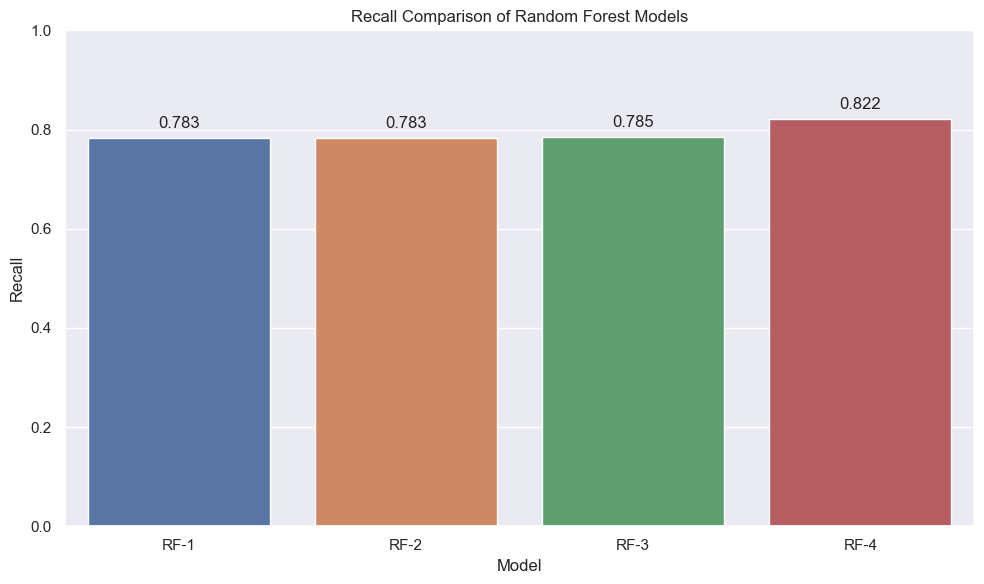

In [235]:
plot_result(rf_result_df, "Recall", "Random Forest")

F1 Score

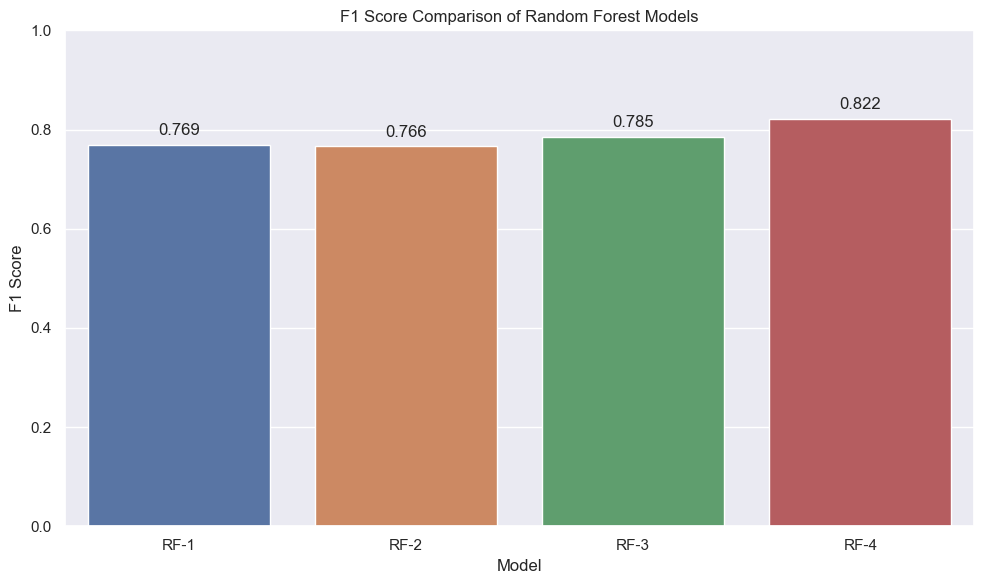

In [236]:
plot_result(rf_result_df, "F1 Score", "Random Forest")

AUC

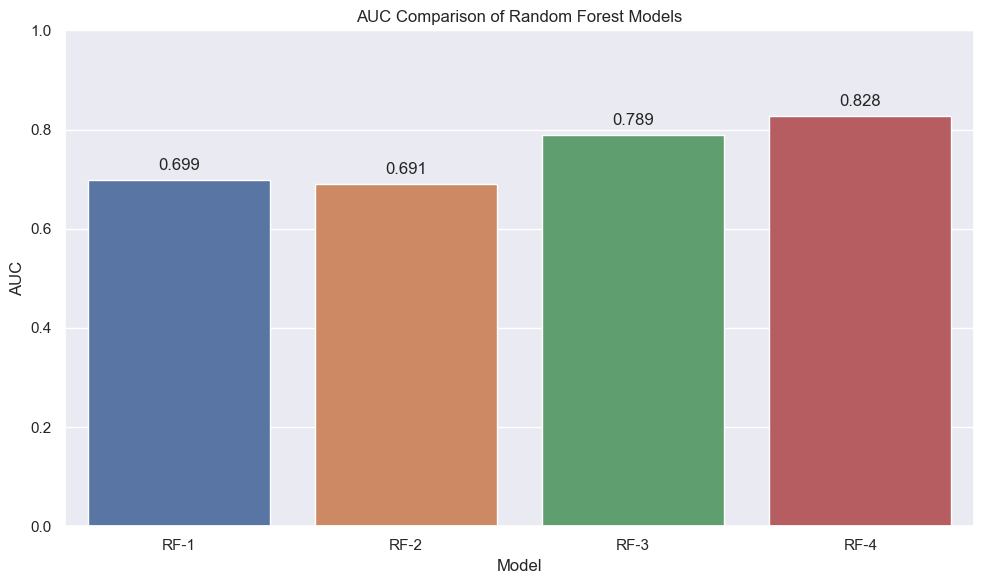

In [237]:
plot_result(rf_result_df, "AUC", "Random Forest")

##### Overall Model Performance Comparison

Based on the visuals below, it is evident that:
1. When models are ranked based on Accuracy, the top 3 models (in order) are: LR-2 (82.6%) > RF-4 (82.2%) > NB-1 (81.7%).
2. Ranking models by AUC places the top 3 models (in order) as: RF-4 (82.8%) > LR-4 (80.1%) > LR-3 (79.05%).
3. Considering the average rank for Accuracy and AUC, the top 3 models (in order) are: RF-4 > LR-2 > LR-4.

Consequently, it can be concluded that model RF-4 exhibits the best performance among the other models. This conclusion is drawn from the Random Forest Classifier trained on oversampled data, with hyperparameter tuning.

In [238]:
# Rank Accuracy
acc_rank_df = results_df[~results_df['Model'].isin(['NB-1-CV', 'NB-2-CV'])][['Model', 'Accuracy']].sort_values('Accuracy', ascending=False)
acc_rank_df['Accuracy Rank'] = acc_rank_df['Accuracy'].rank(ascending=False, method='min')
acc_rank_df['Acc for Plotting'] = acc_rank_df['Accuracy Rank'].rank(ascending=False, method='min')

acc_rank_df

,Model,Accuracy,Accuracy Rank,Acc for Plotting
5,LR-2,0.826087,1.0,10.0
11,RF-4,0.822086,2.0,9.0
0,NB-1,0.817391,3.0,8.0
4,LR-1,0.808696,4.0,7.0
7,LR-4,0.797546,5.0,6.0
6,LR-3,0.785276,6.0,4.0
10,RF-3,0.785276,6.0,4.0
8,RF-1,0.782609,8.0,2.0
9,RF-2,0.782609,8.0,2.0
2,NB-2,0.766871,10.0,1.0


In [239]:
# Rank AUC
auc_rank_df = results_df[~results_df['Model'].isin(['NB-1-CV', 'NB-2-CV'])][['Model', 'AUC']].sort_values('AUC', ascending=False)
auc_rank_df['AUC Rank'] = auc_rank_df['AUC'].rank(ascending=False, method='min')
auc_rank_df['AUC for Plotting'] = auc_rank_df['AUC Rank'].rank(ascending=False, method='min')

auc_rank_df

,Model,AUC,AUC Rank,AUC for Plotting
11,RF-4,0.827511,1.0,10.0
7,LR-4,0.801195,2.0,9.0
6,LR-3,0.790532,3.0,8.0
10,RF-3,0.788869,4.0,7.0
2,NB-2,0.775786,5.0,6.0
5,LR-2,0.730357,6.0,5.0
0,NB-1,0.708036,7.0,4.0
8,RF-1,0.699107,8.0,3.0
4,LR-1,0.693750,9.0,2.0
9,RF-2,0.691071,10.0,1.0


In [241]:
# Compute Overall Ranking
overall_rank_df = acc_rank_df.merge(auc_rank_df, how='left', on='Model')
overall_rank_df['Average Rank'] = (overall_rank_df['Accuracy Rank'] + overall_rank_df['AUC Rank'])/2
overall_rank_df['Avg for Plotting'] = overall_rank_df['Average Rank'].rank(ascending=False, method='min')
overall_rank_df.sort_values('Avg for Plotting', ascending=False, inplace=True)

overall_rank_df

,Model,Accuracy,Accuracy Rank,Acc for Plotting,AUC,AUC Rank,AUC for Plotting,Average Rank,Avg for Plotting
1,RF-4,0.822086,2.0,9.0,0.827511,1.0,10.0,1.5,10.0
0,LR-2,0.826087,1.0,10.0,0.730357,6.0,5.0,3.5,8.0
4,LR-4,0.797546,5.0,6.0,0.801195,2.0,9.0,3.5,8.0
5,LR-3,0.785276,6.0,4.0,0.790532,3.0,8.0,4.5,7.0
2,NB-1,0.817391,3.0,8.0,0.708036,7.0,4.0,5.0,5.0
6,RF-3,0.785276,6.0,4.0,0.788869,4.0,7.0,5.0,5.0
3,LR-1,0.808696,4.0,7.0,0.693750,9.0,2.0,6.5,4.0
9,NB-2,0.766871,10.0,1.0,0.775786,5.0,6.0,7.5,3.0
7,RF-1,0.782609,8.0,2.0,0.699107,8.0,3.0,8.0,2.0
8,RF-2,0.782609,8.0,2.0,0.691071,10.0,1.0,9.0,1.0


Accuracy

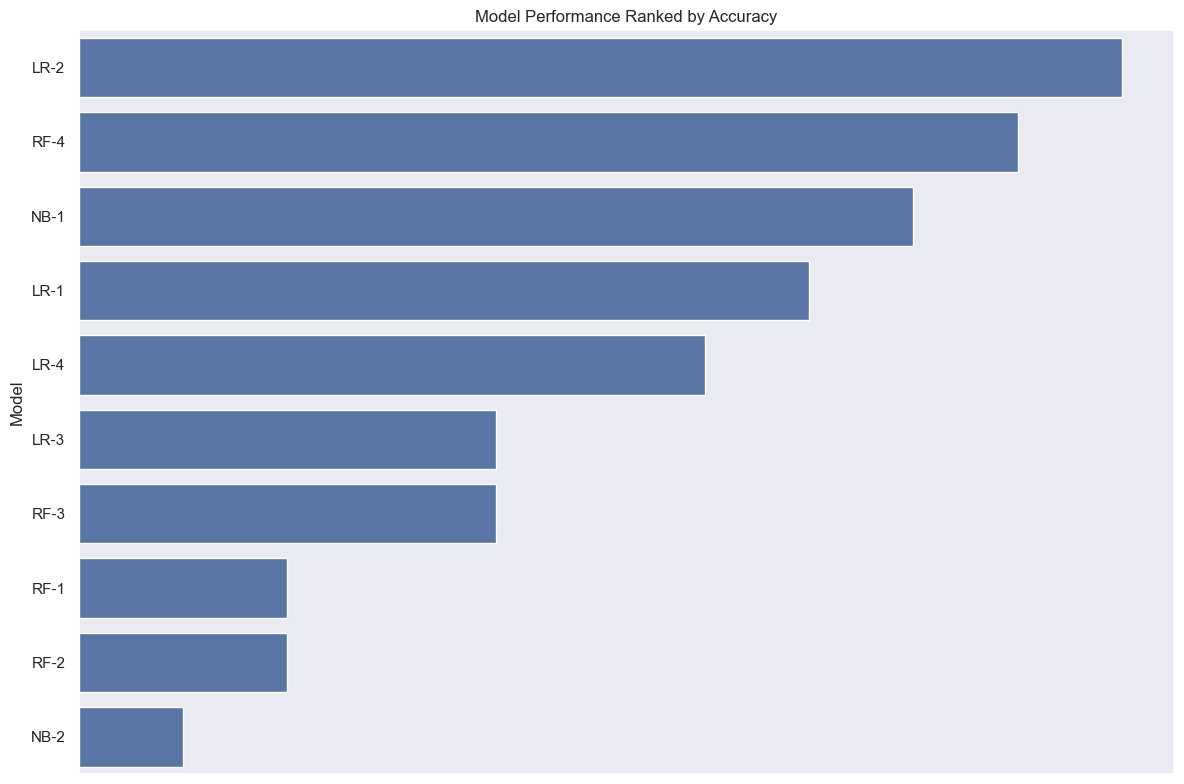

In [255]:
# Barplot

fig = plt.figure(1, figsize=(12,8))
sns.barplot(data=acc_rank_df, x='Acc for Plotting', y='Model')
plt.title("Model Performance Ranked by Accuracy")
plt.xlabel('')
plt.xticks([])
plt.tight_layout()
plt.show()

AUC

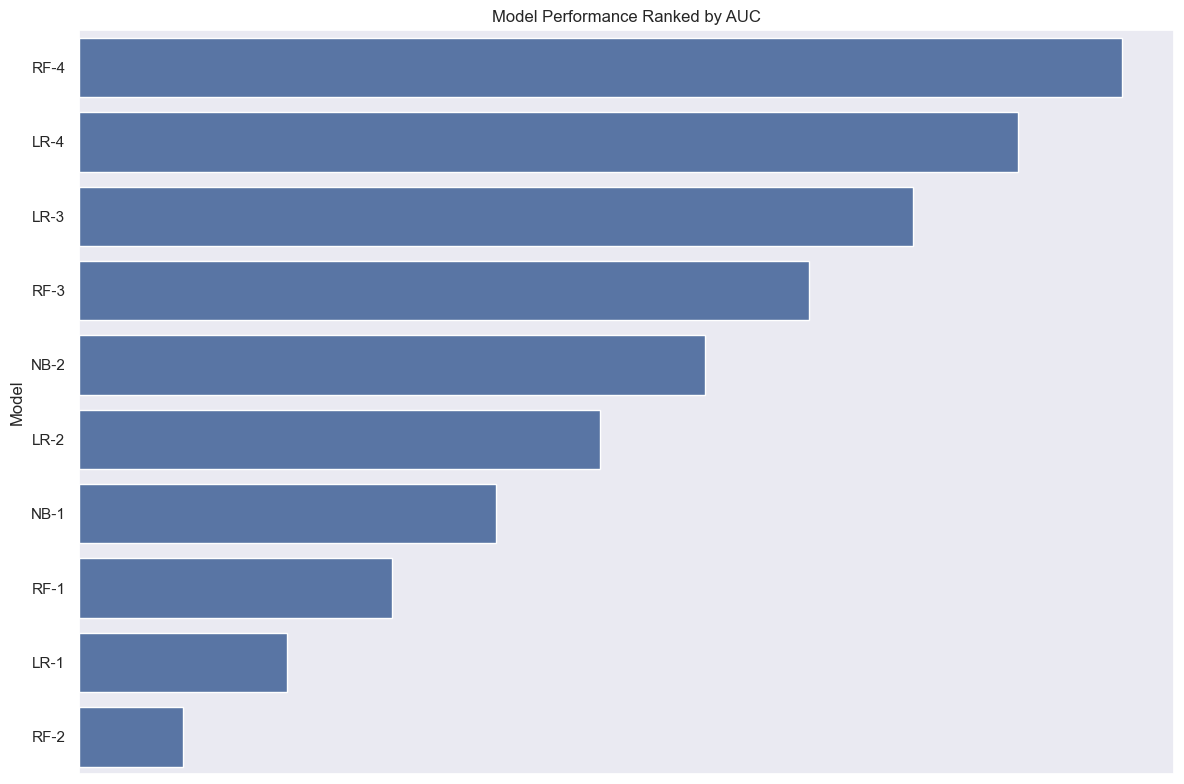

In [256]:
# Barplot

fig = plt.figure(1, figsize=(12,8))
sns.barplot(data=auc_rank_df, x='AUC for Plotting', y='Model')
plt.title("Model Performance Ranked by AUC")
plt.xlabel('')
plt.xticks([])
plt.tight_layout()
plt.show()

Average Rank

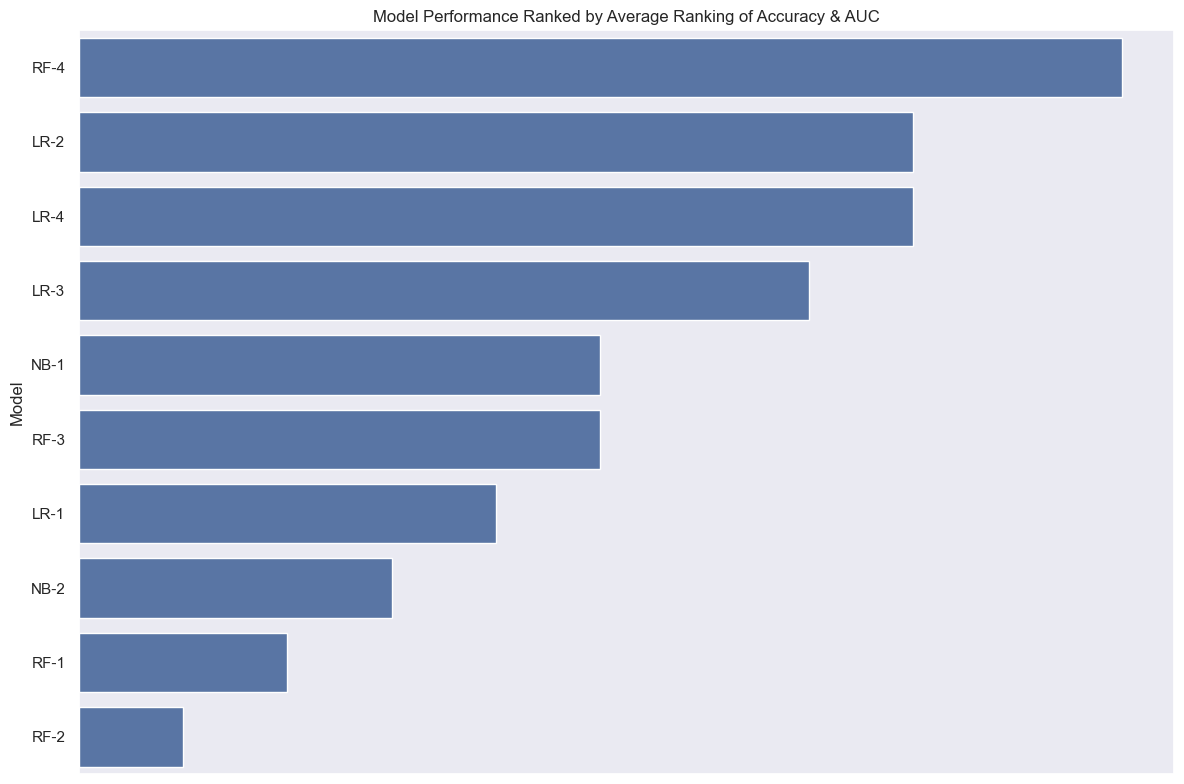

In [257]:
# Barplot

fig = plt.figure(1, figsize=(12,8))
sns.barplot(data=overall_rank_df, x='Avg for Plotting', y='Model')
plt.title("Model Performance Ranked by Average Ranking of Accuracy & AUC")
plt.xlabel('')
plt.xticks([])
plt.tight_layout()
plt.show()